# Projede Kullanılan Veri Seti Hakkında Bilgiler

* Age = Hastanın yaşı
* Race = Hastanın Irkı
* Marital Status = Hastanın medeni durumu
* Unnamed: 3 = Boş sütun
* T Stage = Tümörün büyüklüğünü ifade eden evre bilgisi
* N Stage = Lenf nodlarının durumunu belirten evre bilgisi
* 6th Stage = Kanserin genel evresi
* Grade = Tümörün agresifliğini gösteren derecelendirme.(Yüksek agresiflik, genellikle daha kötü prognoz anlamına gelir.)
* A Stage = Tedavi açısından belirli bir aşamayı ifade eden bilgi
* Tumor Size = Tümörün boyutu
* Estrogen Status = Östrojen durumu
* Progesterone Status = Progesteron durumu
* Regional Node Examined = İncelenen bölgesel lenf nodlarının sayısı
* Survival Months = Hastanın sağ kalma süresi(ay)
* Status = Hastanın sağkalım durumu(sağ / vefat)

# Veri Anlama & EDA - SEER Breast Cancer Data

### Kütüphaneleri ve Veri Kümelerini İçe Aktarma

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")   # Sürüm farklılığından dolayı verilen uyarı mesajlarını göstermemeye yarıyor.

In [2]:
df = pd.read_csv("SEER_Breast_Cancer_Dataset.csv")
df.head()

Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      19                     11   
1            Positive                      25                      9   
2            Positive                       4                      1   
3            Positive                      26                      1   
4            Positive                      21                      5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

In [3]:
df.tail()

Age                                              Race   \
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
4019  Married (including common law)         NaN       T1      N1       IIA   
4020  Married (including common law)         NaN       T1      N2      IIIA   
4021                        Divorced         NaN       T1      N1       IIA   
4022  Married (including common law)         NaN       T1      N1       IIA   
4023                        Divorced         NaN       T1      N1       IIA   

                                    Grade   A Stage  Tumor Size  \
4019         Well differentiated; Grade I  Regional          10   
4020     Poorly differentiated; Grade III  Regional           9   
4021  Moderately differentiated; Grade II  Regional           9   
4022  Moderately differentiated; Grade II  Regional           9   
4023  Moderately differentiated; Grade II  Regional           8   

     Estrogen Status Progesterone Status  Regional Node Examined  \
4019        Positive            Positive                      19   
4020        Negative            Negative                      13   
4021        Negative            Negative                       4   
4022        Positive            Positive                      14   
4023        Positive            Positive                       1   

      Reginol Node Positive  Survival Months Status  
4019                      1              107  Alive  
4020                      5              107  Alive  
4021                      2              107  Alive  
4022                      2              107  Alive  
4023                      1              107  Alive

* Veri kümesinde 4024 satır var. Sayısal ve kategorik niteliklerin karışımı var.
*
Statusm"sütunui, bir hastanın hayatta mı yoksa ölü mü olduğunu tahmin etmek için hedef değişken olarak kullanılabilir.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

* Race, Marital Status, T Stage, N Stage, 6th Stage, Grade, A Stage, Estrogen Status, Progesterone Status, ve Status kategorik sütunlardır.

* Age, Unnamed: 3, Tumor Size, Regional Node Examined, Reginol Node Positive, ve Survival Months sayısal sütunlardır.

* "Unnamed: 3" sütunu tamamen null değerlerden oluşmaktadır.

In [5]:
df.shape

(4024, 16)

* Veri seti 4024 satır ve 16 sütundan oluşmaktadır.

In [6]:
# Eksik değerleri saydırın
print(df.isnull().sum())

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64


* Veri üstünde işlemleri gerçekleştirmek için datamızı kopyalıyoruz.

In [7]:
data = df.copy()

In [8]:
data.head()

Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      19                     11   
1            Positive                      25                      9   
2            Positive                       4                      1   
3            Positive                      26                      1   
4            Positive                      21                      5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [10]:
print(data.isnull().sum())

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64


In [11]:
# Datamız içerisinde bulunan tamamen boş sütunu kaldırma
data = data.drop(columns=["Unnamed: 3"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [13]:
print(data.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [14]:
data.describe().T

count       mean        std   min   25%   50%   75%  \
Age                     4024.0  53.972167   8.963134  30.0  47.0  54.0  61.0   
Tumor Size              4024.0  30.473658  21.119696   1.0  16.0  25.0  38.0   
Regional Node Examined  4024.0  14.357107   8.099675   1.0   9.0  14.0  19.0   
Reginol Node Positive   4024.0   4.158052   5.109331   1.0   1.0   2.0   5.0   
Survival Months         4024.0  71.297962  22.921430   1.0  56.0  73.0  90.0   

                          max  
Age                      69.0  
Tumor Size              140.0  
Regional Node Examined   61.0  
Reginol Node Positive    46.0  
Survival Months         107.0

- "Age" ve "Survival Months" sütunları için ortalama(mean) medyandan(50%) daha azdır. Veriler sola doğru eğimlidir. Dağılım negatif eğimlidir.
- "Tumor Size", "Regional Node Examined", ve "Reginol Node Positive" sütunları için ortalama(mean) medyandan(50%) daha büyüktür. Veriler sağa doğru eğimlidir. Dağılım pozitif eğimlidir.

In [15]:
# Sütunları kategorik ve sayısal olarak kategorilere ayırma

numerical_columns = []
categorical_columns = []
for i in data.columns:
    if data[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [16]:
print("Kategorik Sütunlar:", categorical_columns)

Kategorik Sütunlar: ['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [17]:
print("Sayısal Sütunlar:", numerical_columns)

Sayısal Sütunlar: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [18]:
data.Status.unique()

array(['Alive', 'Dead'], dtype=object)

* Hedef değişken ayrıktır ve bir sınıflandırma problemidir.

In [19]:
 # Kategorik bir değişken olması nedeniyle frekans tablosuna, yüzde dağılımına ve çubuk grafiğine bakacağız.
data.Status.value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

- Yaşayan hasta sayısı, ölen hasta sayısından fazladır (dengesiz veri kümesi).
- 3408 hasta hayatta iken, 616 hasta ölmüştür.

In [20]:
# "normalize = True" Sayılar yerine, her bir kategorinin toplam veri içindeki yüzdesini hesaplar
data.Status.value_counts(normalize=True)

Status
Alive    0.846918
Dead     0.153082
Name: proportion, dtype: float64

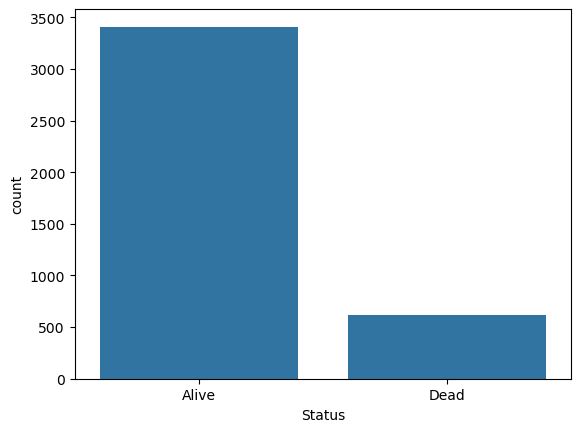

In [21]:
sns.countplot(x=data["Status"])
plt.show()

## Kategorik Sütun Analizi

Kategorik Sütun: Race 


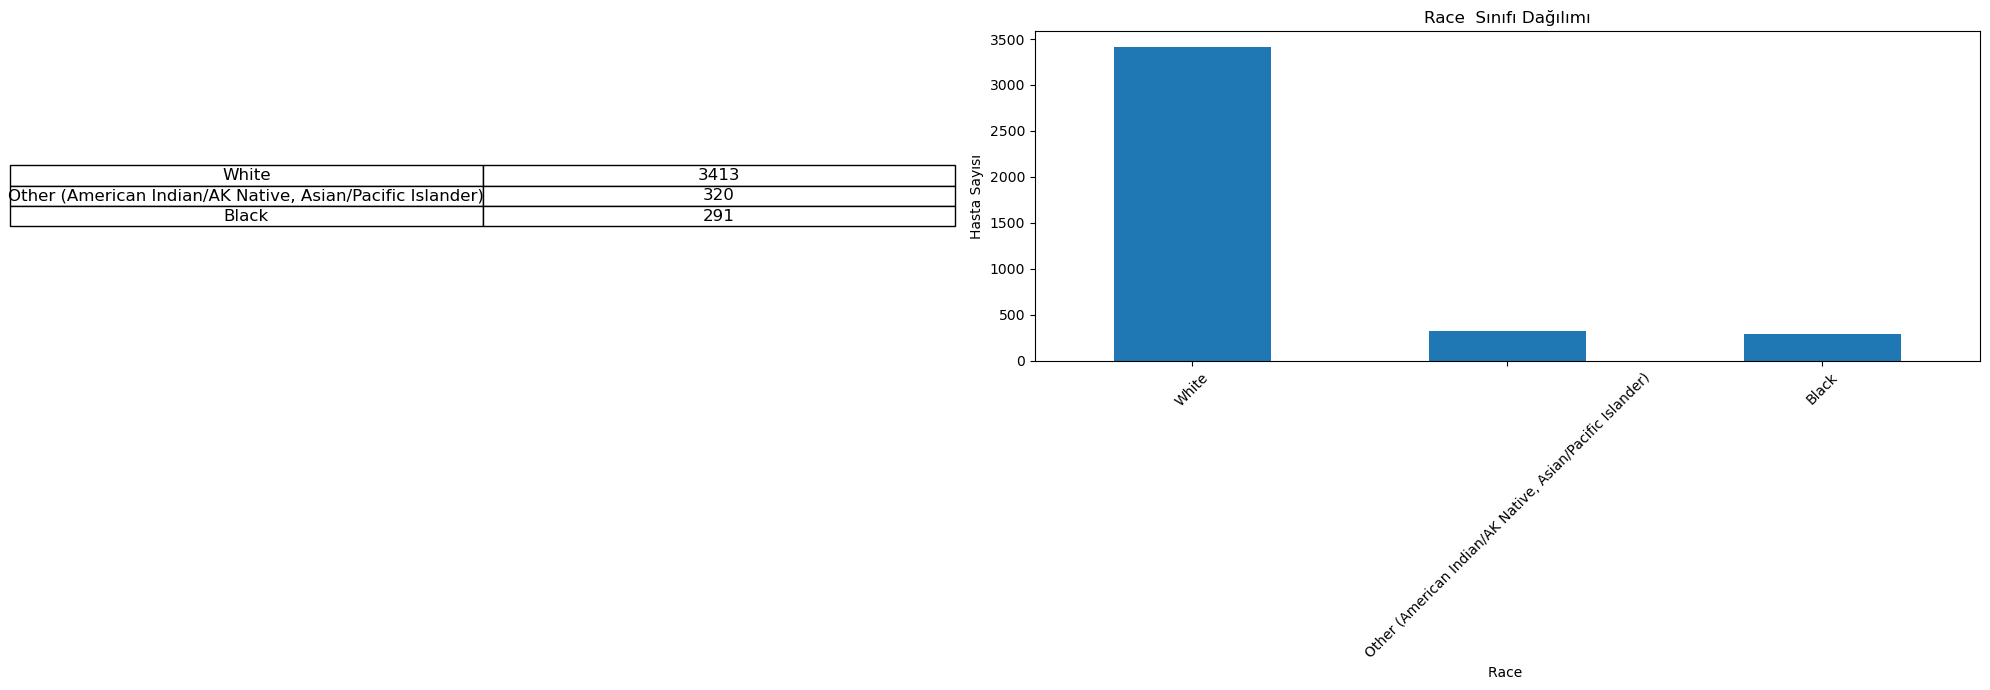

Kategorik Sütun: Marital Status


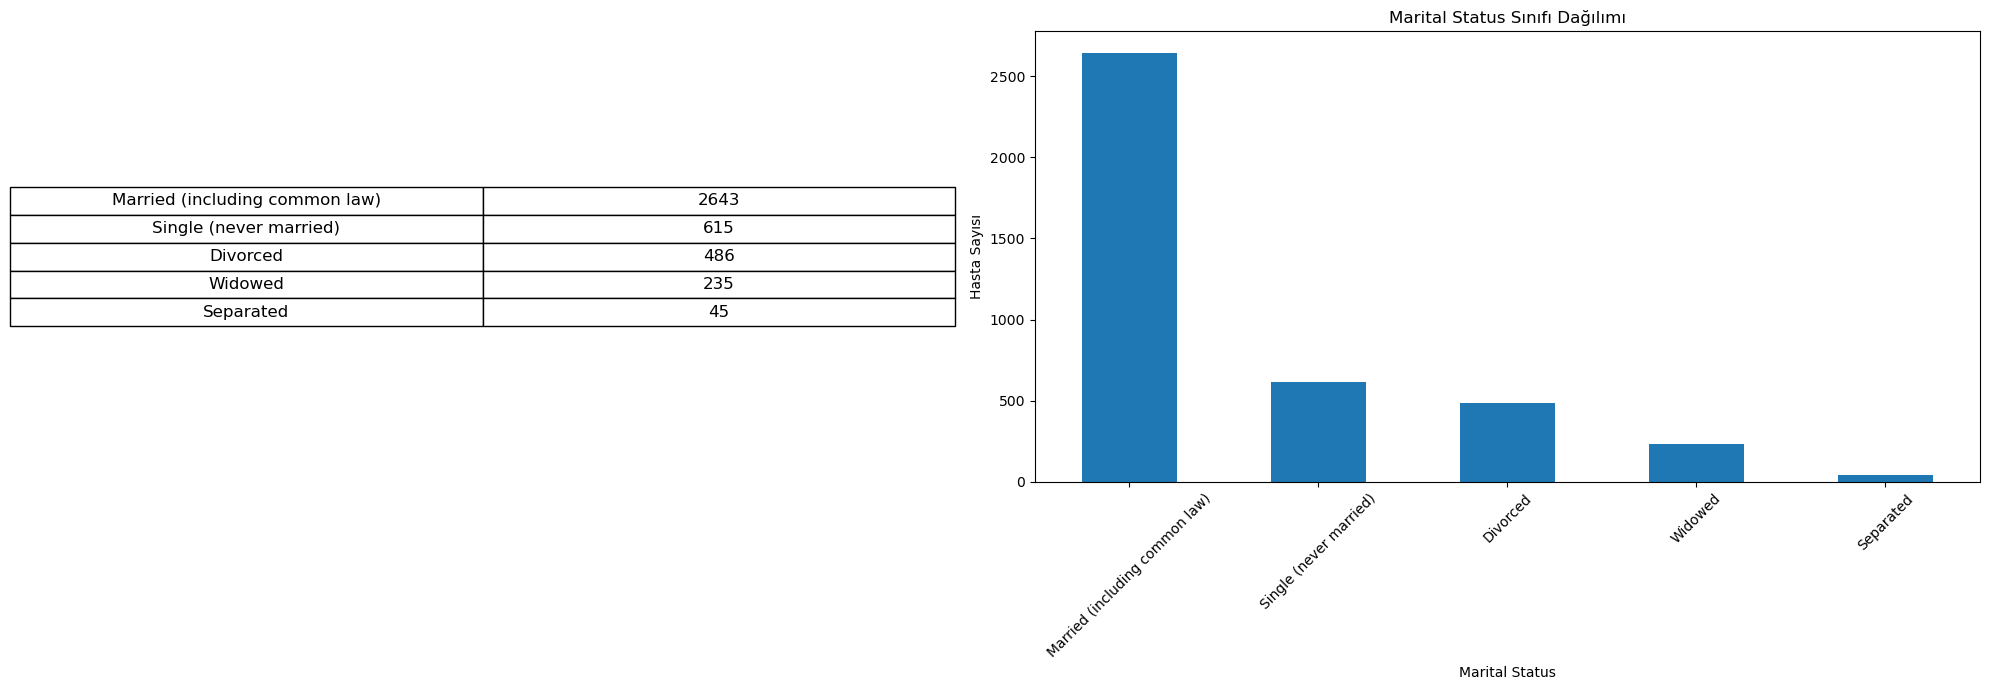

Kategorik Sütun: T Stage 


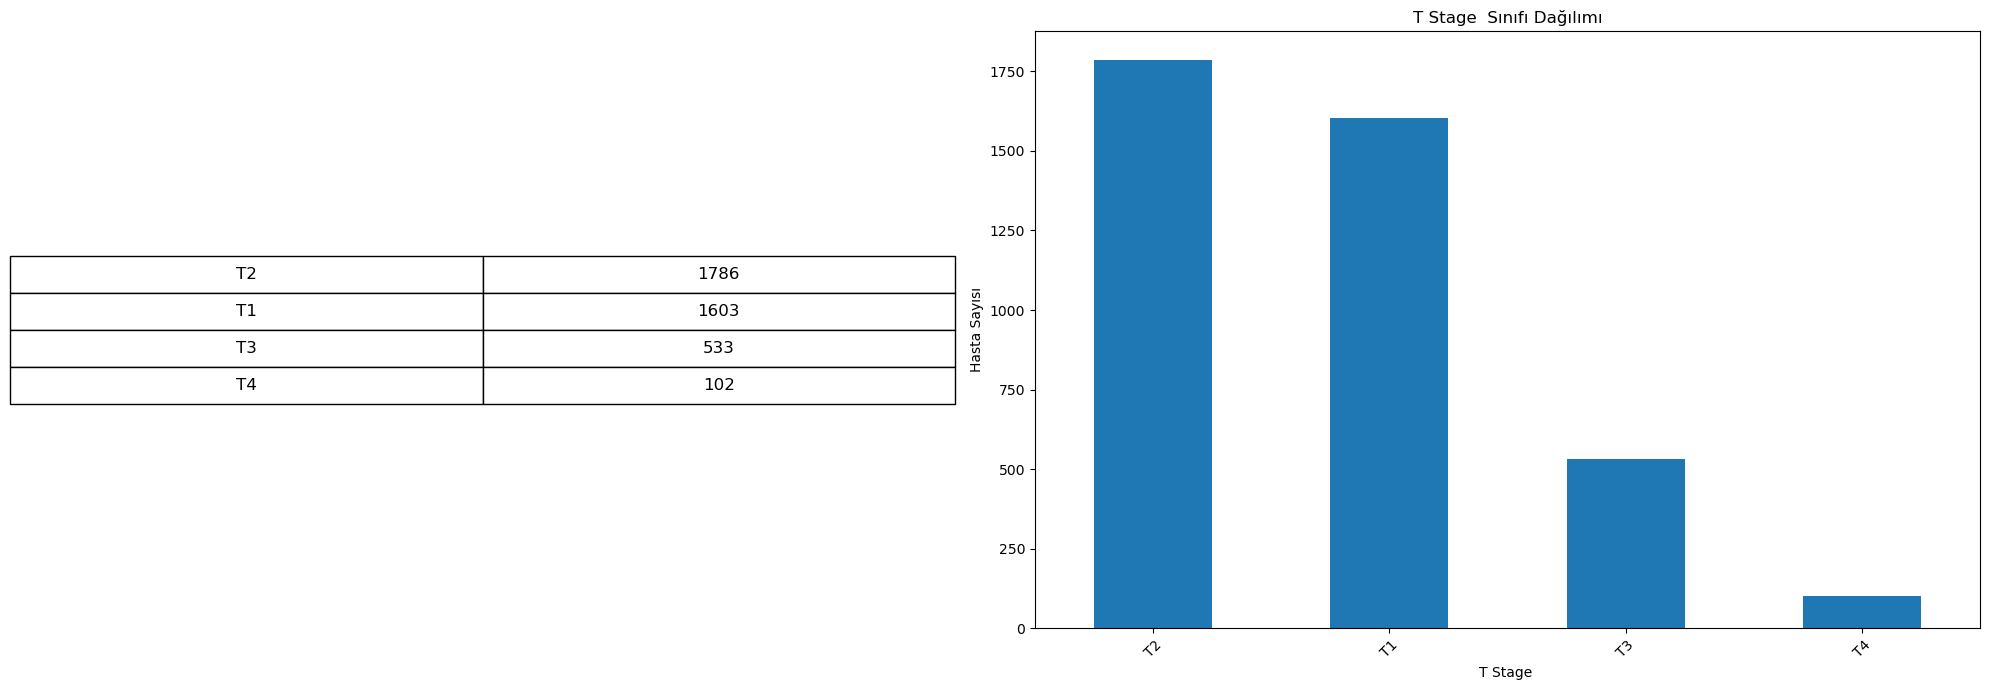

Kategorik Sütun: N Stage


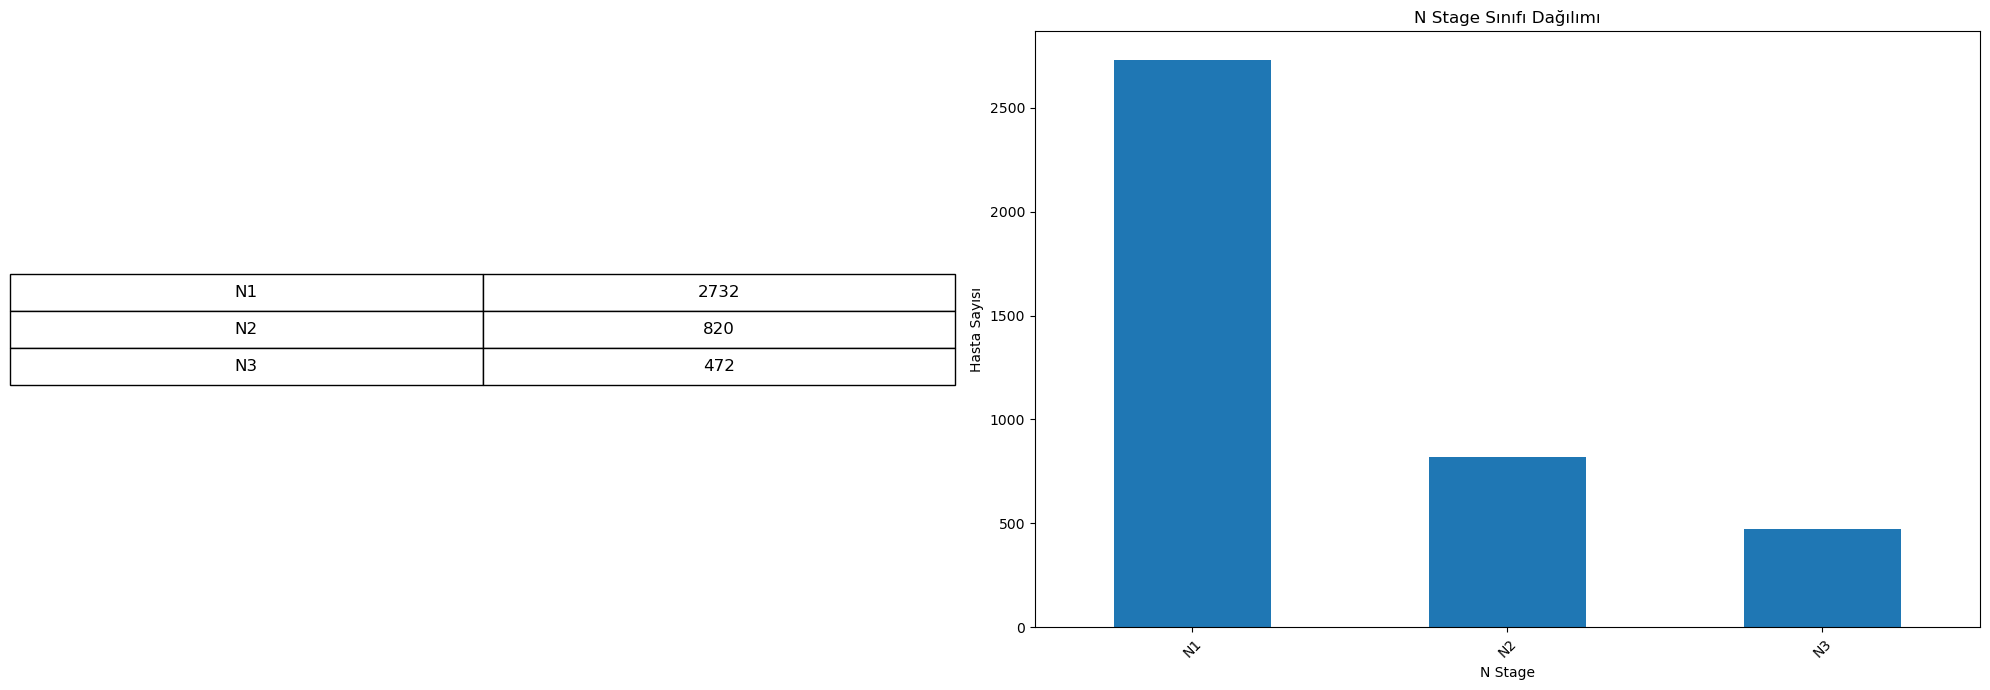

Kategorik Sütun: 6th Stage


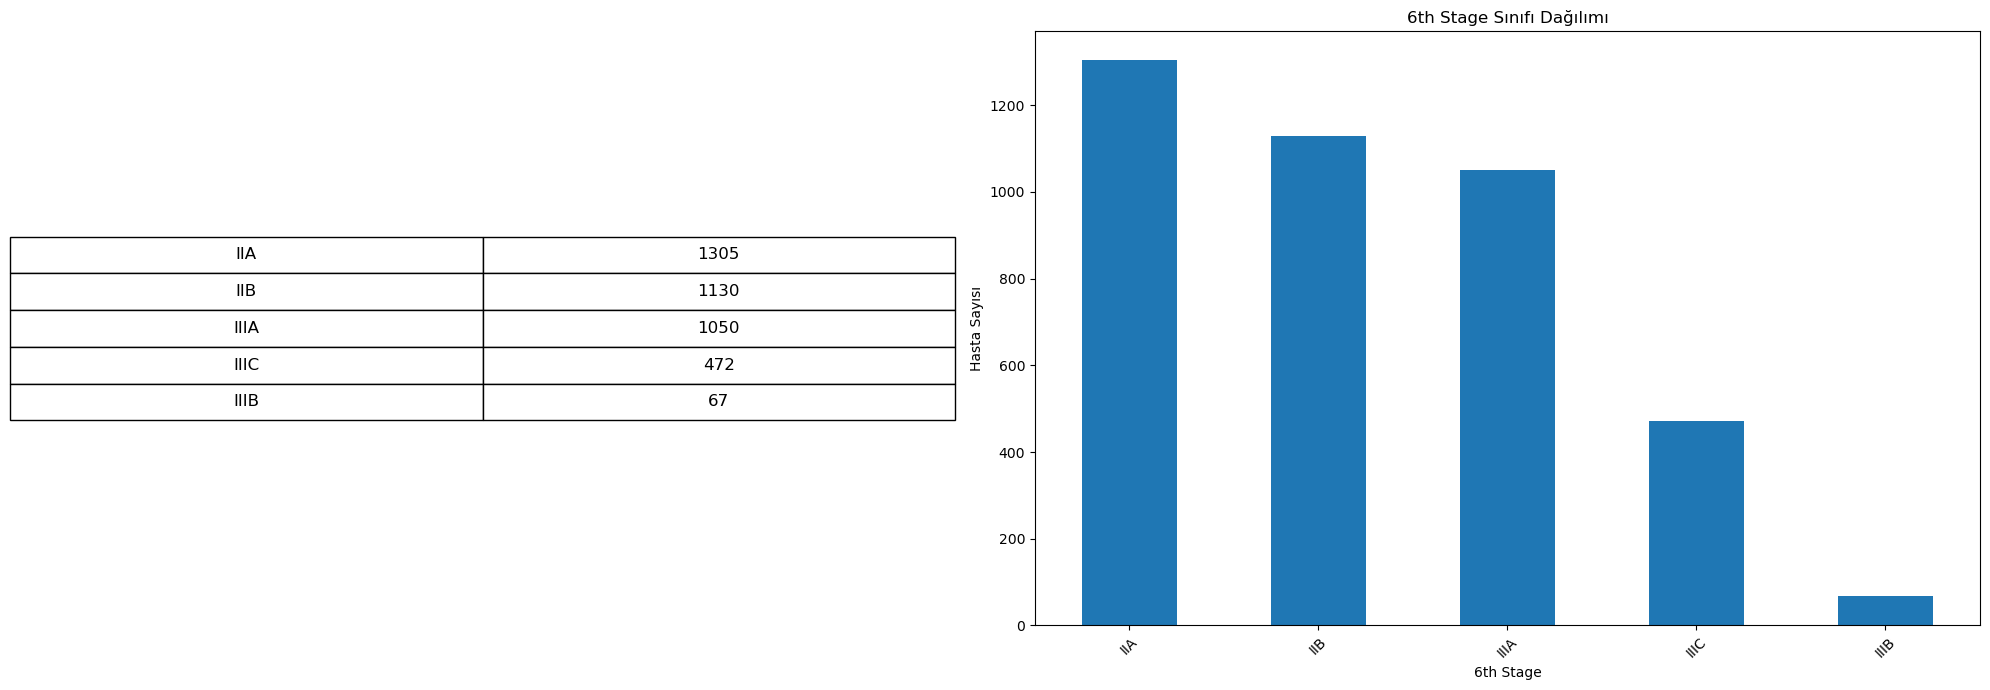

Kategorik Sütun: Grade


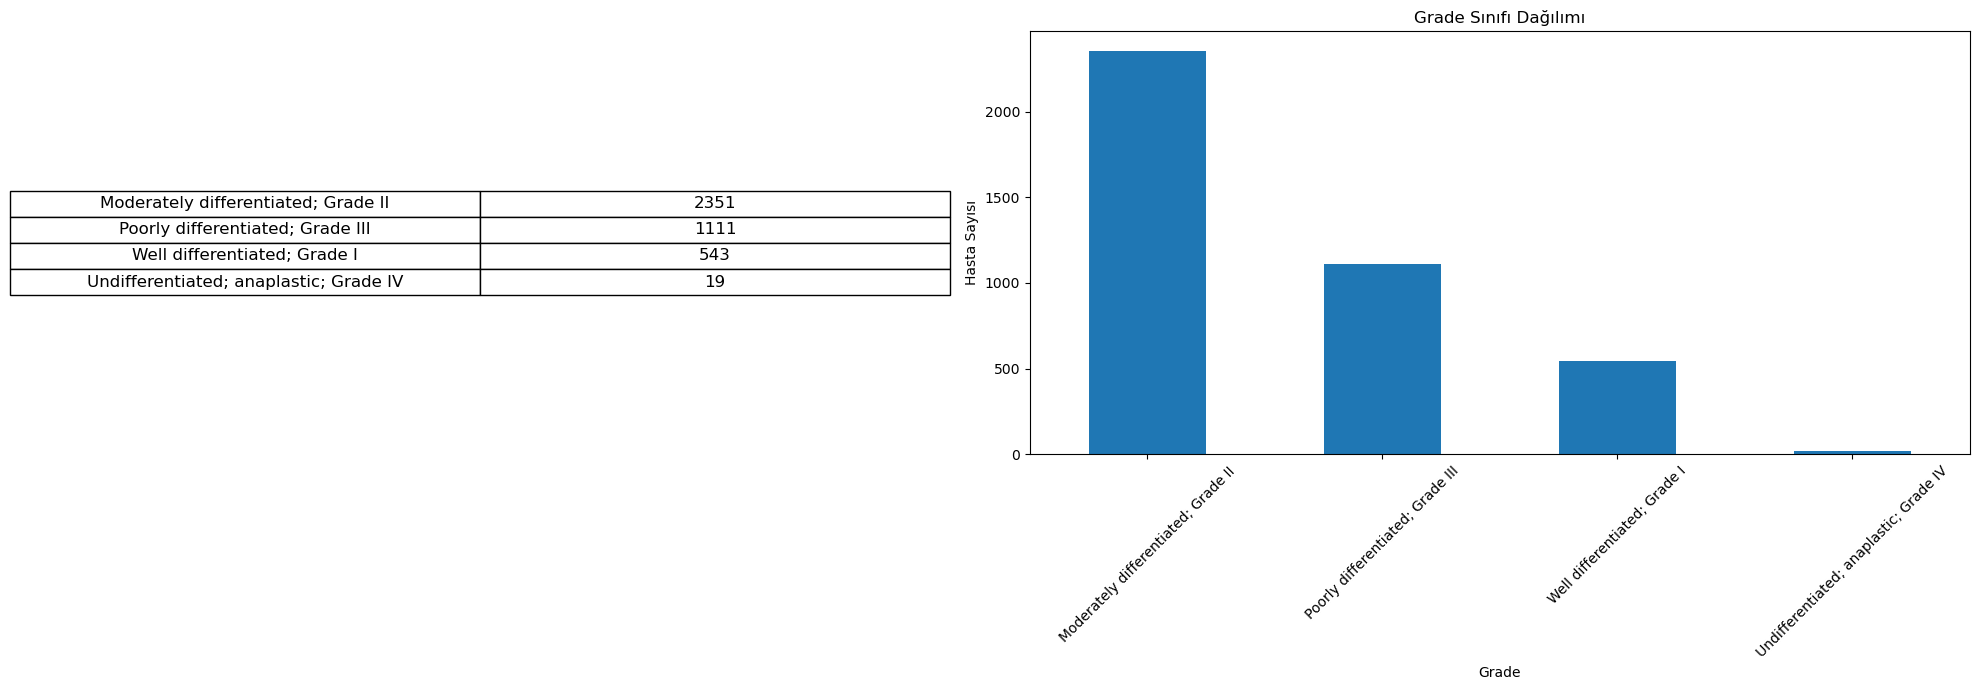

Kategorik Sütun: A Stage


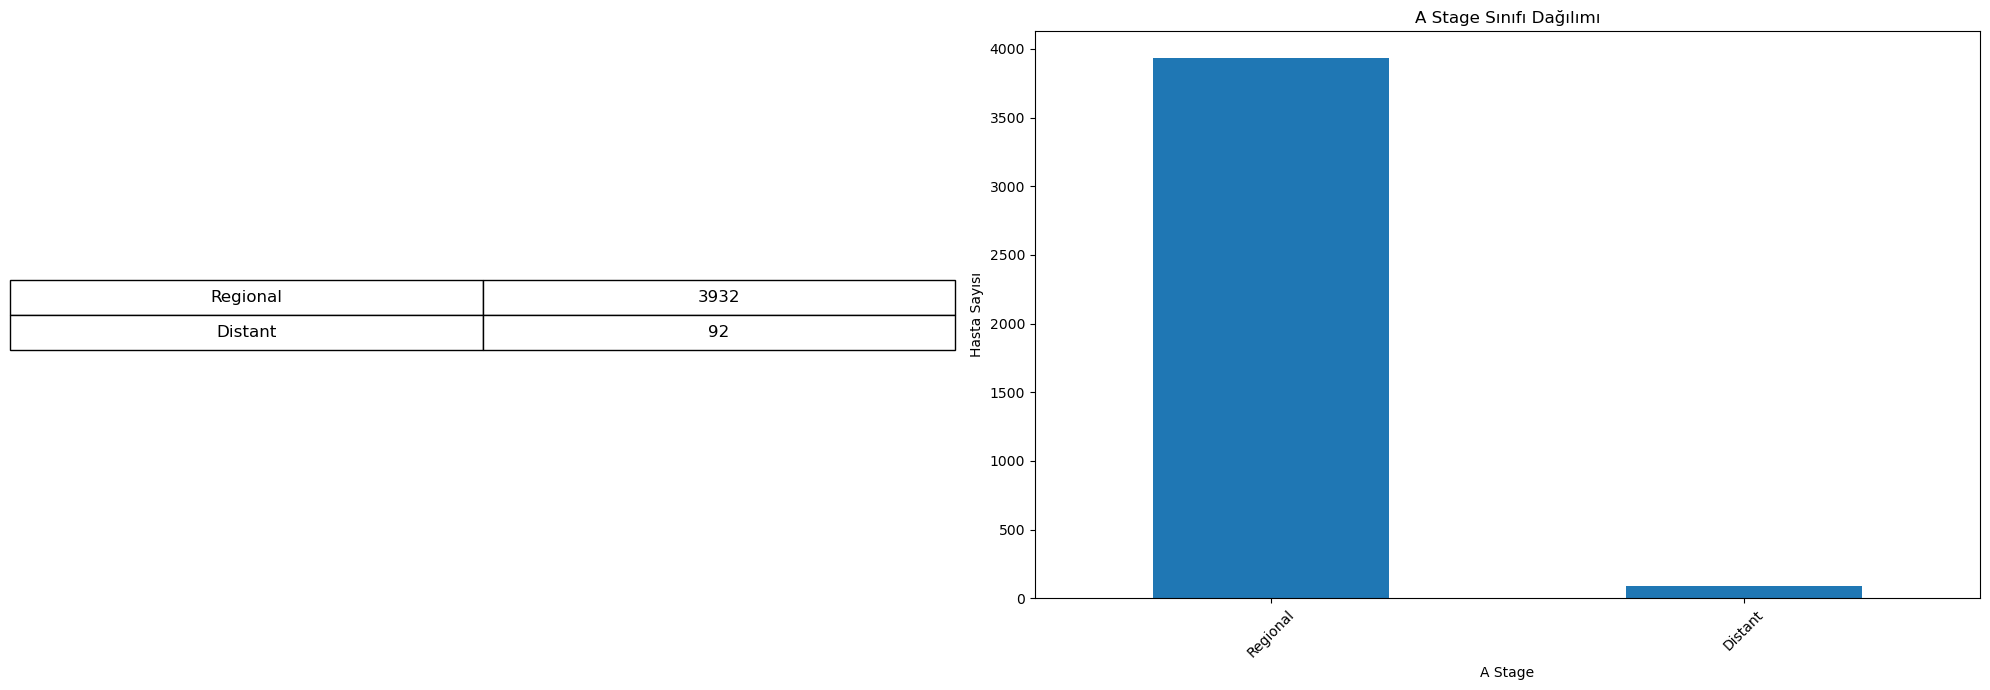

Kategorik Sütun: Estrogen Status


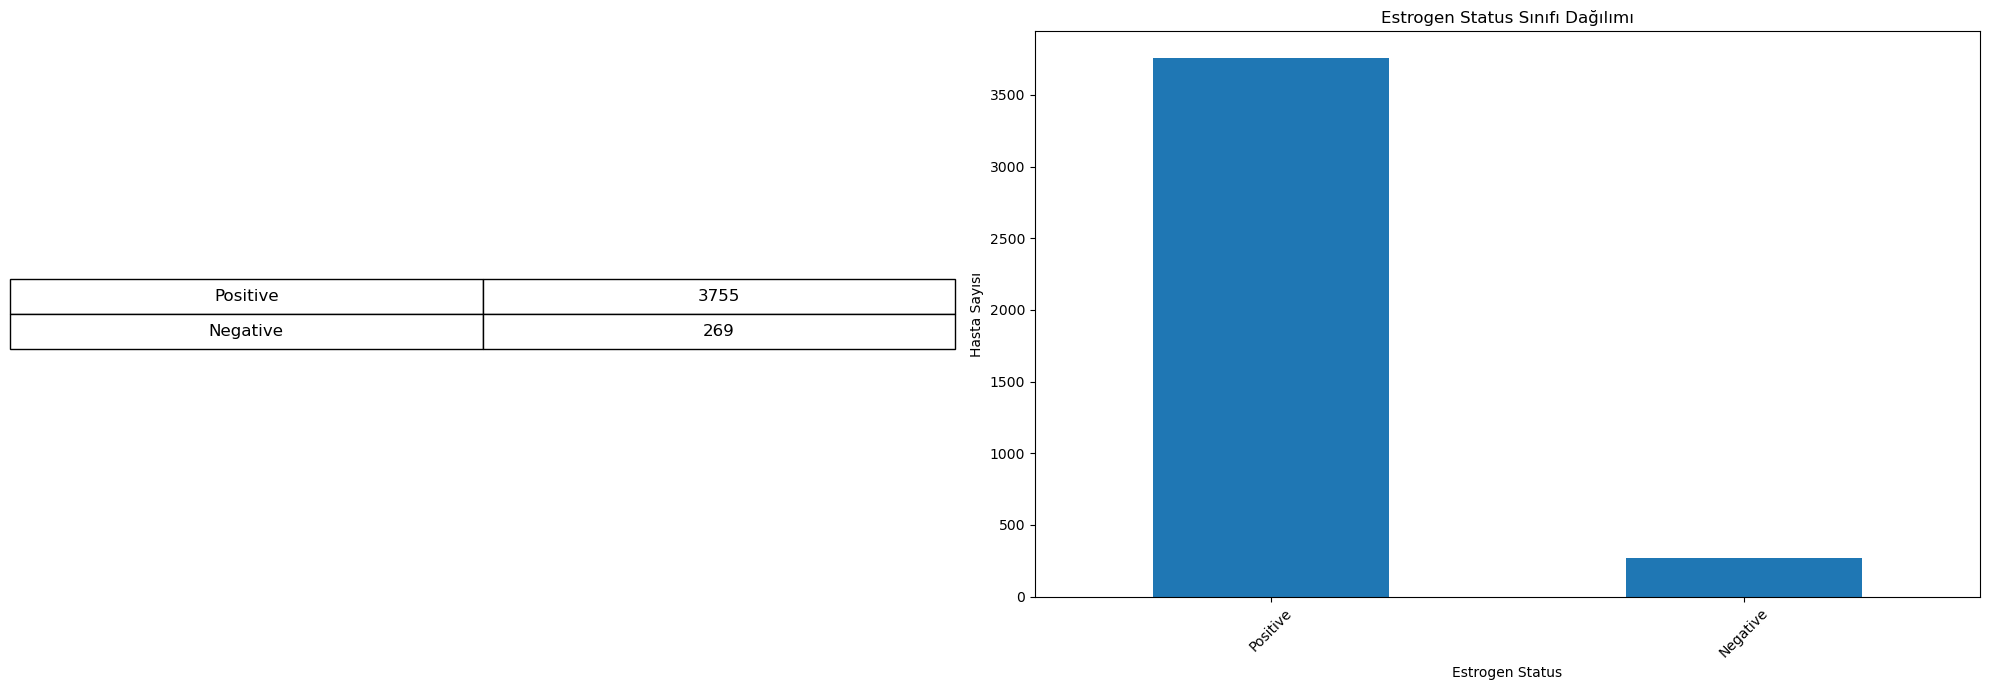

Kategorik Sütun: Progesterone Status


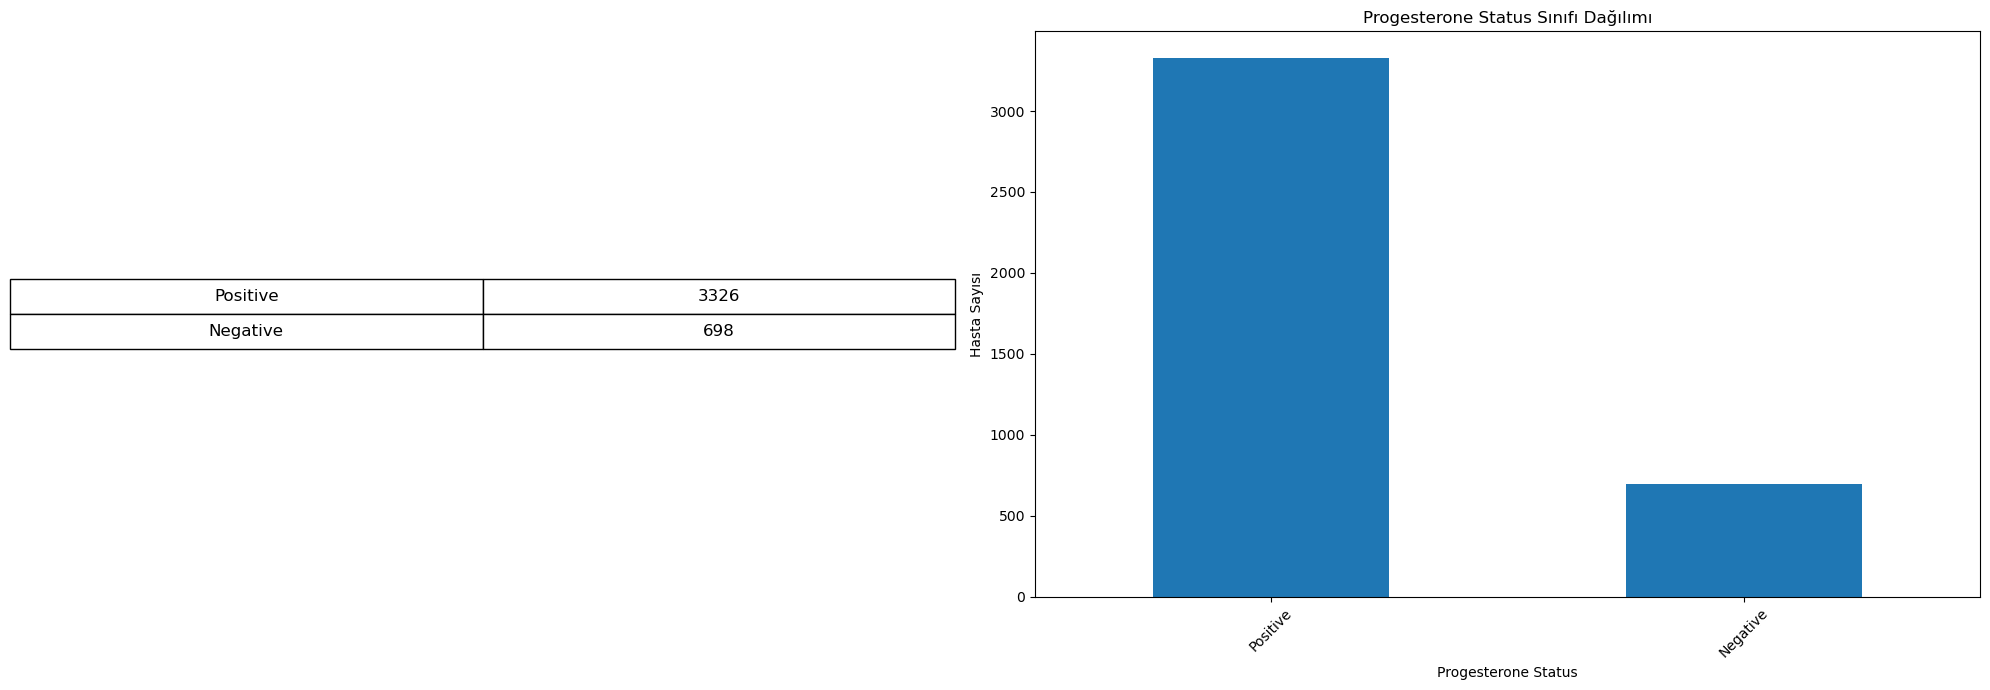

Kategorik Sütun: Status


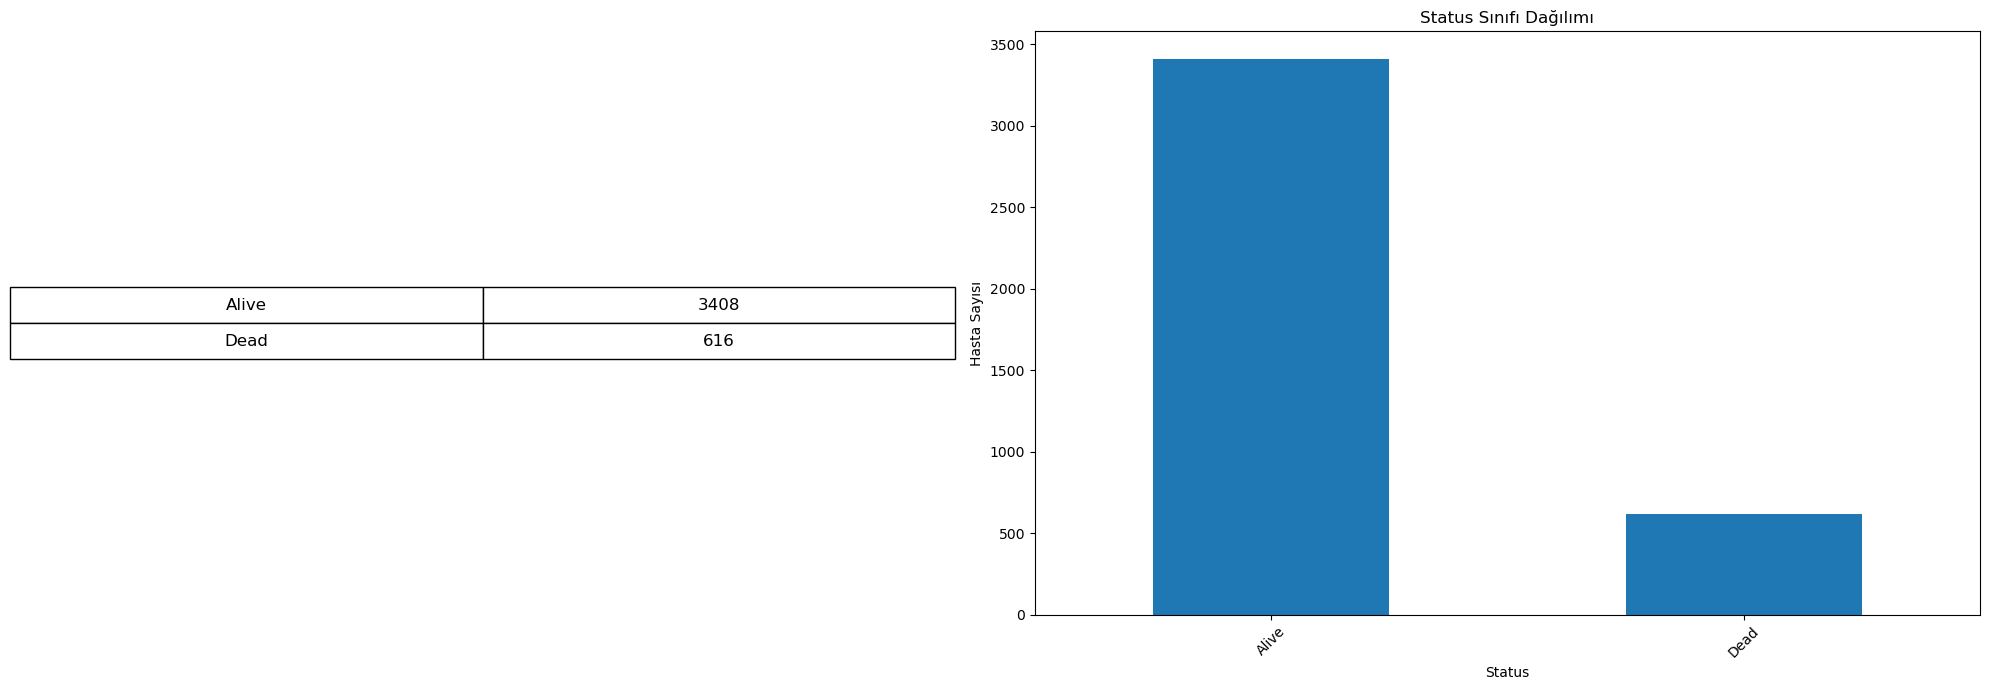

In [22]:
# Kategorik sütun analizi
for col in categorical_columns:
    # Kategorik sütun bilgilerini yazdır
    print(f"Kategorik Sütun: {col}")
    counts = data[col].value_counts()
    fig = plt.figure(figsize=(20, 7))

    ax1 = fig.add_subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
    ax1.axis('off')
    table = plt.table(
        cellText=counts.reset_index().values,
        loc='center',
        cellLoc='center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)

    # İkinci sütun: Bar grafiği
    ax2 = fig.add_subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
    counts.plot(kind='bar', ax=ax2)
    ax2.set_title(f"{col} Sınıfı Dağılımı")
    ax2.set_ylabel("Hasta Sayısı")  # Y ekseni etiketi
    ax2.set_xlabel(col)  # X ekseni etiketi
    plt.xticks(rotation=45)  # Etiketleri döndürerek okunaklı yap

    plt.tight_layout()
    plt.show()

## Yorumlar

1) Race: Hastaların çoğunluğu beyaz ırktandır.

2) Marital Status: Medeni Durum için 4024 gözlem bulunmaktadır.
* Medeni Durum sütununda 5 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Evli"dir ve bu kategoriye ait 2643 hasta bulunmaktadır.

3) T Stage: T Stage için 4024 gözlem bulunmaktadır.
* T Stage sütununda 4 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "T2"dir ve bu kategoriye ait 1786 hasta bulunmaktadır.

4) N Stage: N Stage için 4024 gözlem bulunmaktadır.
* N Stage sütununda 3 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "N1"dir ve bu kategoriye ait 2732 hasta bulunmaktadır.

5) 6th Stage: 6th Stage için 4024 gözlem bulunmaktadır.
* 6th Stage sütununda 5 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "IIA"dır ve bu kategoriye ait 1305 hasta bulunmaktadır.

6) Grade: Grade için 4024 gözlem bulunmaktadır.
* Grade sütununda 4 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Moderately differentiated; Grade II"dir ve bu kategoriye ait 2351 hasta bulunmaktadır.

7) A Stage: A Stage 4024 gözlem bulunmaktadır.
* A Stage sütununda 2 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Regional"dir ve bu kategoriye ait 3932 hasta bulunmaktadır.

8) Estrogen Status: Estrogen Status 4024 gözlem bulunmaktadır.
* Estrogen Status sütununda 2 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Positive"dir ve bu kategoriye ait 3755 hasta bulunmaktadır.

9) Progesterone Status: Progesterone Status 4024 gözlem bulunmaktadır.
* Progesterone Status sütununda 2 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Positive"dir ve bu kategoriye ait 3326 hasta bulunmaktadır.

10) Status: Status 4024 gözlem bulunmaktadır.
* Status sütununda 2 farklı benzersiz değer vardır.
* En sık görülen değer (mod) "Alive"dir ve bu kategoriye ait 3408 hasta bulunmaktadır.

## Sayısal Sütun Analizi

Sayısal Sütun: Age


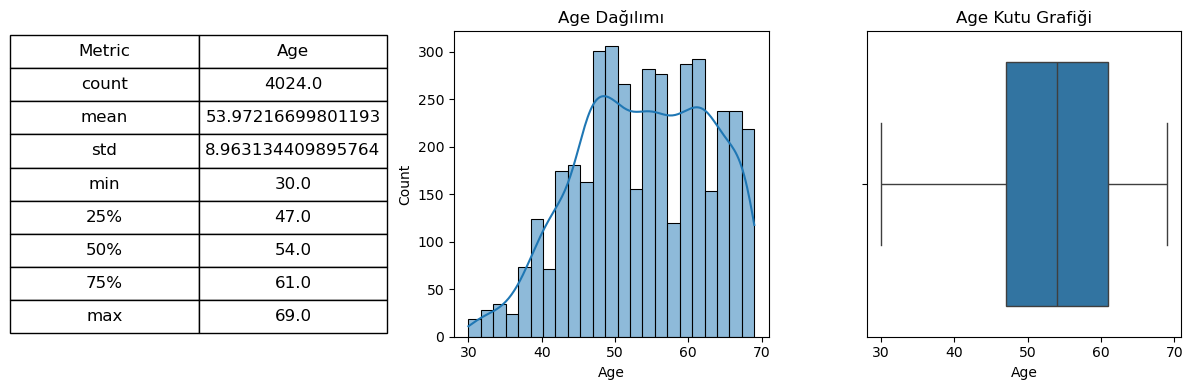

Sayısal Sütun: Tumor Size


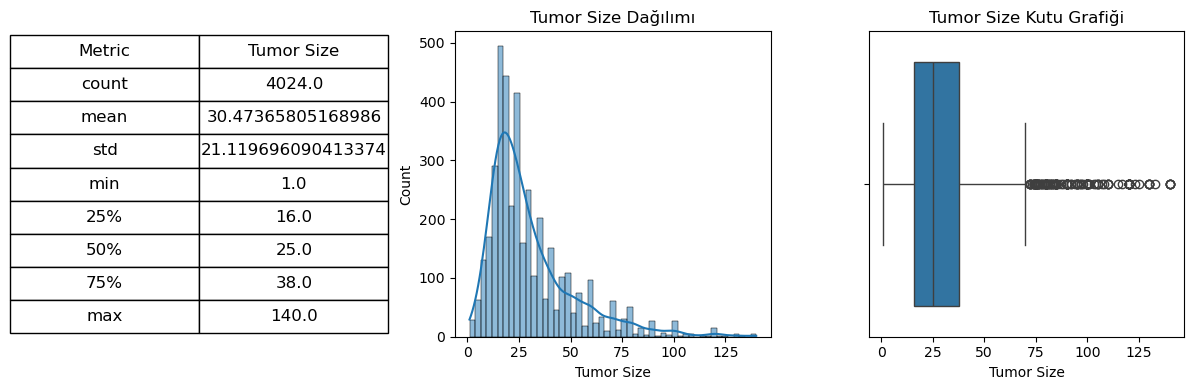

Sayısal Sütun: Regional Node Examined


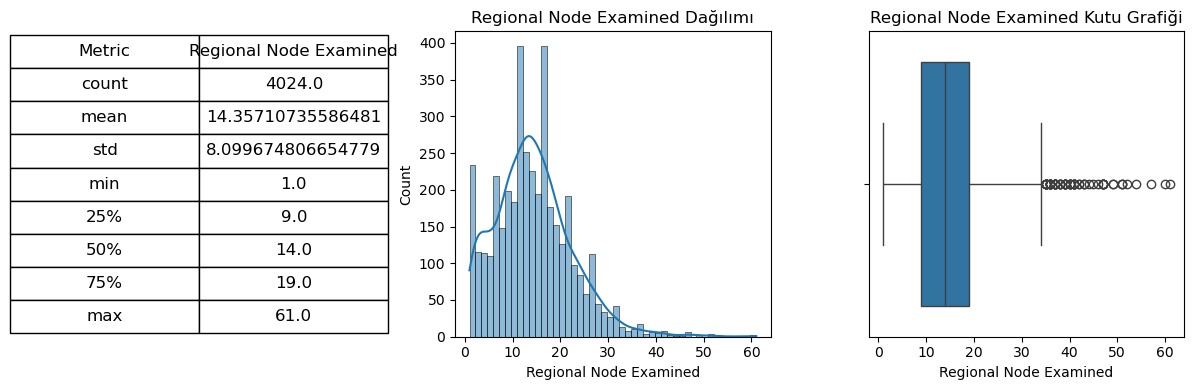

Sayısal Sütun: Reginol Node Positive


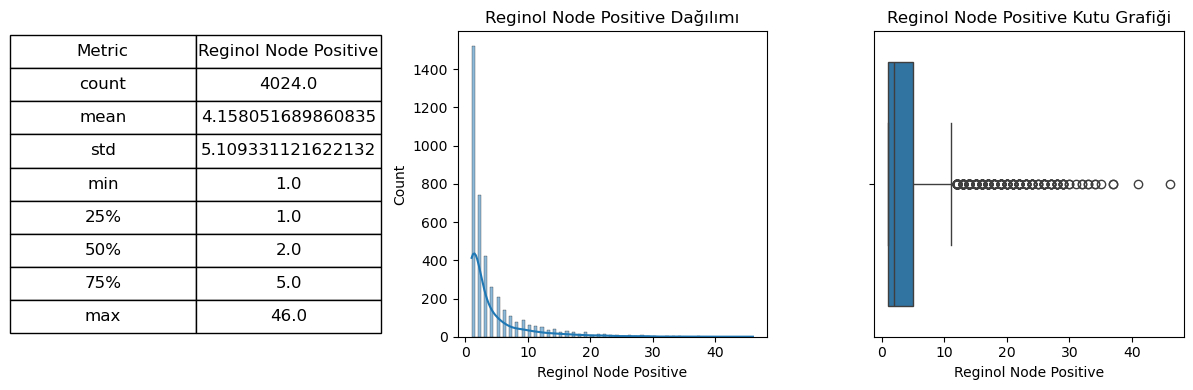

Sayısal Sütun: Survival Months


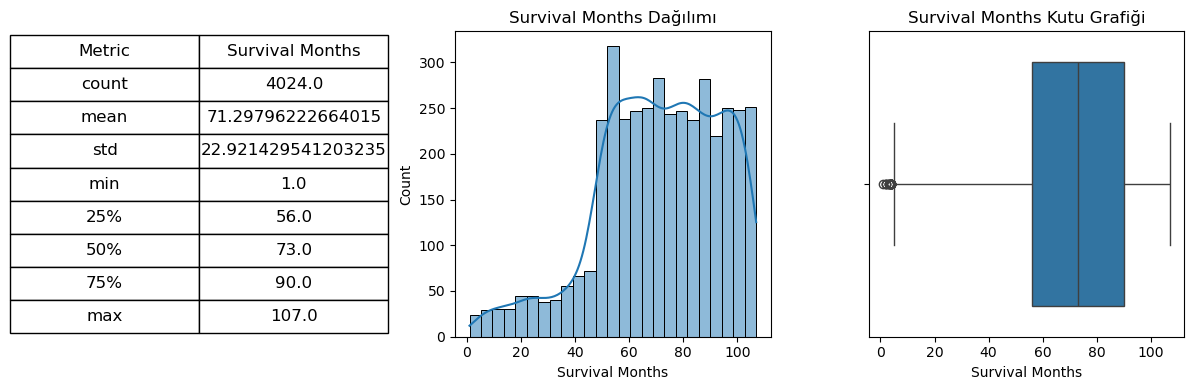

In [23]:
# Sayısal sütun analizi
for col in numerical_columns:
    print(f"Sayısal Sütun: {col}")
    stats = data[col].describe()
    fig = plt.figure(figsize=(12, 4))

    # İlk sütun: İstatistiksel özet tablosu
    ax1 = fig.add_subplot(1, 3, 1)  # 1 satır, 3 sütun, 1. grafik
    ax1.axis('off')  # Grafik eksenlerini kapat
    table = plt.table(
        cellText=stats.reset_index().values,
        colLabels=["Metric", col],
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Yazı boyutu büyütüldü
    table.scale(1.2, 2)  # Tablo genişlik ve yükseklik ölçeklendirme

    # Histogram
    ax2 = fig.add_subplot(1, 3, 2)
    sns.histplot(data[col], kde=True, ax=ax2)
    ax2.set_title(f"{col} Dağılımı")

    # Boxplot
    ax3 = fig.add_subplot(1, 3, 3)
    sns.boxplot(x=data[col], ax=ax3)
    ax3.set_title(f"{col} Kutu Grafiği")

    plt.tight_layout()
    plt.show()

## Yorumlar

1) Age:
* En genç hasta 30 yaşında, en yaşlı hasta ise 69 yaşındadır.
* Hastaların %25’i 47 yaşın altındadır ve %75’i 47 yaşın üzerindedir (%25'lik dilim). Hastaların %50’si 54 yaşın altındadır ve %50’si 54 yaşın üzerindedir (medyan). Hastaların %75’i 61 yaşın altındadır ve %25’i 61 yaşın üzerindedir (%75'lik dilim).
* "Age" sütununun hiçbir aykırı değeri yok.
* Dağılım negatif çarpıktır (sola çarpık).

2) Tumor Size:
* En küçük tümör 1 cm, en büyük tümör ise 140 cm’dir.
* Tümörlerin %25’i 16 cm’nin altındadır ve %75’i 16 cm’nin üzerindedir (%25'lik dilim). Tümörlerin %50’si 25 cm’nin altındadır ve %50’si 25 cm’nin üzerindedir (medyan). Tümörlerin %75’i 38 cm’nin altındadır ve %25’i 38 cm’nin üzerindedir (%75'lik dilim).
* "Tumor Size" sütunu çok fazla aykırı değere sahip
* Görüldüğü gibi dağılım sağa çarpıktır.

3) Regional Node Examined:
* En az incelenen lenf düğümü sayısı 1, en fazla incelenen lenf düğümü sayısı ise 61’dir.
* Çeyrekler (Quartiles): Lenf düğümlerinin %25’i 9’un altındadır ve %75’i 9’un üzerindedir (%25’lik dilim).
* Lenf düğümlerinin %50’si 14’ün altındadır ve %50’si 14’ün üzerindedir (medyan).
* Lenf düğümlerinin %75’i 19’un altındadır ve %25’i 19’un üzerindedir (%75’lik dilim).
* "Regional Node Examined" sütununda birkaç uç değer (outlier) mevcut, ancak aykırı değerler "Tumor Size" sütununa kıyasla daha az dikkat çekici bir düzeydedir.
* Dağılımın histogramına bakıldığında, "Regional Node Examined" sütununun da sağa çarpık bir dağılıma sahip olduğu görülmektedir. Bu, daha az sayıda kişinin çok yüksek lenf düğümü incelemesine sahip olduğunu gösterir.

4) Regional Node Positive:
* Temel Değerler: En az pozitif lenf düğümü sayısı: 1.
* En fazla pozitif lenf düğümü sayısı: 46.
* Ortalama pozitif lenf düğümü sayısı: 4.16.
* Standart sapma: 5.11.
* Çeyrekler: %25’lik dilimde pozitif lenf düğümü sayısı 1 veya daha az.
* Medyan (%50): Pozitif lenf düğümü sayısı 2.
* %75’lik dilimde pozitif lenf düğümü sayısı 5 veya daha az.
* Dağılım ve Aykırı Değerler: Dağılımın sağa çarpık olduğu açıkça görülmektedir. Bu, az sayıda bireyin çok yüksek sayıda pozitif lenf düğümüne sahip olduğunu gösterir.
* Kutup grafiği, pozitif lenf düğümü değerlerinin büyük bir kısmının düşük aralıklarda toplandığını ancak birkaç uç değer (outlier) olduğunu gösteriyor.
* Özet: Lenf düğümlerinin büyük bir çoğunluğu düşük pozitiflik değerlerinde toplanmış durumda, ancak birkaç hasta için çok yüksek pozitif değerler gözlemlenmiştir. Bu durum, klinik olarak özel inceleme gerektiren bireyler olduğunu gösterebilir.

5) Survival Months:
* Temel Değerler: En kısa sağkalım süresi: 1 ay.
* En uzun sağkalım süresi: 107 ay.
* Ortalama sağkalım süresi: 71.30 ay.
* Standart sapma: 22.92.
* Çeyrekler: %25’lik dilimde sağkalım süresi 56 ay veya daha az.
* Medyan (%50): Sağkalım süresi 73 ay.
* %75’lik dilimde sağkalım süresi 90 ay veya daha az.
* Dağılım ve Aykırı Değerler: Dağılım, oldukça simetrik görünmektedir, ancak sağ tarafa hafif bir çarpıklık olabilir.
* Kutup grafiği, az sayıda düşük uç değer (örneğin 1-10 ay arası sağkalım süresi) olduğunu gösteriyor.
* Özet: Sağkalım süreleri genellikle ortalama (71 ay) civarında yoğunlaşmış ve büyük bir kısmı medyan (73 ay) etrafında toplanmış durumda. Ancak birkaç hasta, çok kısa sağkalım süreleriyle dikkat çekiyor.

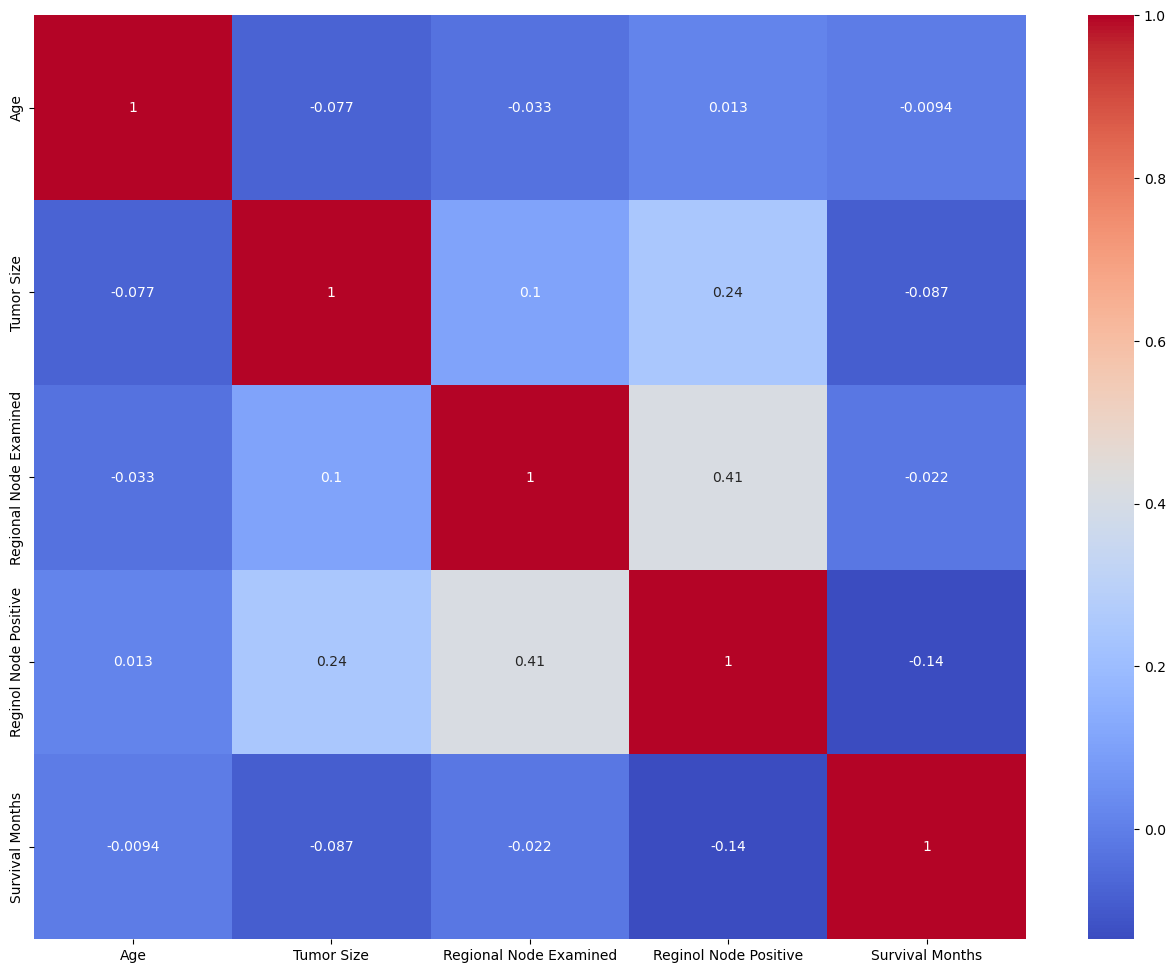

In [24]:
# Sadece sayısal sütunları seç
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi oluştur ve görselleştir
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

* Isı haritası, "regional node positive (pozitif bölgesel düğümler)" ile "regional node examined (incelenen bölgesel düğümler)" arasında (0.41) ve "tumor size (tümör boyutu)" ile "regional node positive" arasında (0.24)'lük bir pozitif korelasyon olduğunu göstermektedir.

In [25]:
import plotly.express as px

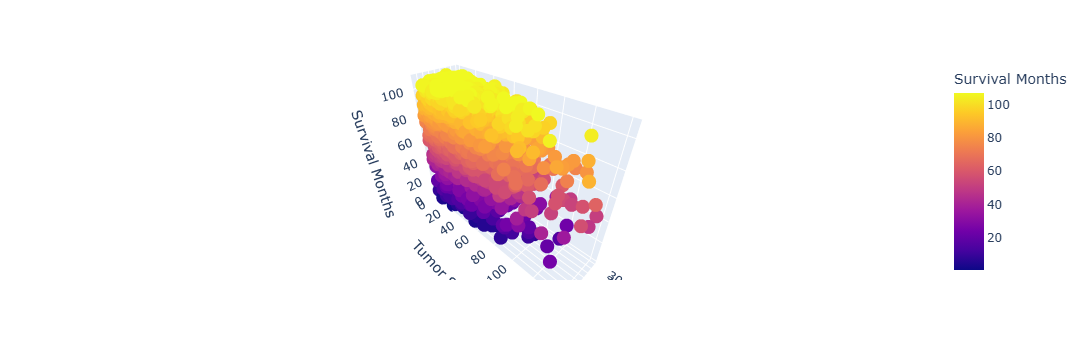

In [26]:
# "age", "tumor size" ve "survival months" arasındaki korelasyonları gösteren etkileşimli 3 boyutlu saçılım grafiği.
fig = px.scatter_3d(df, x='Age', y='Tumor Size', z='Survival Months', color='Survival Months')
fig.show()

### "Status(Alive/Dead)" kategorisine göre değişkenler arasındaki ilişkileri ve dağılımları görselleştirme

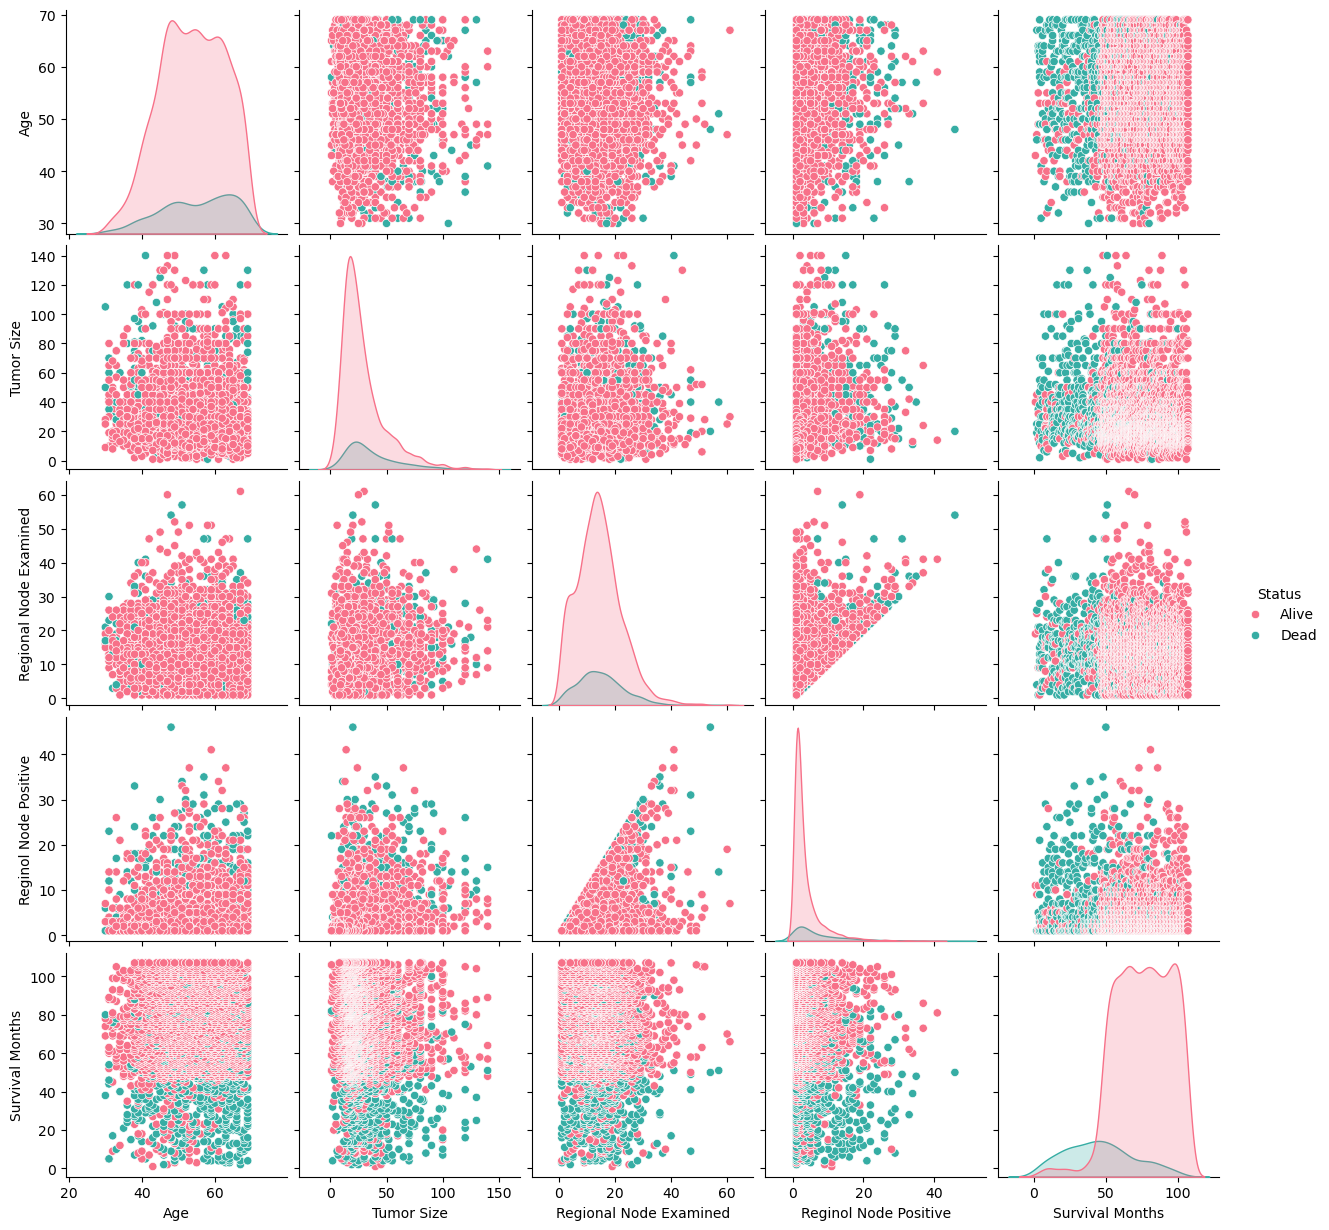

In [27]:
sns.pairplot(data=data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']],
             hue='Status',  # Kategorik sütun adı
             palette='husl')  # Renk paleti
plt.show()

* Yukarıdaki grafik incelendiğinde "Reginol Node Positive" (Pozitif Bölgesel Düğümler) ve "Tumor Size" arttıkça "Dead" durumunun yoğunlaştığı gözlenirken, "Age" ve "Regional Node Examined" değişkenleri daha zayıf bir ayrıştırma sağlamaktadır.

Race  ile Status İlişkisi


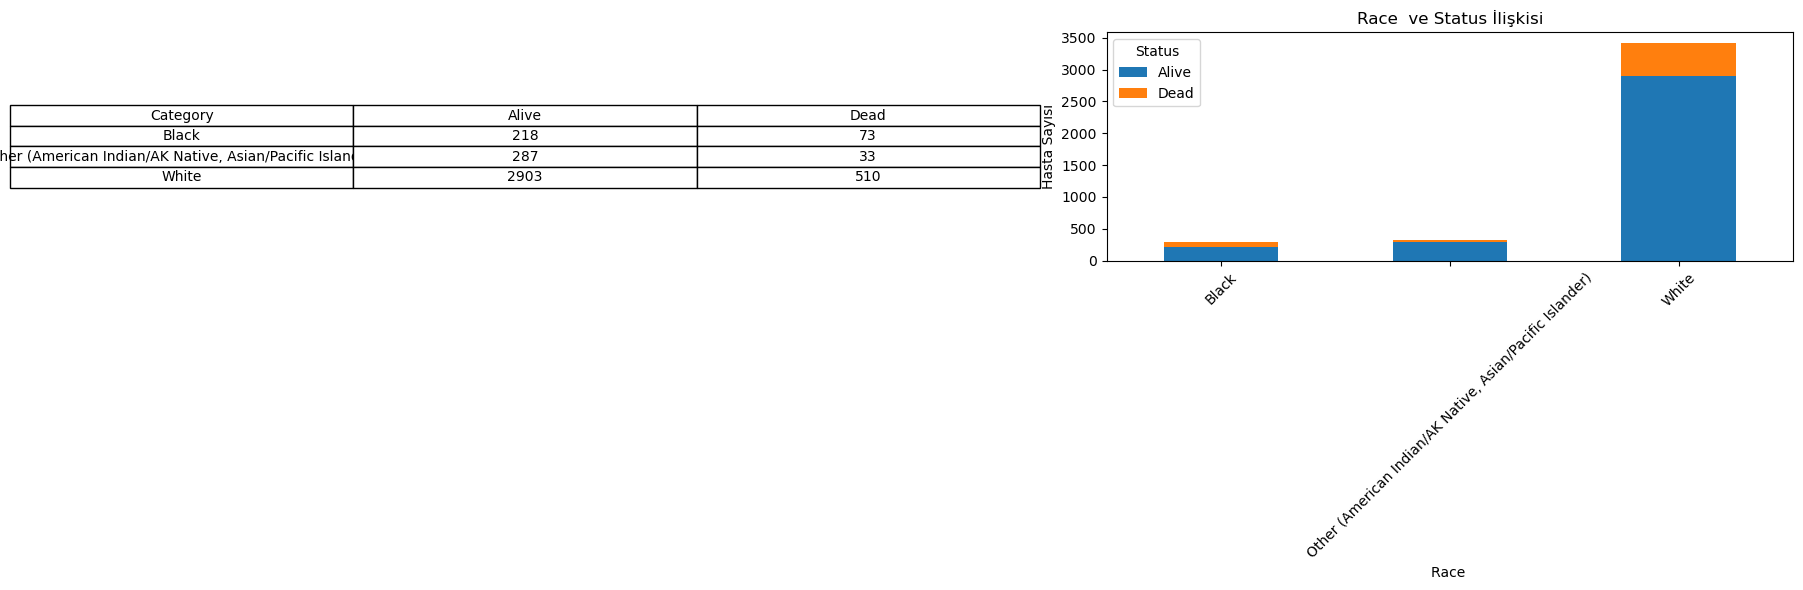

Marital Status ile Status İlişkisi


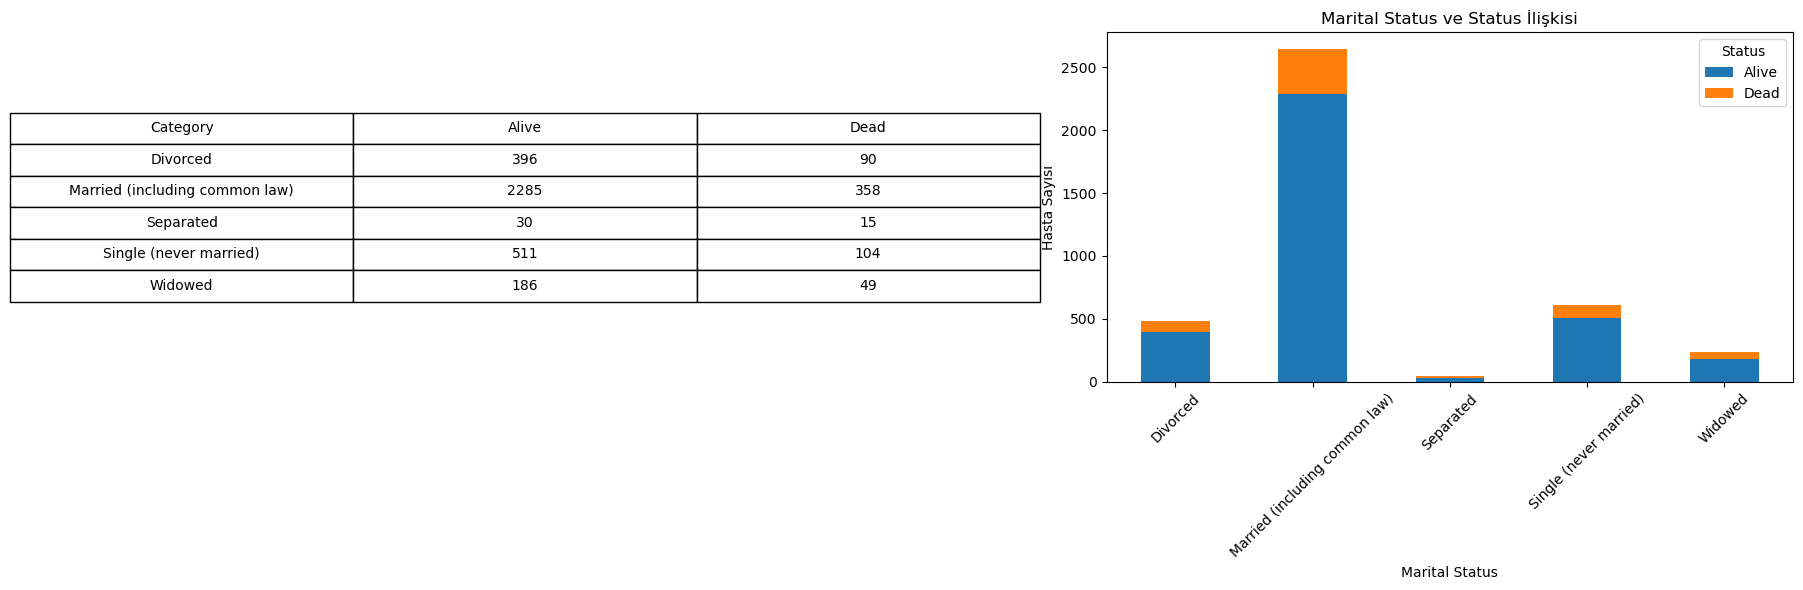

T Stage  ile Status İlişkisi


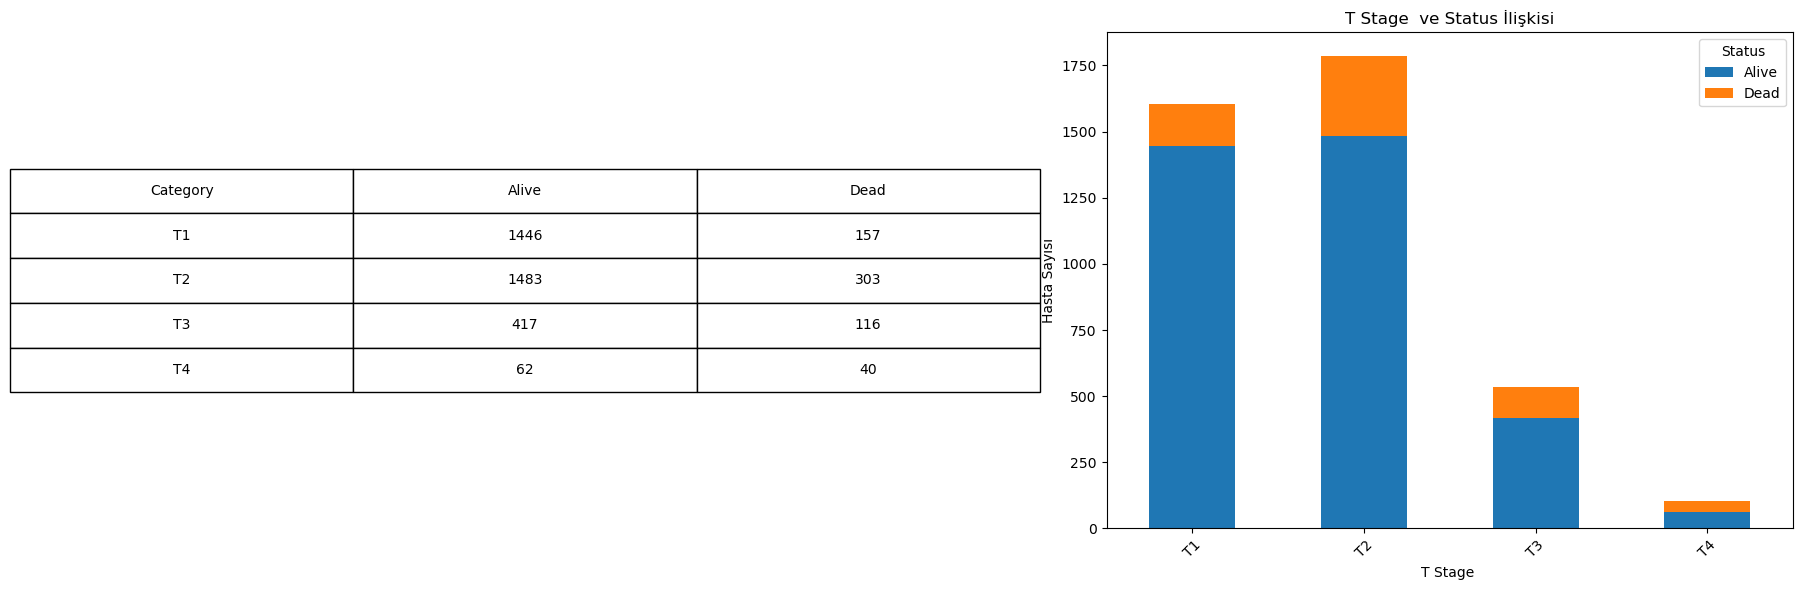

N Stage ile Status İlişkisi


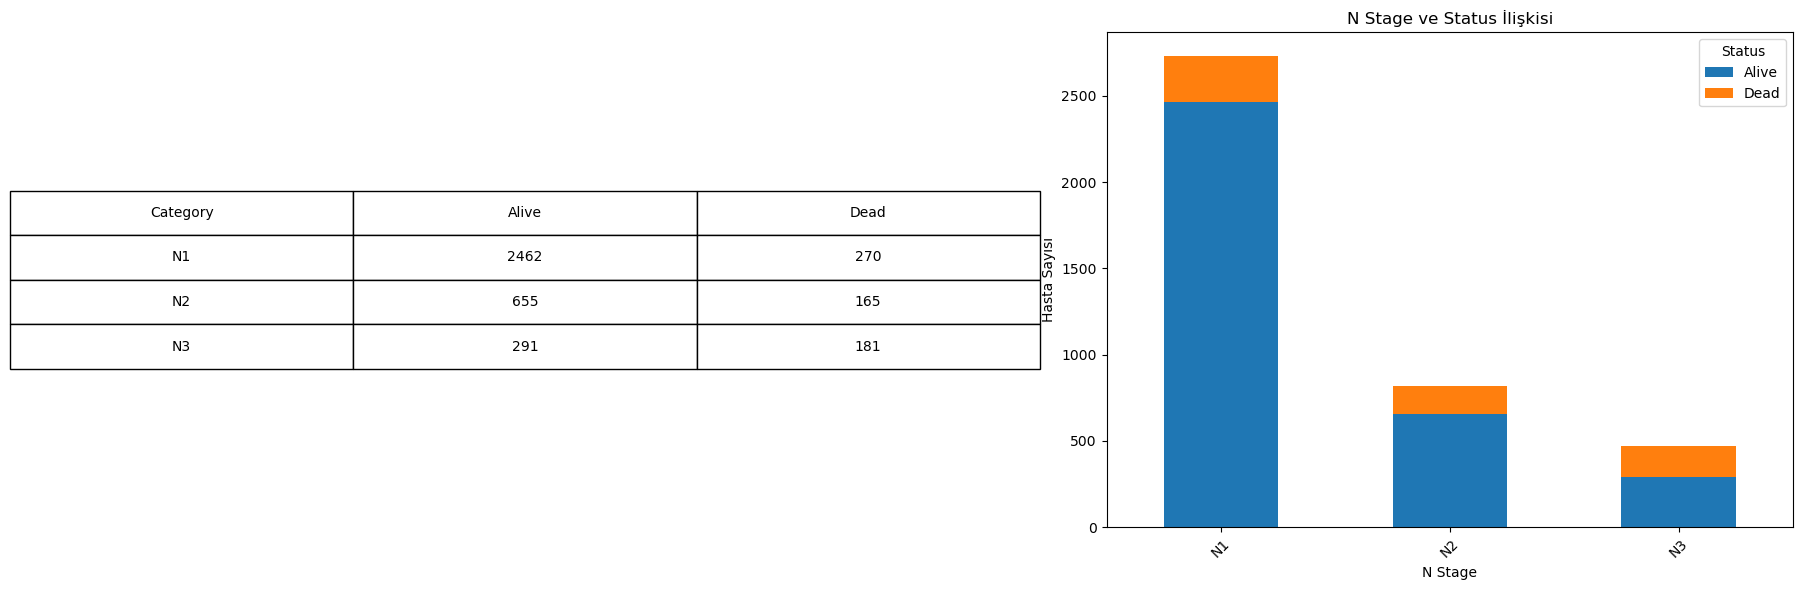

6th Stage ile Status İlişkisi


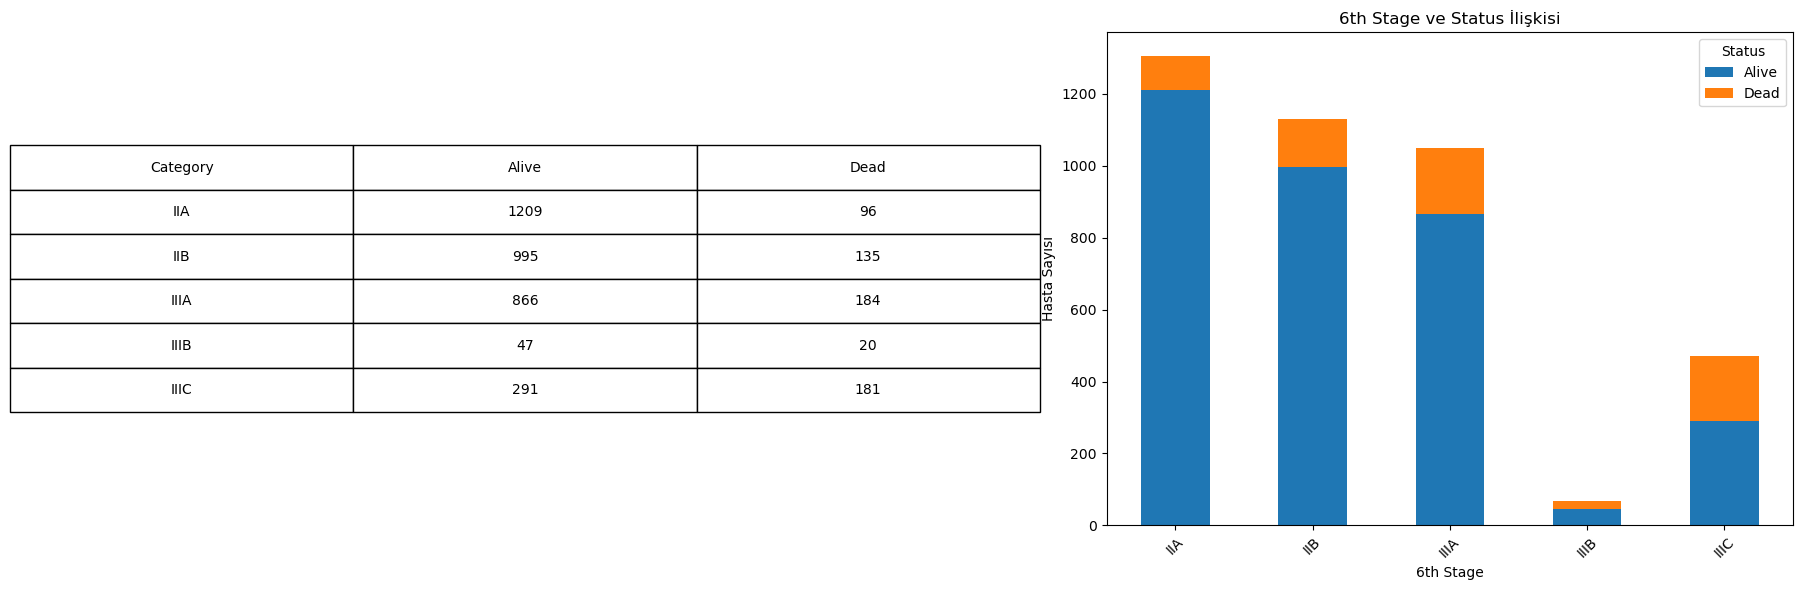

Grade ile Status İlişkisi


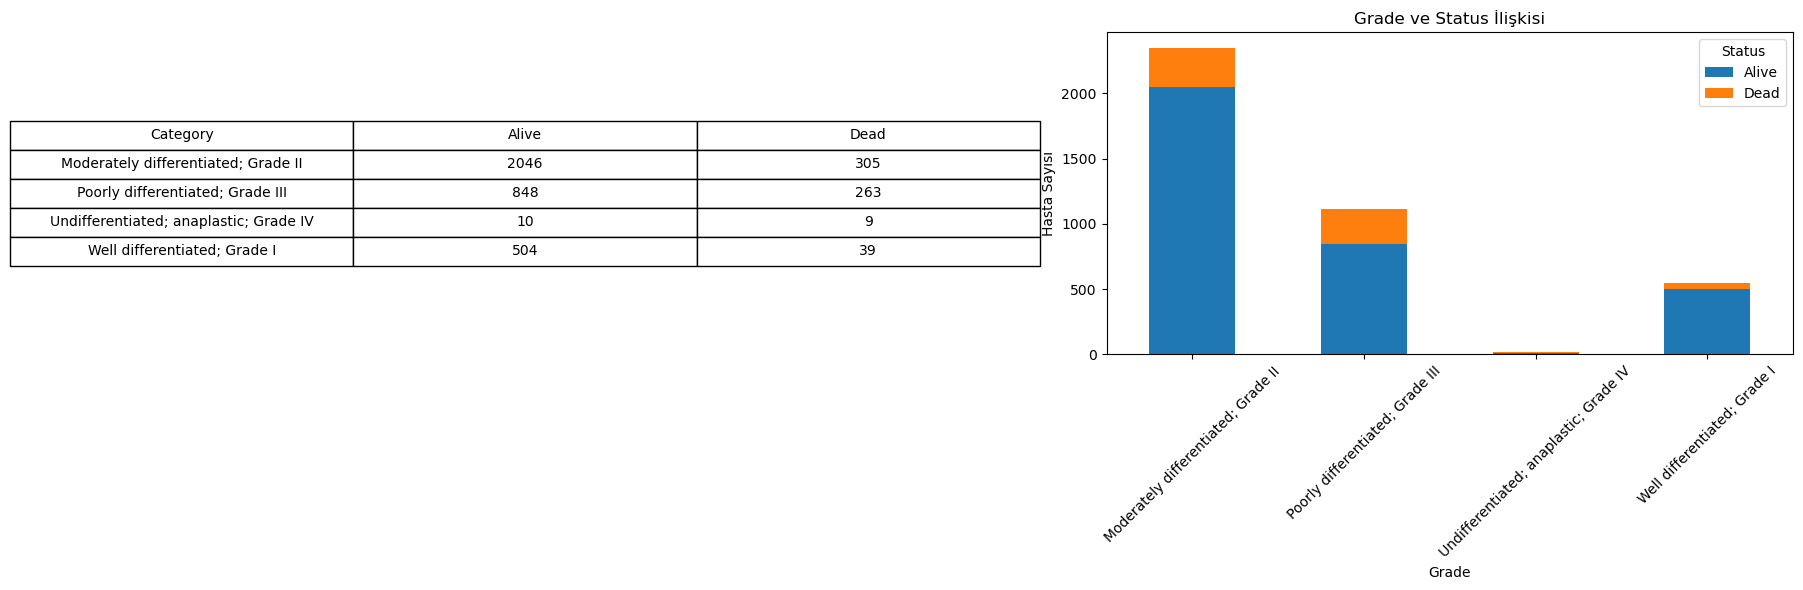

A Stage ile Status İlişkisi


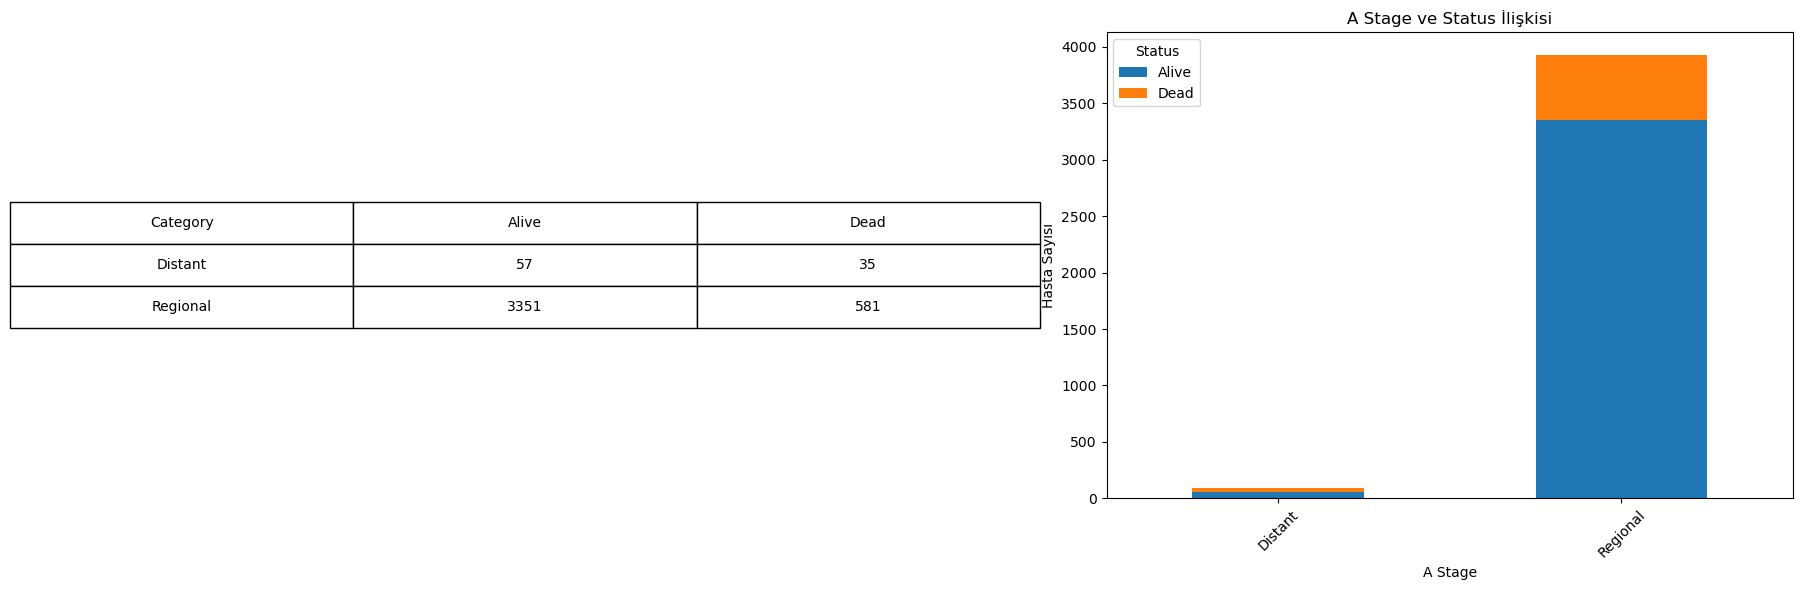

Estrogen Status ile Status İlişkisi


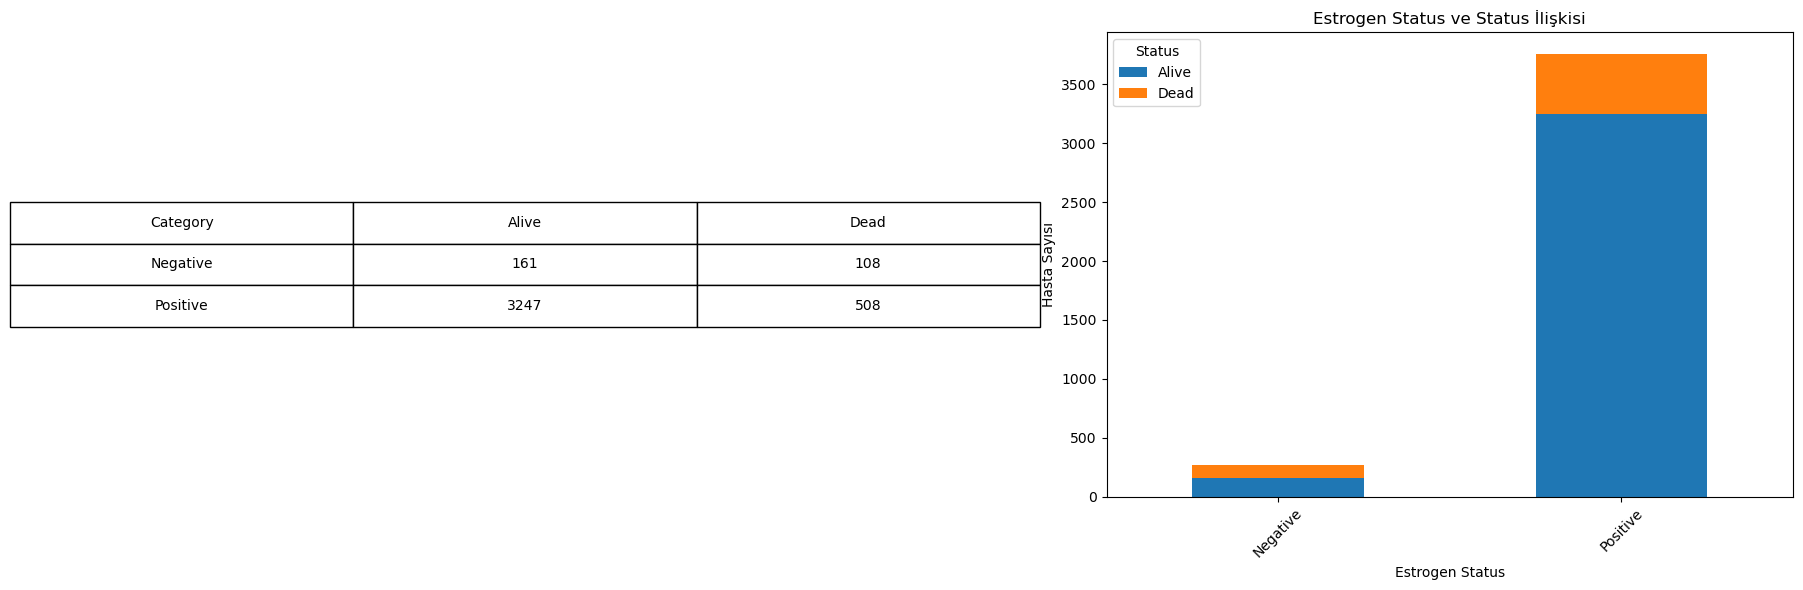

Progesterone Status ile Status İlişkisi


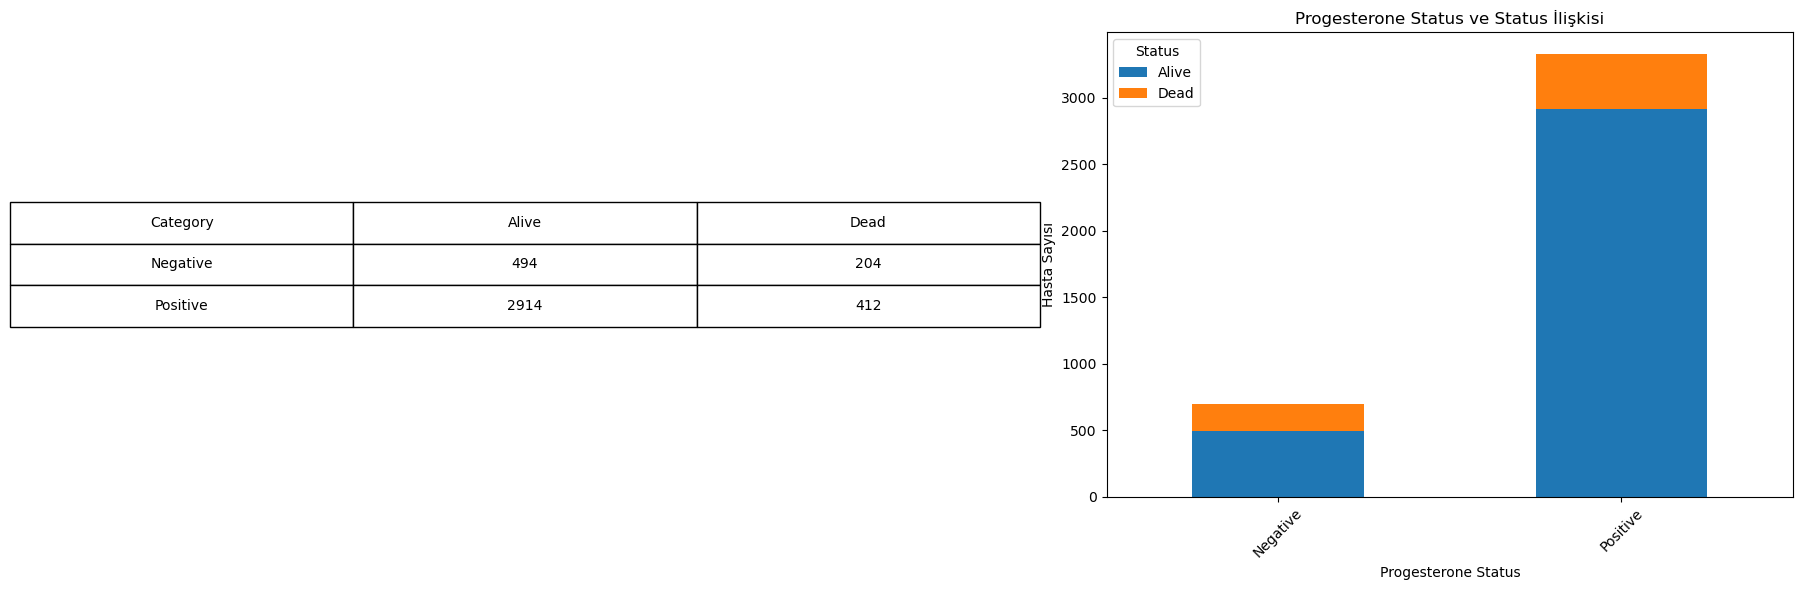

In [28]:
# Kategorik sütunların Status ile ilişkisini görselleştirme
for col in categorical_columns:
    if col != 'Status':
        print(f"{col} ile Status İlişkisi")
        cross_tab = pd.crosstab(data[col], data['Status'])

        # Yeni figür oluştur
        fig = plt.figure(figsize=(18, 6))

        # İlk sütun: Çapraz Tablo
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.axis('off')  # Eksenleri kapat
        table = plt.table(
            cellText=cross_tab.reset_index().values,
            colLabels=["Category"] + list(cross_tab.columns),
            loc='center',
            cellLoc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.5, 2.5)  # Tabloyu büyüt

        # İkinci sütun: Yığılmış Bar Grafiği
        ax2 = fig.add_subplot(1, 2, 2)
        cross_tab.plot(kind='bar', stacked=True, ax=ax2, color=['#1f77b4', '#ff7f0e'])
        ax2.set_title(f"{col} ve Status İlişkisi")
        ax2.set_ylabel("Hasta Sayısı")
        ax2.set_xlabel(col)
        plt.xticks(rotation=45)  # Etiketleri döndür

        plt.tight_layout()
        plt.show()

* Hayatta olan hastaların çoğu, "Grade II (Orta Derecede Farklılaşmış)" tümöre sahiptir. Diğer kategorilerle karşılaştırıldığında, "Grade I (İyi Farklılaşmış)" tümöre sahip ve ölmüş hasta sayısı oldukça azdır.

* Hayatta olan hastaların çoğunun östrojen durumu pozitiftir.

* Hayatta olan hastaların çoğunun progesteron durumu pozitiftir.

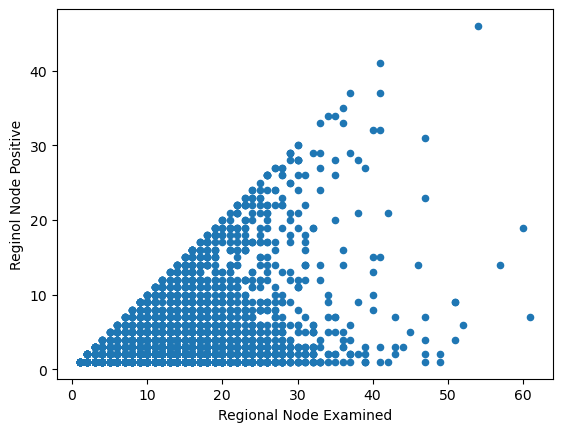

In [29]:
data.plot.scatter(x = 'Regional Node Examined', y = 'Reginol Node Positive')
plt.show()

* "Regional Node Examined (İncelenen Bölgesel Düğüm)" ile "Reginol Node Positive (Pozitif Bölgesel Düğüm)" arasında doğrusal bir ilişki vardır.
* Regional Node Examined: Patolog tarafından çıkarılan ve incelenen toplam bölgesel lenf düğümlerinin sayısını ifade eder.
* Reginol Node Positive: İncelenen bu düğümlerden metastaz içeren pozitif düğümlerin kesin sayısını ifade eder.
* Bu iki özellik arasında bir bağlantı olduğu görülmektedir.

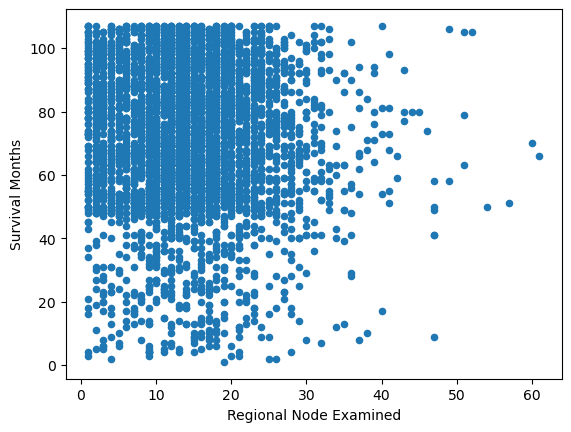

In [30]:
data.plot.scatter(x = 'Regional Node Examined', y = 'Survival Months')
plt.show()

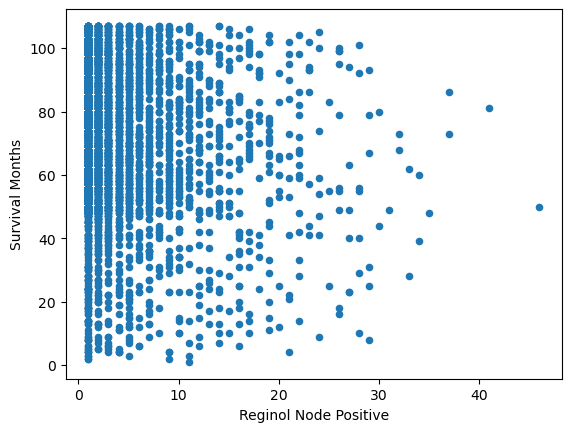

In [31]:
data.plot.scatter(x = 'Reginol Node Positive', y = 'Survival Months')
plt.show()

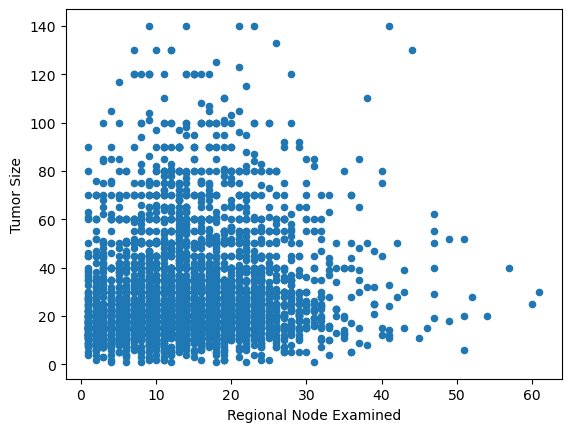

In [32]:
data.plot.scatter(x = 'Regional Node Examined', y = 'Tumor Size')
plt.show()

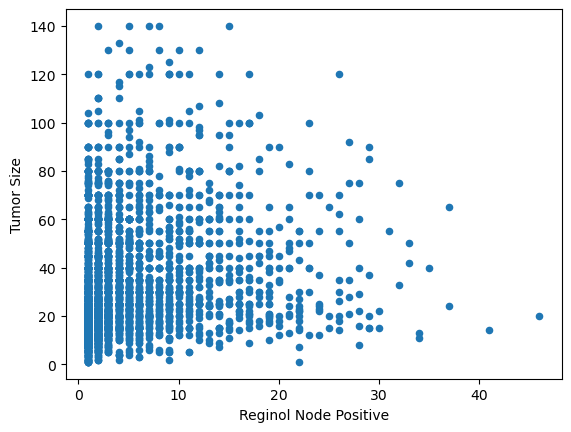

In [33]:
data.plot.scatter(x = 'Reginol Node Positive', y = 'Tumor Size')
plt.show()

### Aykırı Değerlerin İşlenmesi

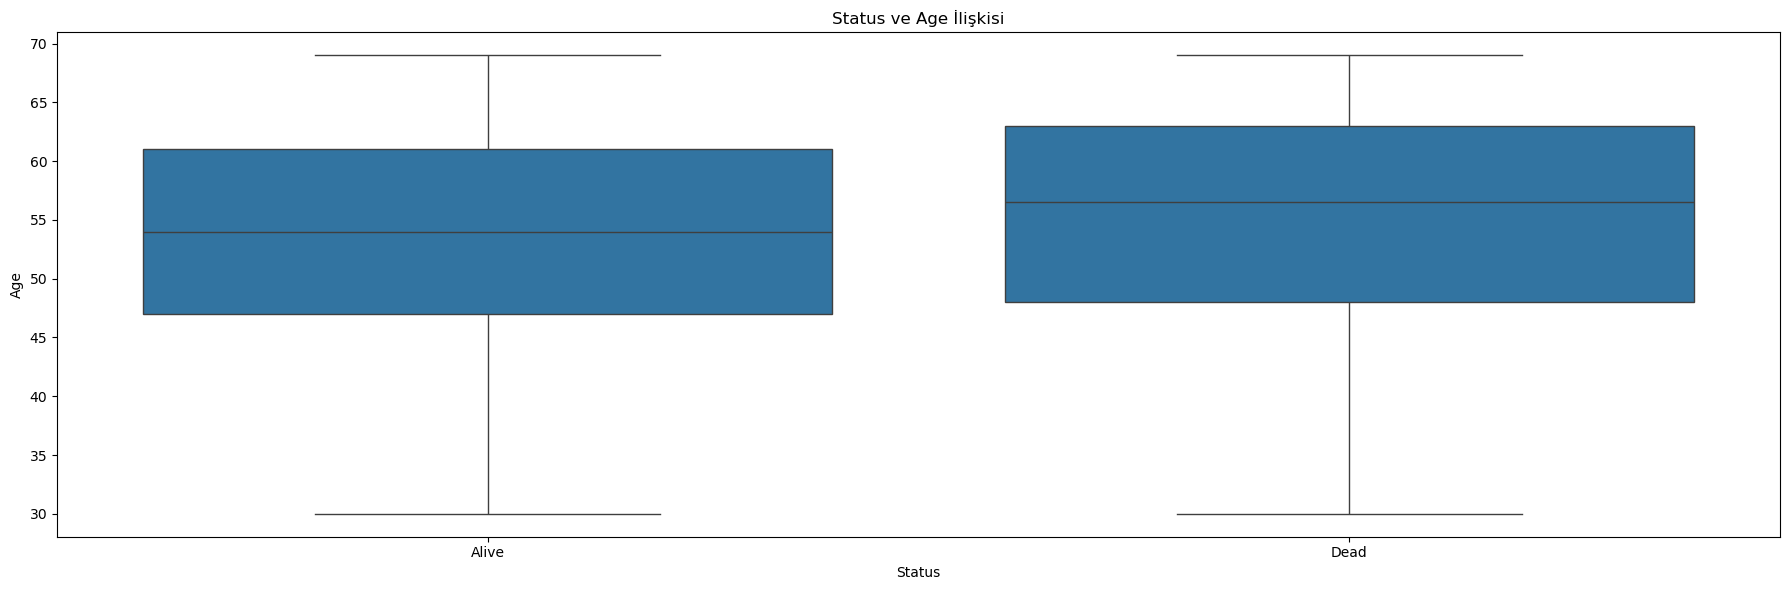

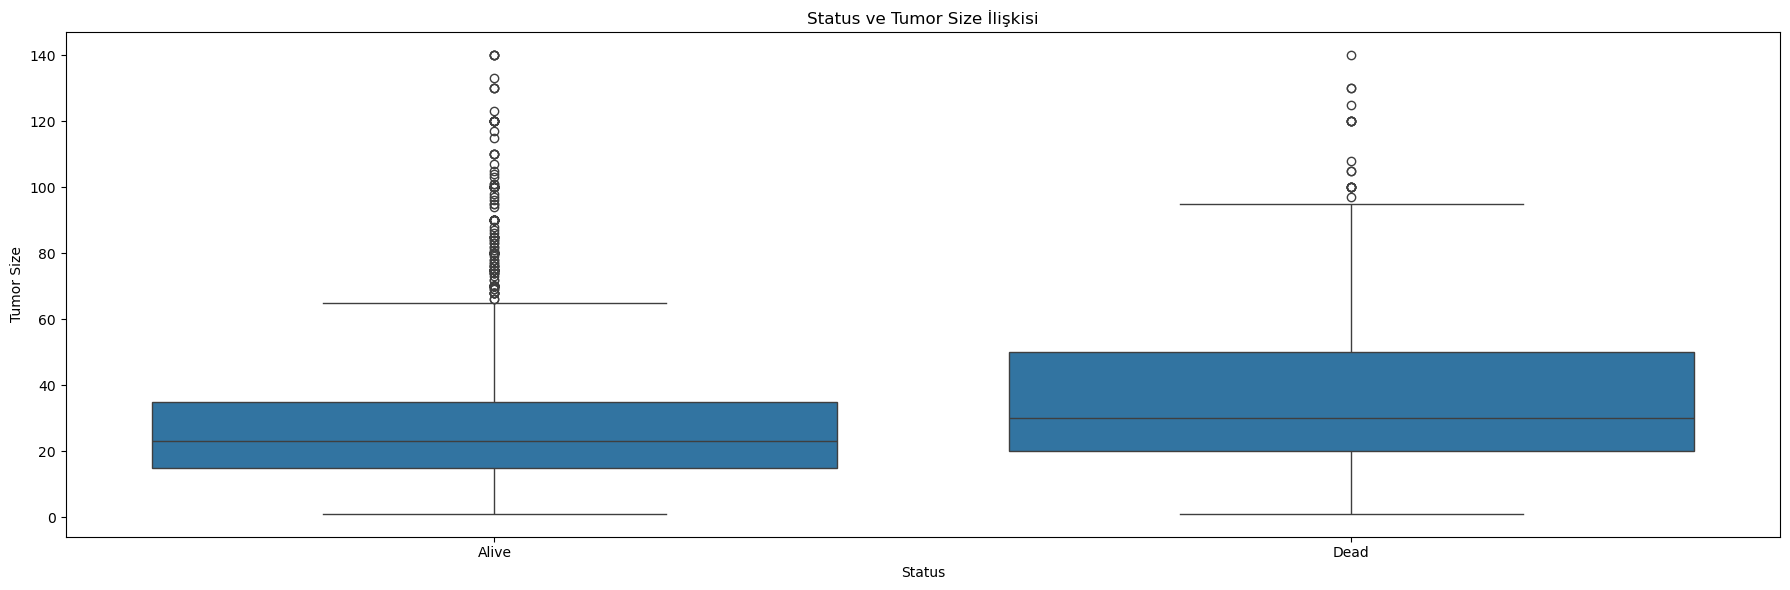

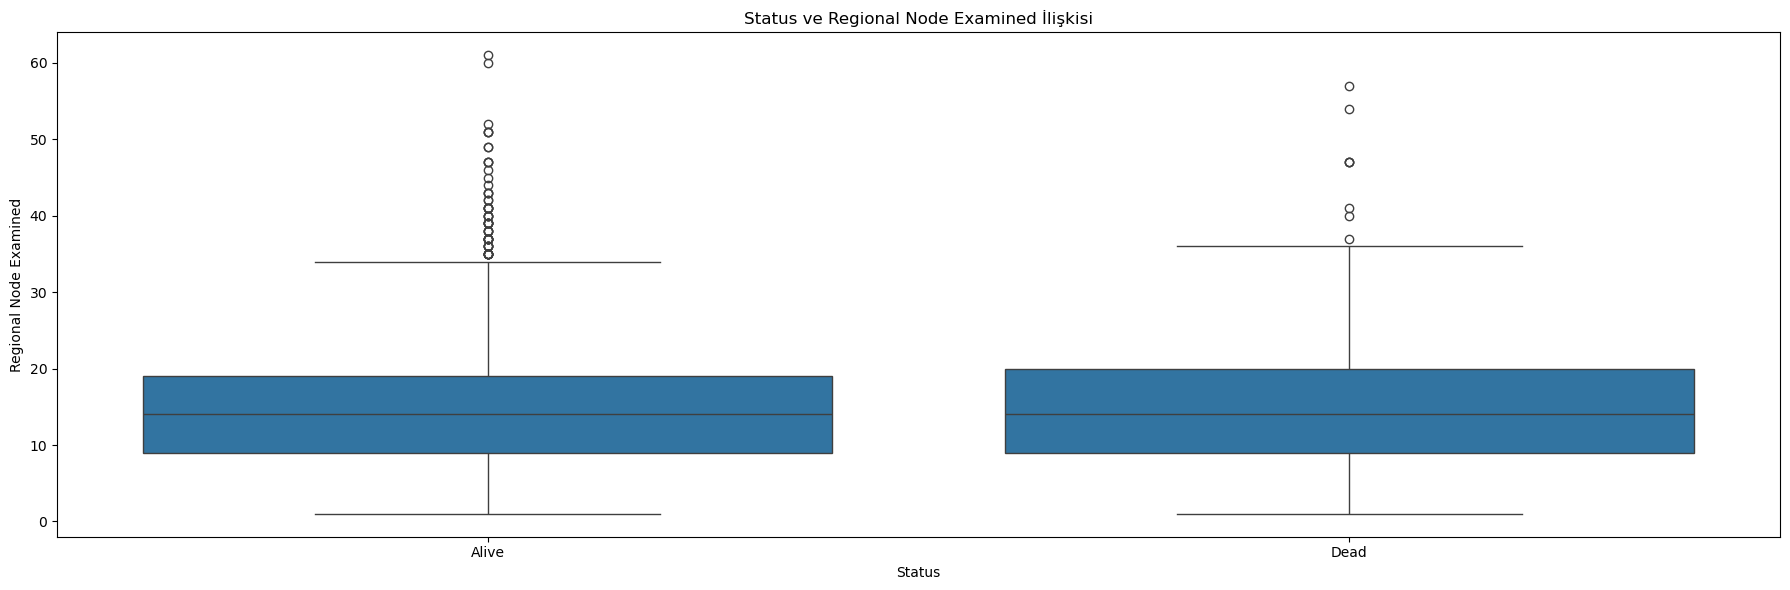

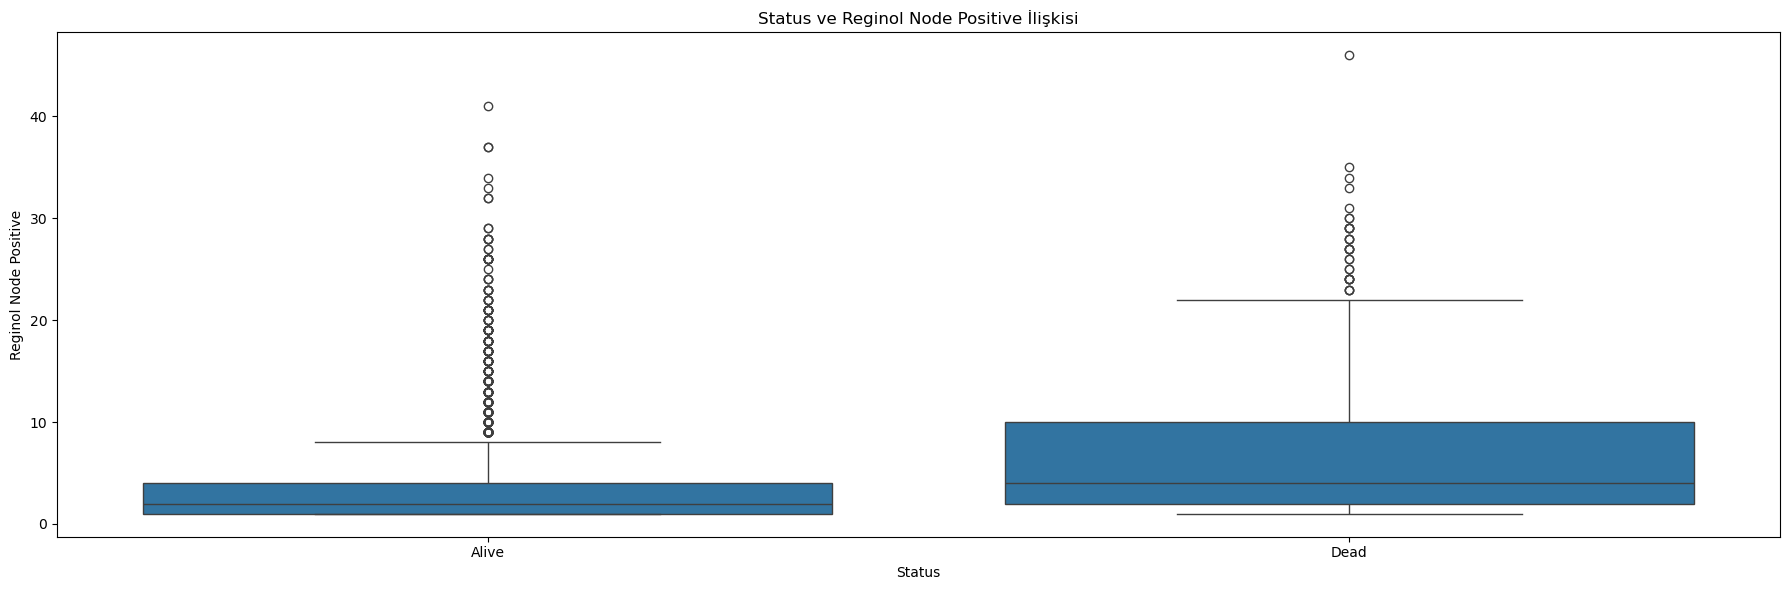

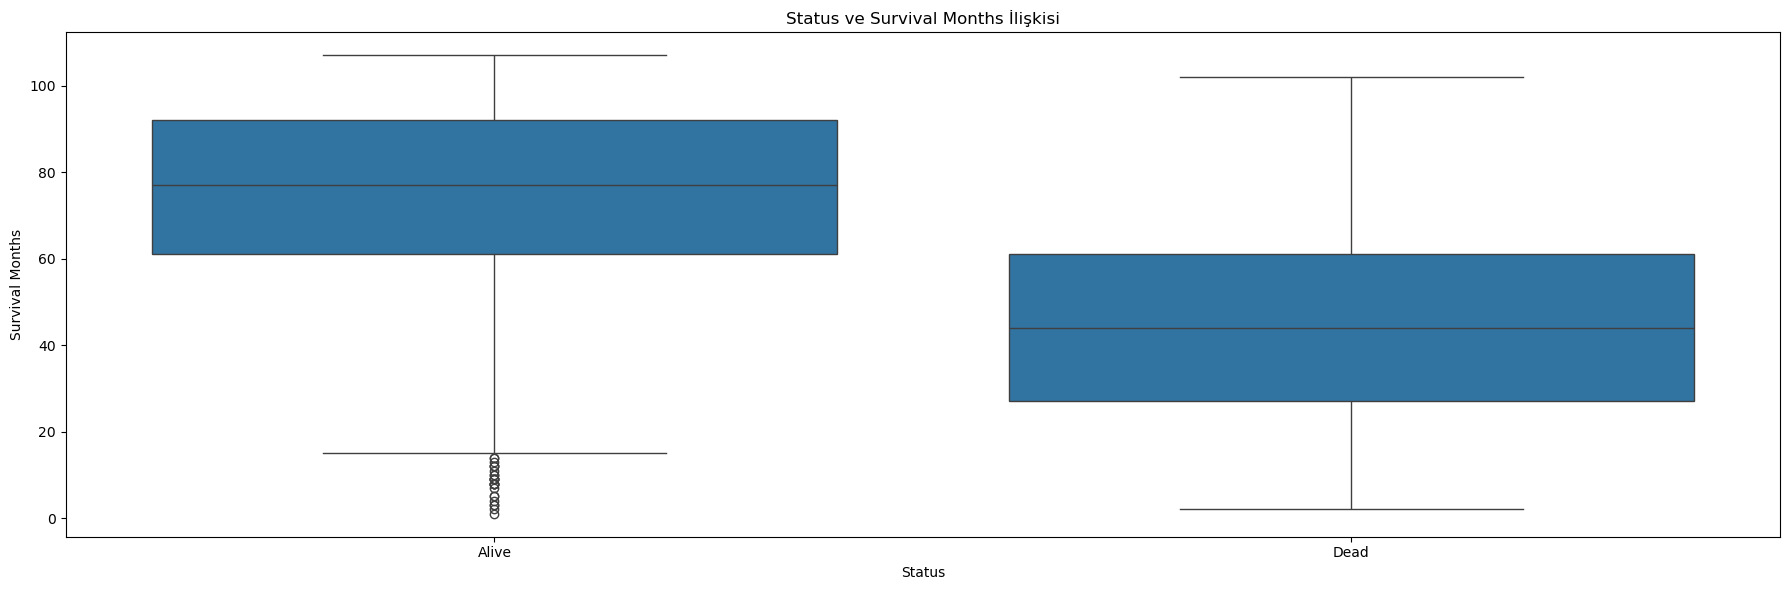

In [34]:
# Sayısal sütunların Status ile ilişkisini görselleştirme
for col in numerical_columns:
    fig = plt.figure(figsize=(18, 6))

    # Boxplot için grafik
    sns.boxplot(x=data['Status'], y=data[col])
    plt.title(f"Status ve {col} İlişkisi")
    plt.xlabel("Status")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

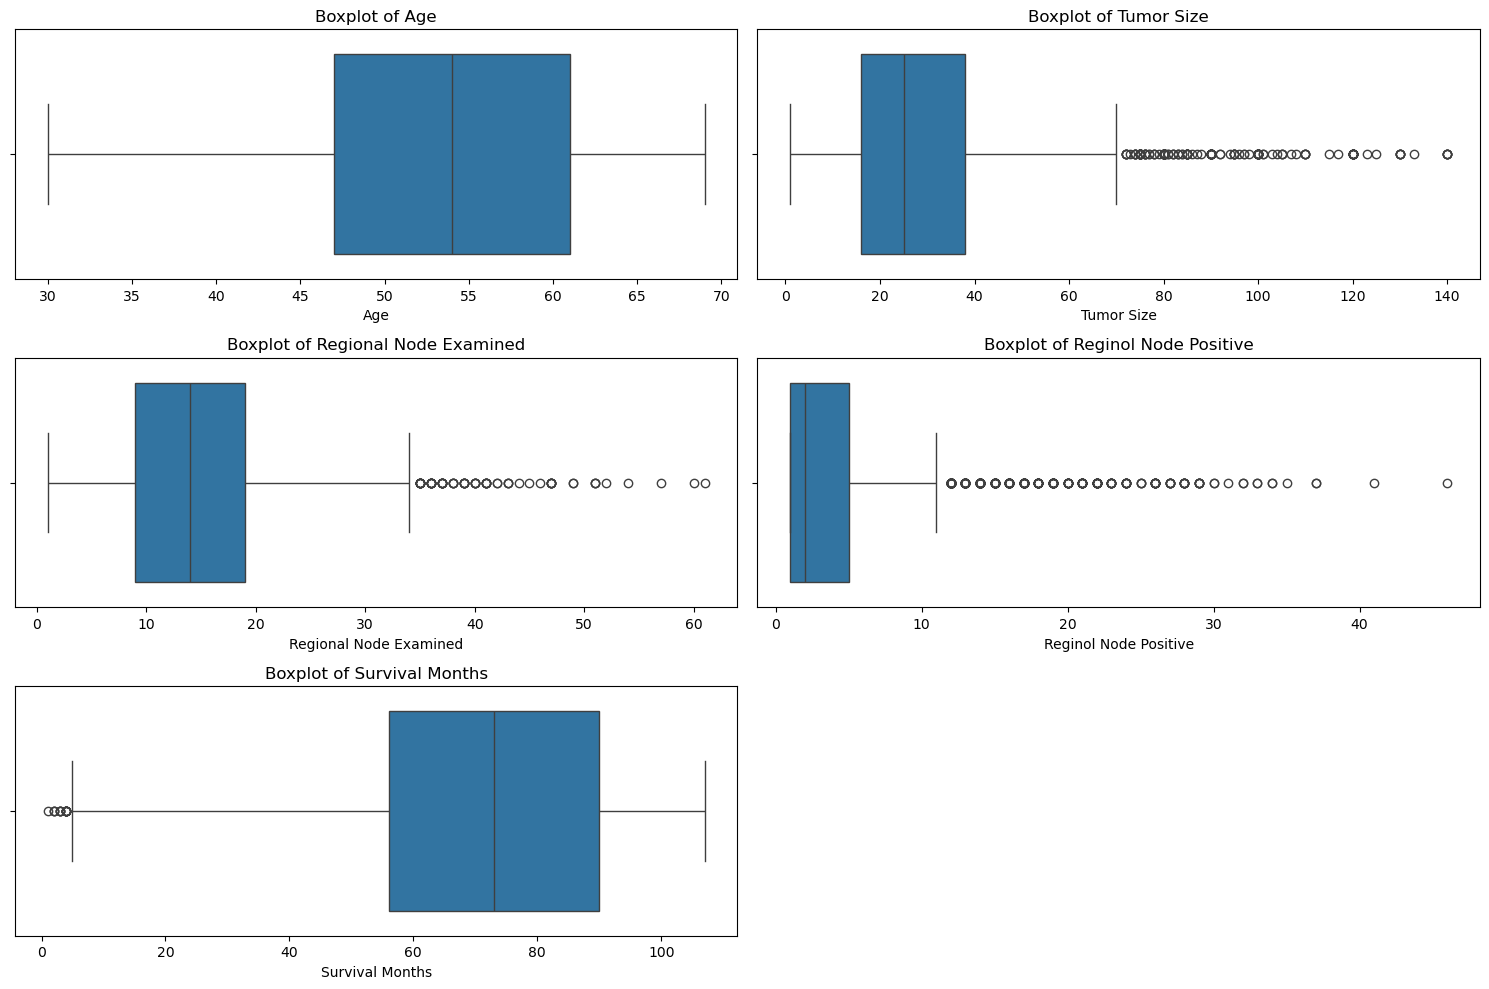

In [35]:
# Boxplot ile aykırı değerleri görselleştirme
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [36]:
# IQR yöntemiyle aykırı değer tespiti
outlier_summary = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = {
        'Aykırı Değer Sayısı': len(outliers),
        'Alt Sınır': lower_bound,
        'Üst Sınır': upper_bound}

# Aykırı değer özetini bir DataFrame olarak düzenleme
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.reset_index(inplace=True)
outlier_df.rename(columns={'index': 'Sütun'}, inplace=True)

outlier_df

Sütun  Aykırı Değer Sayısı  Alt Sınır  Üst Sınır
0                     Age                  0.0       26.0       82.0
1              Tumor Size                222.0      -17.0       71.0
2  Regional Node Examined                 72.0       -6.0       34.0
3   Reginol Node Positive                344.0       -5.0       11.0
4         Survival Months                 18.0        5.0      141.0

##### 1. Age (Hastanın yaşı):
* Durum: Aykırı değer yok. Veri doğal bir dağılıma sahip.
* Karar: Hiçbir işlem yapmamıza gerek yok.
##### 2. Tumor Size (Tümörün boyutu):
* Durum: 222 aykırı değer var. Üst sınır 71, üstünde ciddi anormal değerler var.
* Karar: Tıbbi olarak, bu kadar büyük tümör boyutlarının anlamlı olup olmadığını değerlendirmek önemli. Büyük olasılıkla, bu değerler anomalik.
* Uygulama Önerisi: Üst sınırı 71 ile sınırlayalım (kırpalım).
##### 3. Regional Node Examined (İncelenen bölgesel lenf nodlarının sayısı):
* Durum: 72 aykırı değer var. Üst sınır 34.
* Karar: Yüksek değerler tıbbi olarak makul olabilir, ancak büyük değerlerin model üzerinde etkisi sınırlı olmalı.
* Uygulama Önerisi: Üst sınırı 34 ile sınırlayalım (kırpalım).
##### 4. Reginol Node Positive (Pozitif çıkan bölgesel lenf nodlarının sayısı):
* Durum: 344 aykırı değer var. Üst sınır 11. Bu sütunda yoğun bir şekilde yüksek değerler gözlemleniyor.
* Karar: Pozitif lenf nodlarının sayısı, hastalığın ciddiyetini gösterebilir. Bu nedenle, yüksek değerlerin tamamen çıkartılması doğru olmayabilir.
* Uygulama Önerisi: Logaritmik dönüşüm gibi bir yöntemle bu değerlerin etkisini azaltabiliriz.
##### 5. Survival Months (Sağ kalma süresi):
* Durum: 18 aykırı değer var. Üst sınır 141. Aykırı değer sayısı oldukça az.
* Karar: Sağ kalma süresinde çok yüksek değerler, nadir ancak anlamlı olabilir. Bu nedenle dikkatlice ele alınmalı.
* Uygulama Önerisi: Üst sınırı 141 ile sınırlayalım (kırpalım).

In [37]:
# Aykırı değerler için kırpma işlemi
sutunKirpma = ['Tumor Size', 'Regional Node Examined', 'Survival Months', 'Reginol Node Positive']
for col in sutunKirpma:
    altSinir = outlier_summary[col]['Alt Sınır']
    ustSinir = outlier_summary[col]['Üst Sınır']
    data[col] = data[col].clip(lower = altSinir, upper = ustSinir)

# Güncellenen veri setini kontrol edelim
data.describe()


Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    29.351143               14.228131   
std       8.963134    17.767275                7.674405   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000    71.000000               34.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                3.567843        71.305666  
std                 3.281153        22.898755  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                11.000000       107.000000

In [38]:
# IQR yöntemiyle aykırı değer tespiti
outlier_summary = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_summary[col] = {
        'Aykırı Değer Sayısı': len(outliers),
        'Alt Sınır': lower_bound,
        'Üst Sınır': upper_bound}

# Aykırı değer özetini bir DataFrame olarak düzenleme
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.reset_index(inplace=True)
outlier_df.rename(columns={'index': 'Sütun'}, inplace=True)

outlier_df

Sütun  Aykırı Değer Sayısı  Alt Sınır  Üst Sınır
0                     Age                  0.0       26.0       82.0
1              Tumor Size                  0.0      -17.0       71.0
2  Regional Node Examined                  0.0       -6.0       34.0
3   Reginol Node Positive                  0.0       -5.0       11.0
4         Survival Months                  0.0        5.0      141.0

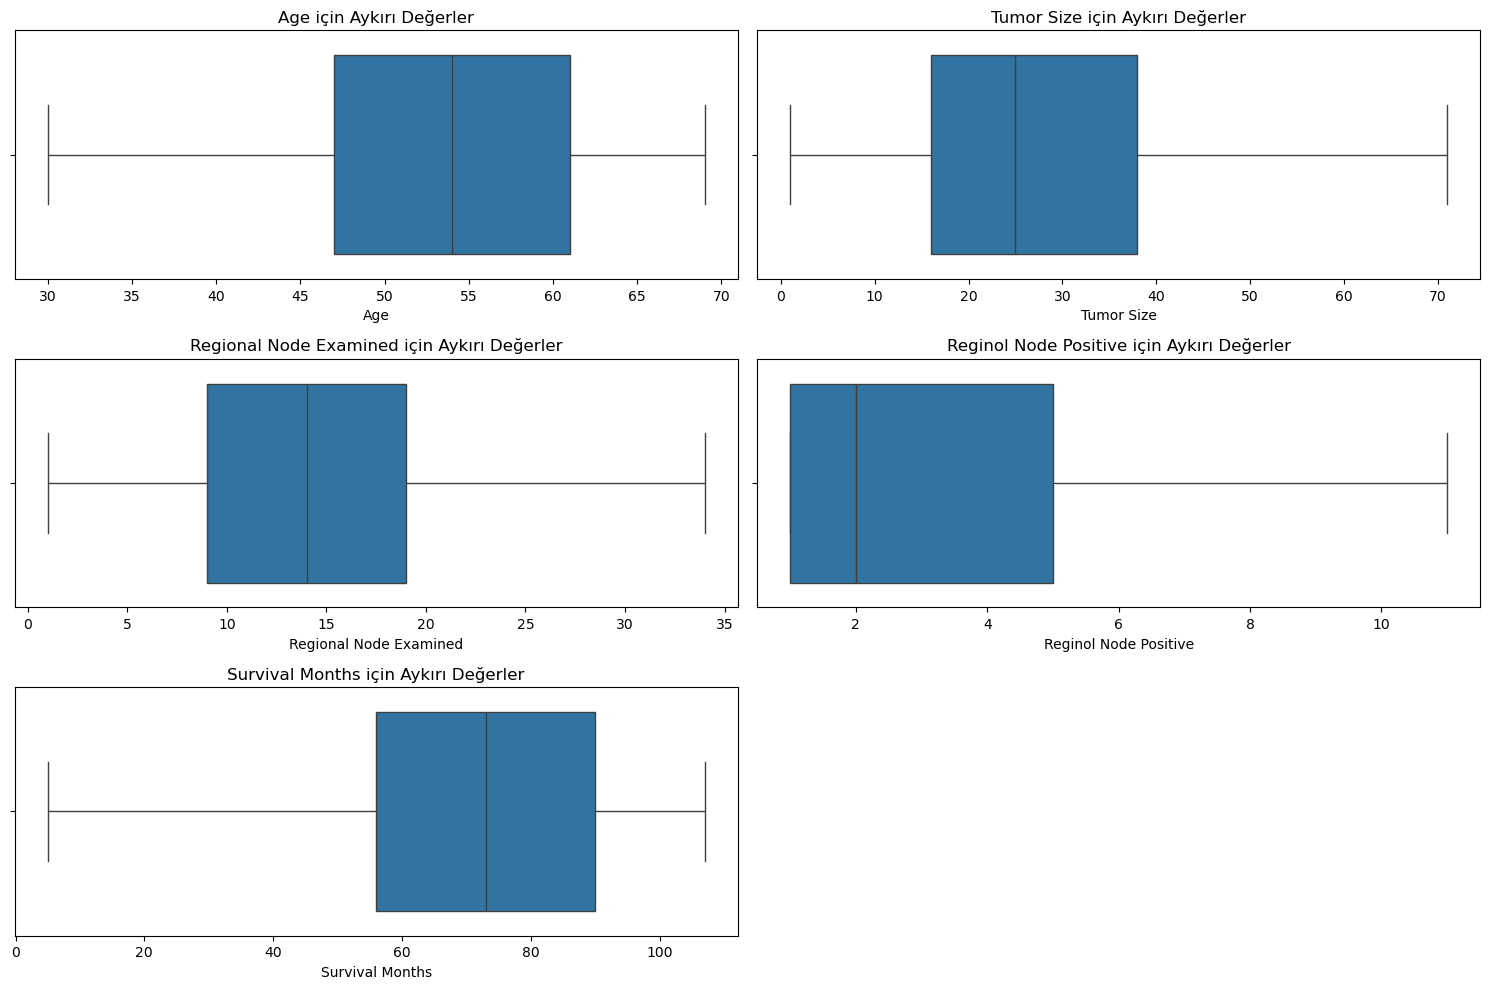

In [39]:
# Boxplot ile aykırı değerleri görselleştirme
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x=col)
    plt.title(f"{col} için Aykırı Değerler")
plt.tight_layout()
plt.show()

## Data Preparation

### Encoding İşlemi

In [40]:
from sklearn.preprocessing import LabelEncoder

t_stage_mapping = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
n_stage_mapping = {'N1': 1, 'N2': 2, 'N3': 3}
sixth_stage_mapping = {'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5}
grade_mapping = {'Well differentiated; Grade I': 1,
                 'Moderately differentiated; Grade II': 2,
                 'Poorly differentiated; Grade III': 3,
                 'Undifferentiated; anaplastic; Grade IV': 4}
Status_mapping = {'Alive': 1, 'Dead': 0}

# DataFrame'e çevirme
data['T Stage '] = data['T Stage '].map(t_stage_mapping)
data['N Stage'] = data['N Stage'].map(n_stage_mapping)
data['6th Stage'] = data['6th Stage'].map(sixth_stage_mapping)
data['Grade'] = data['Grade'].map(grade_mapping)
data['Status'] = data['Status'].map(Status_mapping)

In [41]:
data.head()

Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  T Stage   N Stage  6th Stage  Grade  \
0  Married (including common law)         2        3          5      2   
1  Married (including common law)         2        2          3      2   
2  Married (including common law)         2        1          2      3   
3                        Divorced         1        1          1      2   
4  Married (including common law)         2        2          3      2   

    A Stage  Tumor Size Estrogen Status Progesterone Status  \
0  Regional          40        Positive            Positive   
1  Regional          45        Positive            Positive   
2  Regional          25        Positive            Positive   
3  Regional          19        Positive            Positive   
4  Regional          35        Positive            Positive   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      19                     11                5       1  
1                      25                      9                5       1  
2                       4                      1                5       0  
3                      26                      1                5       0  
4                      21                      5                5       0

In [42]:
# Tüm sütunların veri tiplerine bakma
data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                    int64
N Stage                    int64
6th Stage                  int64
Grade                      int64
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                     int64
dtype: object

### One hot encoding

In [43]:
# one-hot encoding için kategorik sütunları tanımlama
cat_cols = ['Race ', 'Marital Status', 'A Stage', 'Estrogen Status', 'Progesterone Status']

data = pd.get_dummies(data, columns=cat_cols, dtype=int)

In [44]:
data.head(11)

Age  T Stage   N Stage  6th Stage  Grade  Tumor Size  \
0    43         2        3          5      2          40   
1    47         2        2          3      2          45   
2    67         2        1          2      3          25   
3    46         1        1          1      2          19   
4    63         2        2          3      2          35   
5    49         2        3          5      2          32   
6    64         2        1          2      2          22   
7    55         1        1          1      2          15   
8    59         3        1          3      2          70   
9    67         3        2          3      3          55   
10   61         2        3          5      3          47   

    Regional Node Examined  Reginol Node Positive  Survival Months  Status  \
0                       19                     11                5       1   
1                       25                      9                5       1   
2                        4                      1                5       0   
3                       26                      1                5       0   
4                       21                      5                5       0   
5                       20                     11                5       1   
6                        1                      1                5       0   
7                        9                      1                5       1   
8                        9                      1                5       0   
9                        9                      9                5       0   
10                      21                     11                5       0   

    ...  Marital Status_Married (including common law)  \
0   ...                                              1   
1   ...                                              1   
2   ...                                              1   
3   ...                                              0   
4   ...                                              1   
5   ...                                              1   
6   ...                                              0   
7   ...                                              1   
8   ...                                              0   
9   ...                                              1   
10  ...                                              0   

    Marital Status_Separated  Marital Status_Single (never married)  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4                          0                                      0   
5                          0                                      0   
6                          0                                      1   
7                          0                                      0   
8                          0                                      1   
9                          0                                      0   
10                         0                                      0   

    Marital Status_Widowed  A Stage_Distant  A Stage_Regional  \
0                        0                0                 1   
1                        0                0                 1   
2                        0                0                 1   
3                        0                0                 1   
4                        0                0                 1   
5                        0                0                 1   
6                        0                0                 1   
7                        0                0                 1   
8                        0                0                 1   
9                        0                0                 1   
10                       1                0                 1   

    Estrogen St

In [45]:
data.shape

(4024, 24)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Age                                                              4024 non-null   int64
 1   T Stage                                                          4024 non-null   int64
 2   N Stage                                                          4024 non-null   int64
 3   6th Stage                                                        4024 non-null   int64
 4   Grade                                                            4024 non-null   int64
 5   Tumor Size                                                       4024 non-null   int64
 6   Regional Node Examined                                           4024 non-null   int64
 7   Reginol Node Positive                                       

In [47]:
data.describe()

Age     T Stage       N Stage    6th Stage        Grade  \
count  4024.000000  4024.000000  4024.000000  4024.000000  4024.000000   
mean     53.972167     1.784791     1.438370     2.321819     2.150596   
std       8.963134     0.765531     0.693479     1.266624     0.638234   
min      30.000000     1.000000     1.000000     1.000000     1.000000   
25%      47.000000     1.000000     1.000000     1.000000     2.000000   
50%      54.000000     2.000000     1.000000     2.000000     2.000000   
75%      61.000000     2.000000     2.000000     3.000000     3.000000   
max      69.000000     4.000000     3.000000     5.000000     4.000000   

        Tumor Size  Regional Node Examined  Reginol Node Positive  \
count  4024.000000             4024.000000            4024.000000   
mean     29.351143               14.228131               3.567843   
std      17.767275                7.674405               3.281153   
min       1.000000                1.000000               1.000000   
25%      16.000000                9.000000               1.000000   
50%      25.000000               14.000000               2.000000   
75%      38.000000               19.000000               5.000000   
max      71.000000               34.000000              11.000000   

       Survival Months       Status  ...  \
count      4024.000000  4024.000000  ...   
mean         71.305666     0.846918  ...   
std          22.898755     0.360111  ...   
min           5.000000     0.000000  ...   
25%          56.000000     1.000000  ...   
50%          73.000000     1.000000  ...   
75%          90.000000     1.000000  ...   
max         107.000000     1.000000  ...   

       Marital Status_Married (including common law)  \
count                                    4024.000000   
mean                                        0.656809   
std                                         0.474834   
min                                         0.000000   
25%                                         0.000000   
50%                                         1.000000   
75%                                         1.000000   
max                                         1.000000   

       Marital Status_Separated  Marital Status_Single (never married)  \
count               4024.000000                            4024.000000   
mean                   0.011183                               0.152833   
std                    0.105169                               0.359871   
min                    0.000000                               0.000000   
25%                    0.000000                               0.000000   
50%                    0.000000                               0.000000   
75%                    0.000000                               0.000000   
max                    1.000000                               1.000000   

       Marital Status_Widowed  A Stage_Distant  A Stage_Regional  \
count             4024.000000      4024.000000       4024.000000   
mean                 0.058400         0.022863          0.977137   
std                  0.234527         0.149485          0.149485   
min                  0.000000         0.000000          0.000000   
25%                  0.000000         0.000000          1.000000   
50%                  0.000000         0.000000          1.000000   
75%                  0.000000         0.000000          1.000000   
max                  1.000000         1.000000          1.000000   

       Estrogen Status_Negative  Estrogen Status_Positive  \
count               4024.000000               4024.000000   
mean                   0.066849                  0.933151   
std                    0.249791                  0.249791   
min                    0.000000                  0.000000   
25%                    0.000000                  1.000000   
50%                    0.000000                  1.000000   
75%                    0.000000                  1.000000   
max                    1.000000                  1.00000

In [48]:
data['Status'].value_counts()

Status
1    3408
0     616
Name: count, dtype: int64

In [49]:
# Korelasyon matrisini hesaplama
correlation_matrix = data.corr()

# Her bir özelliğin hedef değişkenle('Status') olan ilişkisini çıkarma
status_corr = correlation_matrix['Status'].sort_values(ascending=False)

# Korelasyon Değerlerini Gösterme
status_corr

Status                                                             1.000000
Survival Months                                                    0.476556
Estrogen Status_Positive                                           0.184650
Progesterone Status_Positive                                       0.177079
A Stage_Regional                                                   0.096584
Marital Status_Married (including common law)                      0.067734
Race _Other (American Indian/AK Native, Asian/Pacific Islander)    0.040780
Race _White                                                        0.023977
Marital Status_Single (never married)                             -0.018902
Marital Status_Divorced                                           -0.033045
Regional Node Examined                                            -0.034131
Marital Status_Widowed                                            -0.038338
Marital Status_Separated                                          -0.053237
Age         

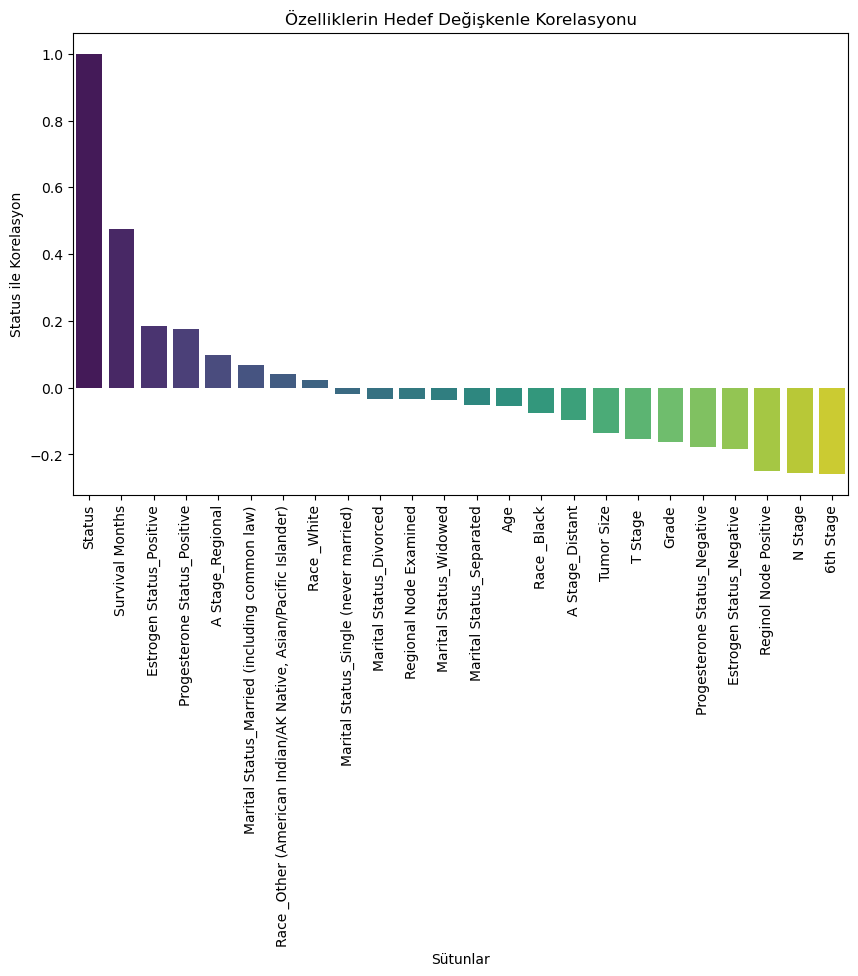

In [50]:
# Özelliklerin hedef değişkenle(Status) ilişkisini görselleştirme

plt.figure(figsize=(10, 6))
sns.barplot(x=status_corr.index, y=status_corr.values, palette='viridis')
plt.title('Özelliklerin Hedef Değişkenle Korelasyonu')
plt.xlabel('Sütunlar')
plt.ylabel('Status ile Korelasyon')
plt.xticks(rotation=90)
plt.show()

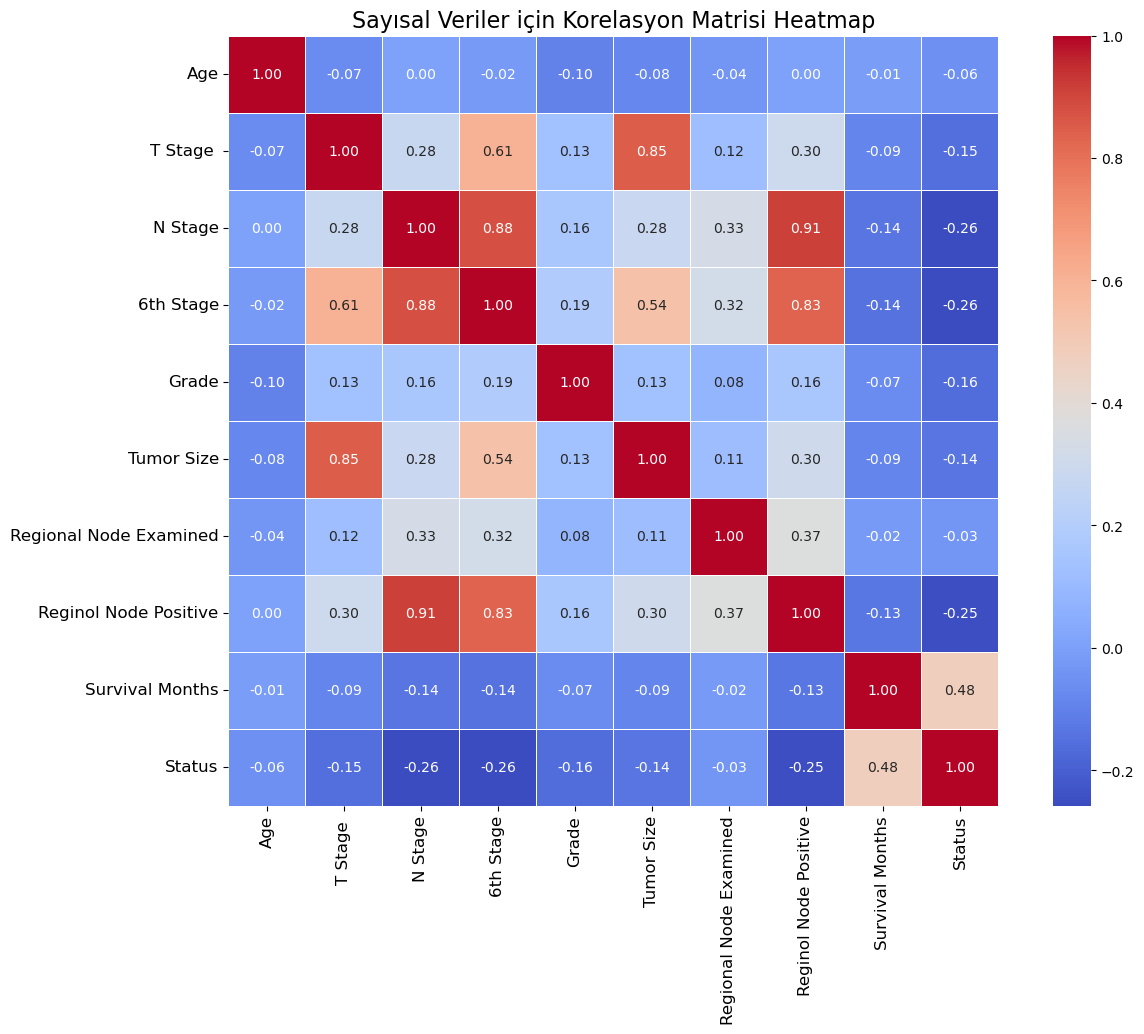

In [51]:
# Sadece sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, annot_kws={"size": 10})

plt.title('Sayısal Veriler için Korelasyon Matrisi Heatmap', fontsize=16)

# Etiket boyutlarını ayarlama
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split

# features (X) and target variable (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Veri setini eğitim ve test setlerine ayırma
# Eğitim için %80 ve test için %20'lik ortak bir bölme oranı kullanılıyo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bölünmeyi doğrulamak için ortaya çıkan veri kümelerinin boyutlarını yazdırma
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3219, 23)
X_test shape: (805, 23)
y_train shape: (3219,)
y_test shape: (805,)


In [53]:
# Sütun adlarını orijinal DataFrame'den alın
feature_names = X.columns.tolist()
feature_names

['Age',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'Grade',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Race _Black',
 'Race _Other (American Indian/AK Native, Asian/Pacific Islander)',
 'Race _White',
 'Marital Status_Divorced',
 'Marital Status_Married (including common law)',
 'Marital Status_Separated',
 'Marital Status_Single (never married)',
 'Marital Status_Widowed',
 'A Stage_Distant',
 'A Stage_Regional',
 'Estrogen Status_Negative',
 'Estrogen Status_Positive',
 'Progesterone Status_Negative',
 'Progesterone Status_Positive']

In [54]:
from imblearn.over_sampling import SMOTE

# SMOTE'yi eğitim verilerine uygulama
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [55]:
y_resampled.shape

(5472,)

In [56]:
X_resampled.shape

(5472, 23)

In [57]:
X_test.describe()

Age    T Stage      N Stage   6th Stage       Grade  Tumor Size  \
count  805.000000  805.000000  805.000000  805.000000  805.000000  805.000000   
mean    54.034783    1.754037    1.474534    2.356522    2.172671   29.264596   
std      9.040609    0.739184    0.712999    1.285529    0.649338   17.961008   
min     30.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     47.000000    1.000000    1.000000    1.000000    2.000000   16.000000   
50%     54.000000    2.000000    1.000000    2.000000    2.000000   25.000000   
75%     61.000000    2.000000    2.000000    3.000000    3.000000   37.000000   
max     69.000000    4.000000    3.000000    5.000000    4.000000   71.000000   

       Regional Node Examined  Reginol Node Positive  Survival Months  \
count              805.000000             805.000000       805.000000   
mean                14.155280               3.684472        69.903106   
std                  7.642151               3.357596        24.237076   
min                  1.000000               1.000000         5.000000   
25%                  9.000000               1.000000        55.000000   
50%                 13.000000               2.000000        72.000000   
75%                 19.000000               5.000000        89.000000   
max                 34.000000              11.000000       107.000000   

       Race _Black  ...  Marital Status_Married (including common law)  \
count   805.000000  ...                                     805.000000   
mean      0.069565  ...                                       0.637267   
std       0.254571  ...                                       0.481088   
min       0.000000  ...                                       0.000000   
25%       0.000000  ...                                       0.000000   
50%       0.000000  ...                                       1.000000   
75%       0.000000  ...                                       1.000000   
max       1.000000  ...                                       1.000000   

       Marital Status_Separated  Marital Status_Single (never married)  \
count                805.000000                             805.000000   
mean                   0.009938                               0.166460   
std                    0.099254                               0.372724   
min                    0.000000                               0.000000   
25%                    0.000000                               0.000000   
50%                    0.000000                               0.000000   
75%                    0.000000                               0.000000   
max                    1.000000                               1.000000   

       Marital Status_Widowed  A Stage_Distant  A Stage_Regional  \
count               805.00000       805.000000        805.000000   
mean                  0.06087         0.024845          0.975155   
std                   0.23924         0.155748          0.155748   
min                   0.00000         0.000000          0.000000   
25%                   0.00000         0.000000          1.000000   
50%                   0.00000         0.000000          1.000000   
75%                   0.00000         0.000000          1.000000   
max                   1.00000         1.000000          1.000000   

       Estrogen Status_Negative  Estrogen Status_Positive  \
count                805.000000                805.000000   
mean                   0.070807                  0.929193   
std                    0.256662                  0.256662   
min                    0.000000                  0.000000   
25%                    0.000000                  1.000000   
50%                    0.000000                  1.000000   
75%                    0.000000                  1.000000   
max                    1.000000                  1.000000   

       Progesterone Status_Negative  Progesterone Status_Positive  
count                    805.000000                    805.00

In [58]:
y_test.describe()

count    805.000000
mean       0.834783
std        0.371608
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Status, dtype: float64

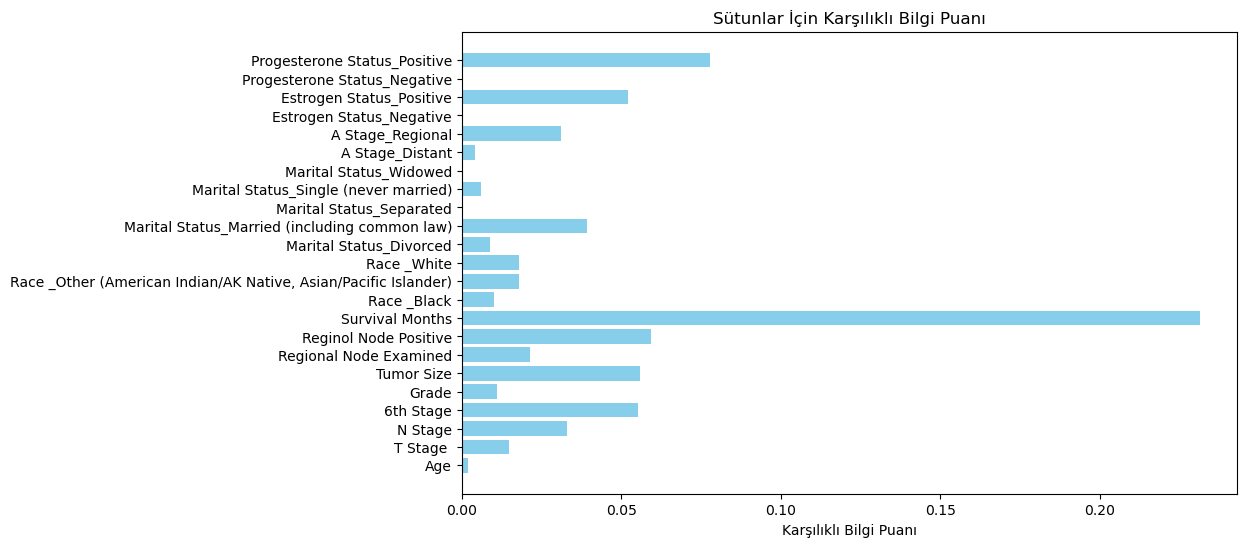

In [59]:
from sklearn.feature_selection import mutual_info_classif

# Yeniden örneklenen verilerdeki karşılıklı bilgileri hesaplama
mi = mutual_info_classif(X_resampled, y_resampled, discrete_features='auto')

# Tüm sütunlar için karşılıklı bilgi puanlarını çizdirme
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi, color='skyblue')
plt.xlabel('Karşılıklı Bilgi Puanı')
plt.title('Sütunlar İçin Karşılıklı Bilgi Puanı')
plt.show()

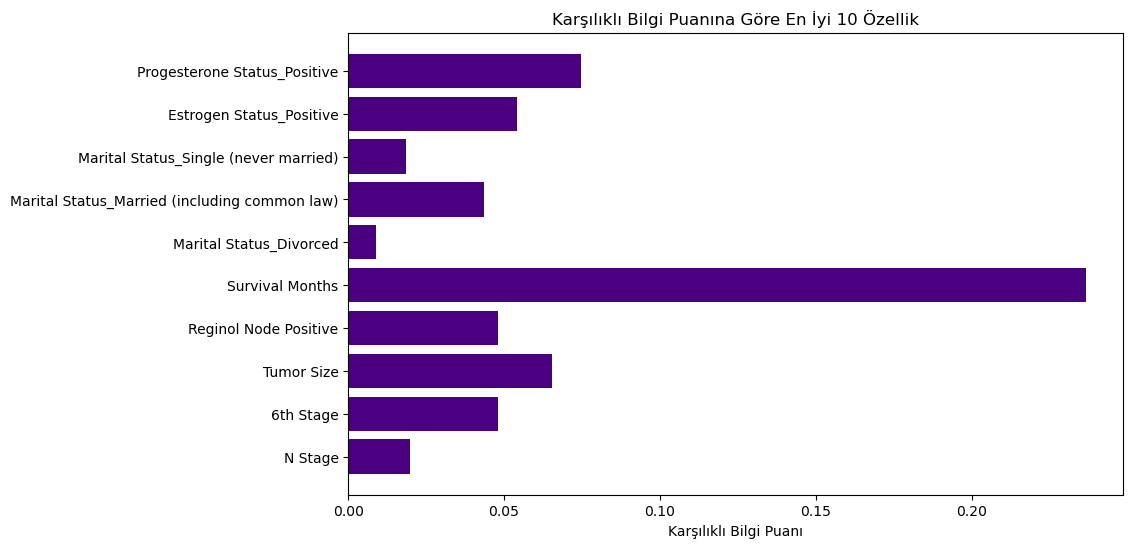

In [60]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Yeniden örneklenen verilerdeki karşılıklı bilgileri hesaplama
mi = mutual_info_classif(X_resampled, y_resampled, discrete_features='auto')

# Karşılıklı bilgilere dayanarak en iyi 10 özelliği seçme
k = 10
selector = SelectKBest(mutual_info_classif, k=k)
X_new = selector.fit_transform(X_resampled, y_resampled)

# Seçili feature adlarını alma
selected_features = X.columns[selector.get_support()]

# En iyi 10 özellik için karşılıklı bilgi puanlarını çizdirme
plt.figure(figsize=(10, 6))
plt.barh(selected_features, mi[selector.get_support()], color='indigo')
plt.xlabel('Karşılıklı Bilgi Puanı')
plt.title(f'Karşılıklı Bilgi Puanına Göre En İyi {k} Özellik')
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ve transform uygulama
X_resampled_scaled = scaler.fit_transform(X_resampled)

X_test_scaled = scaler.transform(X_test)

In [62]:
X_resampled_scaled

array([[-0.26934279,  1.4735892 , -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844],
       [ 0.17532269, -1.12209086,  0.66175553, ...,  0.42824176,
         2.41837977, -1.49211765],
       [ 1.2869864 ,  0.17574917,  2.03391403, ...,  0.42824176,
        -0.41349999,  0.67018844],
       ...,
       [-0.49167553,  0.17574917, -0.71040296, ...,  0.42824176,
        -0.41349999, -1.49211765],
       [-0.93634102,  0.17574917,  2.03391403, ...,  0.42824176,
        -0.41349999,  0.67018844],
       [-0.04701005,  0.17574917, -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844]])

In [63]:
X_test_scaled

array([[-0.82517465,  0.17574917, -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844],
       [-1.49217287,  1.4735892 , -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844],
       [ 0.95348729,  1.4735892 , -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844],
       ...,
       [ 1.17582003,  0.17574917, -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844],
       [-2.38150384,  0.17574917, -0.71040296, ...,  0.42824176,
         2.41837977, -1.49211765],
       [ 1.2869864 , -1.12209086, -0.71040296, ...,  0.42824176,
        -0.41349999,  0.67018844]])

## Hiperparametre Optimizasyonu

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_resampled_scaled, y_resampled)

best_lr = grid_lr.best_estimator_
print("Logistic Regression Best Params:", grid_lr.best_params_)

Logistic Regression Best Params: {'C': 0.1, 'solver': 'lbfgs'}


In [65]:
from sklearn.svm import SVC

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_svc.fit(X_resampled_scaled, y_resampled)

best_svc = grid_svc.best_estimator_
print("SVC Best Params:", grid_svc.best_params_)

SVC Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [66]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_resampled_scaled, y_resampled)

best_dt = grid_dt.best_estimator_
print("Decision Tree Best Params:", grid_dt.best_params_)


Decision Tree Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [67]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_resampled_scaled, y_resampled)

best_rf = grid_rf.best_estimator_
print("Random Forest Best Params:", grid_rf.best_params_)


Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gb.fit(X_resampled_scaled, y_resampled)

best_gb = grid_gb.best_estimator_
print("Gradient Boosting Best Params:", grid_gb.best_params_)


Gradient Boosting Best Params: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}


In [69]:
from sklearn.ensemble import AdaBoostClassifier

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_ab = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ab, cv=5, scoring='roc_auc', n_jobs=-1)
grid_ab.fit(X_resampled_scaled, y_resampled)

best_ab = grid_ab.best_estimator_
print("AdaBoost Best Params:", grid_ab.best_params_)


AdaBoost Best Params: {'learning_rate': 1.0, 'n_estimators': 200}


In [70]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_resampled_scaled, y_resampled)

best_xgb = grid_xgb.best_estimator_
print("XGBoost Best Params:", grid_xgb.best_params_)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


* Yukarıda hiperparametre optimizasyonu yapıp aşağıda daha önceden deneyip en iyi sonucu verenlere sadece uygulamış bulunmaktayım. Çünkü diğer türlü çok etki etmemesine rağmen uzun süre çalışma durumu söz konusu oluyordu. Bundan dolayı hiperparametreler aşağıda sadece "Doğruluk"a etki edenlere uyguladım. 

# Makine Öğrenmesi Modellerini Eğitme ve Değerlendirme

Logistic Regression CV ROC-AUC Scores: [0.78554224 0.971717   0.97100689 0.97969981 0.97685564]
Logistic Regression Mean CV ROC-AUC: 0.9369643153762623
Accuracy: 0.8869565217391304
F1-Score: 0.9335281227173119
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.56      0.62       133
           1       0.92      0.95      0.93       672

    accuracy                           0.89       805
   macro avg       0.81      0.76      0.78       805
weighted avg       0.88      0.89      0.88       805

Sensitivity (Recall): 0.9508928571428571
Specificity: 0.5639097744360902
Cohen's Kappa: 0.5567743848206345
ROC-AUC Score: 0.865814088793412


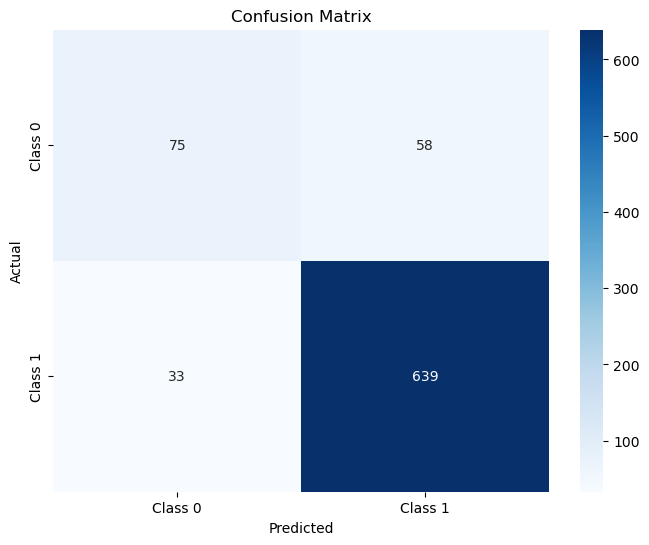

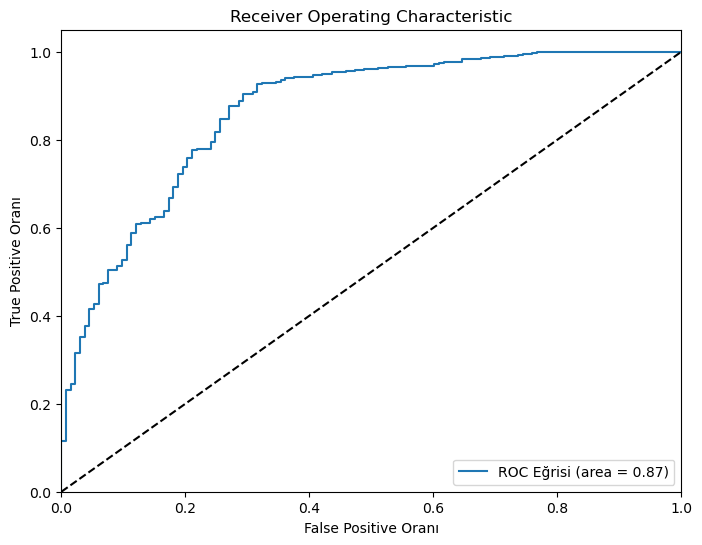

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, f1_score
from sklearn.model_selection import cross_val_score

# Model tanımlama ve eğitme
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(logreg, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("Logistic Regression CV ROC-AUC Scores:", cv_scores)
print("Logistic Regression Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_lr = accuracy_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)
classification_rep_lr = classification_report(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_proba)
kappa_lr = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_lr.ravel()
sensitivity_lr = tp / (tp + fn)  # Recall
specificity_lr = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_lr)
print("F1-Score:", f1_score_lr)
print("Classification Report:\n", classification_rep_lr)
print("Sensitivity (Recall):", sensitivity_lr)
print("Specificity:", specificity_lr)
print("Cohen's Kappa:", kappa_lr)
print("ROC-AUC Score:", roc_auc_lr)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

SVM CV ROC-AUC Scores: [0.85027823 0.97358852 0.97491051 0.97902135 0.98057879]
SVM Mean CV ROC-AUC: 0.9516754809450992
Accuracy: 0.8770186335403727
F1-Score: 0.9293361884368309
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.41      0.53       133
           1       0.89      0.97      0.93       672

    accuracy                           0.88       805
   macro avg       0.81      0.69      0.73       805
weighted avg       0.87      0.88      0.86       805

Sensitivity (Recall): 0.96875
Specificity: 0.41353383458646614
Cohen's Kappa: 0.4616257625195064
ROC-AUC Score: 0.8374507697815969


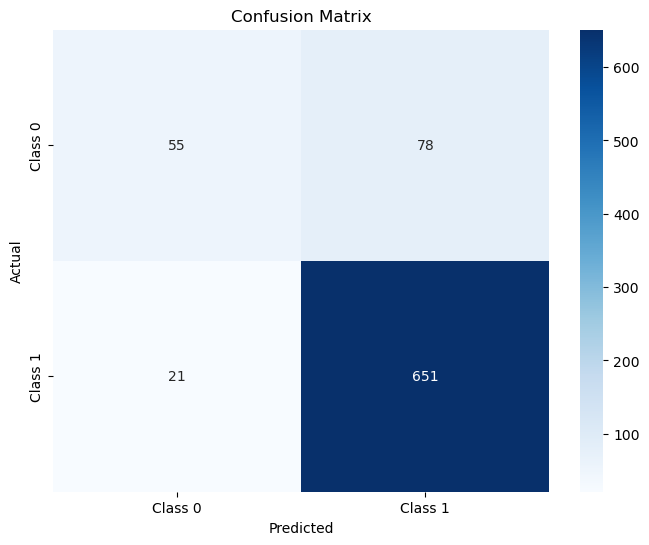

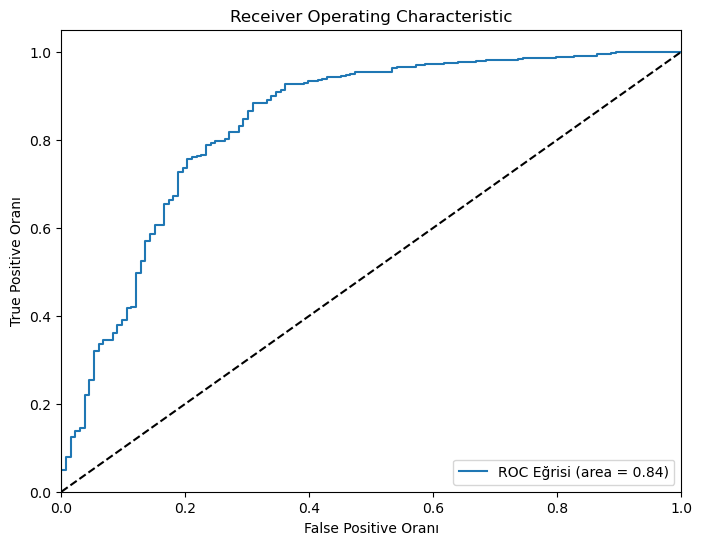

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# SVM modelini tanımlama ve eğitme
svm = SVC(random_state=42, probability=True)
svm.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(svm, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("SVM CV ROC-AUC Scores:", cv_scores)
print("SVM Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_svm = accuracy_score(y_test, y_pred)
f1_score_svm = f1_score(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_proba)
kappa_svm = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_svm.ravel()
sensitivity_svm = tp / (tp + fn)  # Recall
specificity_svm = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_svm)
print("F1-Score:", f1_score_svm)
print("Classification Report:\n", classification_rep_svm)
print("Sensitivity (Recall):", sensitivity_svm)
print("Specificity:", specificity_svm)
print("Cohen's Kappa:", kappa_svm)
print("ROC-AUC Score:", roc_auc_svm)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Decision Tree CV ROC-AUC Scores: [0.811063   0.96573713 0.96185609 0.96854038 0.96069136]
Decision Tree Mean CV ROC-AUC: 0.933577593139556
Accuracy: 0.8285714285714286
F1-Score: 0.8944954128440367
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.62      0.54       133
           1       0.92      0.87      0.89       672

    accuracy                           0.83       805
   macro avg       0.70      0.74      0.72       805
weighted avg       0.85      0.83      0.84       805

Sensitivity (Recall): 0.8705357142857143
Specificity: 0.6165413533834586
Cohen's Kappa: 0.4393810936837643
ROC-AUC Score: 0.7874876924453993


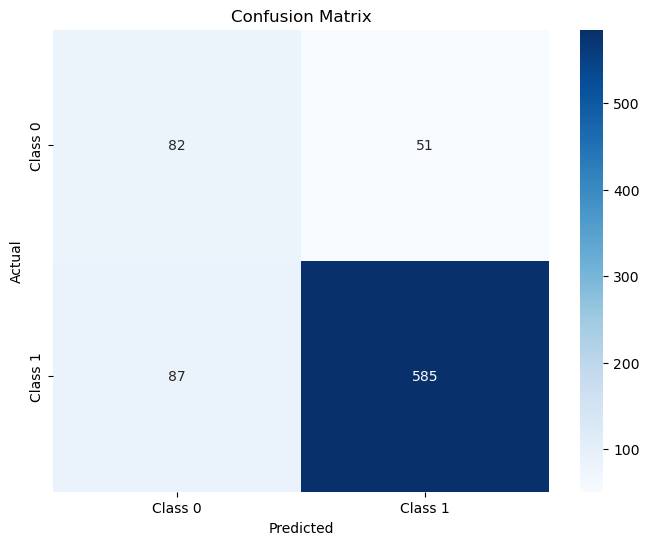

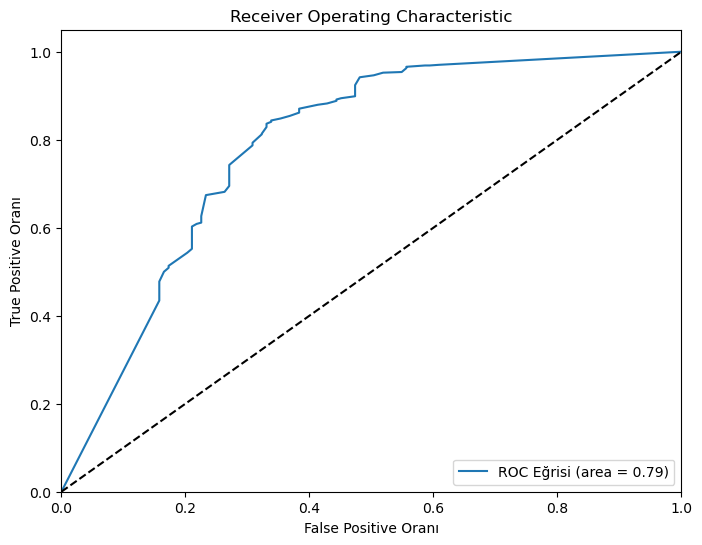

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# Karar ağacı modeli (optimize edilmiş hiperparametreler ile)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)
decision_tree.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(decision_tree, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("Decision Tree CV ROC-AUC Scores:", cv_scores)
print("Decision Tree Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = decision_tree.predict(X_test_scaled)
y_proba = decision_tree.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_dt = accuracy_score(y_test, y_pred)
f1_score_dt = f1_score(y_test, y_pred)
classification_rep_dt = classification_report(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_proba)
kappa_dt = cohen_kappa_score(y_test, y_pred)

# Sensitivity ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_dt.ravel()
sensitivity_dt = tp / (tp + fn)
specificity_dt = tn / (tn + fp)

# Sonuçları yazdırma
print("Accuracy:", accuracy_dt)
print("F1-Score:", f1_score_dt)
print("Classification Report:\n", classification_rep_dt)
print("Sensitivity (Recall):", sensitivity_dt)
print("Specificity:", specificity_dt)
print("Cohen's Kappa:", kappa_dt)
print("ROC-AUC Score:", roc_auc_dt)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest CV ROC-AUC Scores: [0.9353691  0.99146472 0.99350621 0.99450718 0.99510543]
Random Forest Mean CV ROC-AUC: 0.9819905296283269
Accuracy: 0.8906832298136645
F1-Score: 0.9350073855243722
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.66       133
           1       0.93      0.94      0.94       672

    accuracy                           0.89       805
   macro avg       0.81      0.79      0.80       805
weighted avg       0.89      0.89      0.89       805

Sensitivity (Recall): 0.9419642857142857
Specificity: 0.631578947368421
Cohen's Kappa: 0.5913752725510781
ROC-AUC Score: 0.8554701485857501


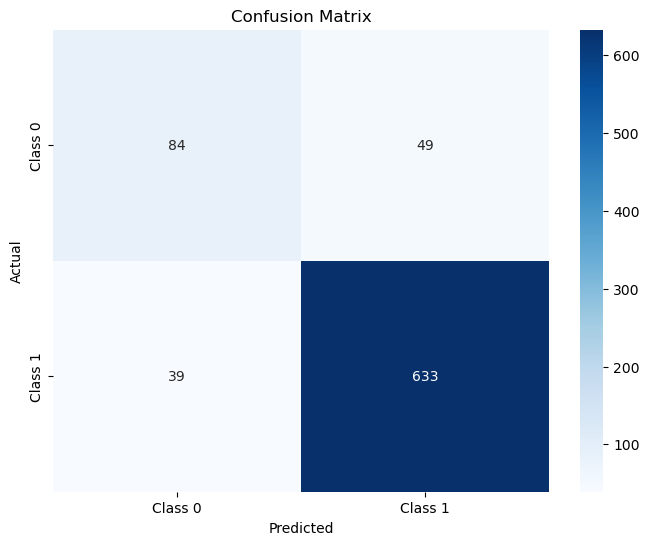

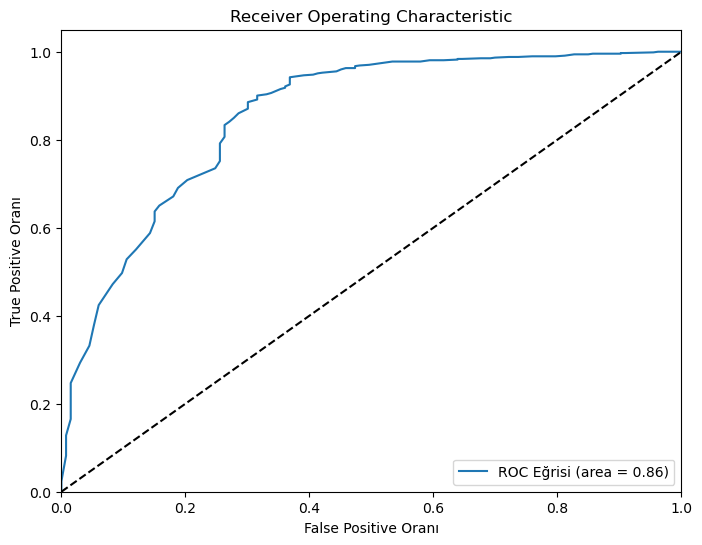

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# Random Forest modelini tanımlama ve eğitme
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(random_forest, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("Random Forest CV ROC-AUC Scores:", cv_scores)
print("Random Forest Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = random_forest.predict(X_test_scaled)
y_proba = random_forest.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_rf = accuracy_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_proba)
kappa_rf = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_rf.ravel()
sensitivity_rf = tp / (tp + fn)  # Recall
specificity_rf = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_rf)
print("F1-Score:", f1_score_rf)
print("Classification Report:\n", classification_rep_rf)
print("Sensitivity (Recall):", sensitivity_rf)
print("Specificity:", specificity_rf)
print("Cohen's Kappa:", kappa_rf)
print("ROC-AUC Score:", roc_auc_rf)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Gradient Boosting CV ROC-AUC Scores: [0.84985288 0.97491293 0.97546364 0.97979172 0.97913666]
Gradient Boosting Mean CV ROC-AUC: 0.9518315646268594
Accuracy: 0.8857142857142857
F1-Score: 0.9322533136966127
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63       133
           1       0.92      0.94      0.93       672

    accuracy                           0.89       805
   macro avg       0.80      0.77      0.78       805
weighted avg       0.88      0.89      0.88       805

Sensitivity (Recall): 0.9419642857142857
Specificity: 0.6015037593984962
Cohen's Kappa: 0.567421702510426
ROC-AUC Score: 0.8746083959899749


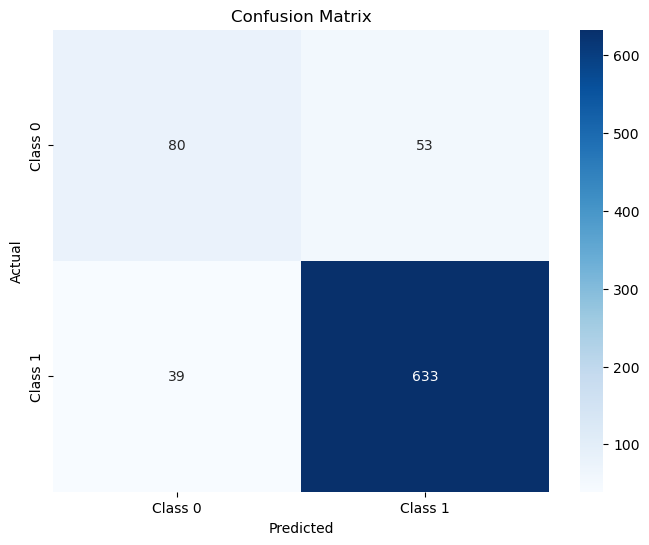

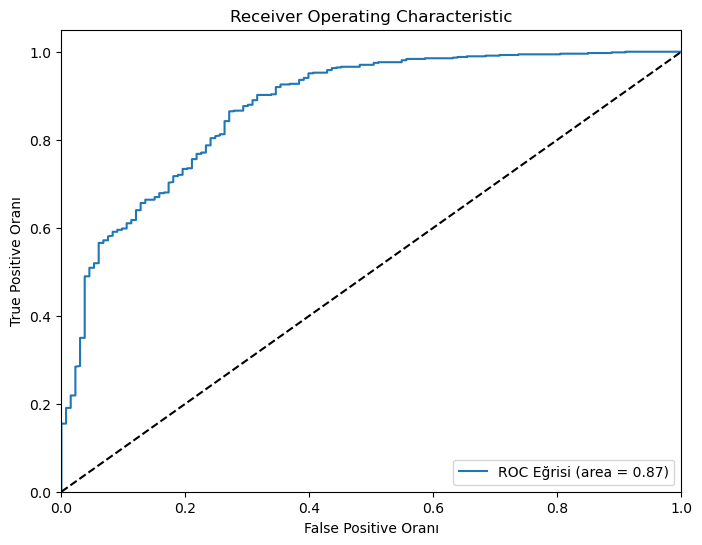

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# Gradient Boosting modelini tanımlama ve eğitme
gbm = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbm.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(gbm, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("Gradient Boosting CV ROC-AUC Scores:", cv_scores)
print("Gradient Boosting Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = gbm.predict(X_test_scaled)
y_proba = gbm.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_gb = accuracy_score(y_test, y_pred)
f1_score_gb = f1_score(y_test, y_pred)
classification_rep_gb = classification_report(y_test, y_pred)
conf_matrix_gb = confusion_matrix(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, y_proba)
kappa_gb = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_gb.ravel()
sensitivity_gb = tp / (tp + fn)  # Recall
specificity_gb = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_gb)
print("F1-Score:", f1_score_gb)
print("Classification Report:\n", classification_rep_gb)
print("Sensitivity (Recall):", sensitivity_gb)
print("Specificity:", specificity_gb)
print("Cohen's Kappa:", kappa_gb)
print("ROC-AUC Score:", roc_auc_gb)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



AdaBoost CV ROC-AUC Scores: [0.79118516 0.97621899 0.97775802 0.97997052 0.98026129]
AdaBoost Mean CV ROC-AUC: 0.9410787977146458
Accuracy: 0.884472049689441
F1-Score: 0.9312638580931264
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       133
           1       0.93      0.94      0.93       672

    accuracy                           0.88       805
   macro avg       0.79      0.78      0.78       805
weighted avg       0.88      0.88      0.88       805

Sensitivity (Recall): 0.9375
Specificity: 0.6165413533834586
Cohen's Kappa: 0.5694964376283058
ROC-AUC Score: 0.8769300483351236


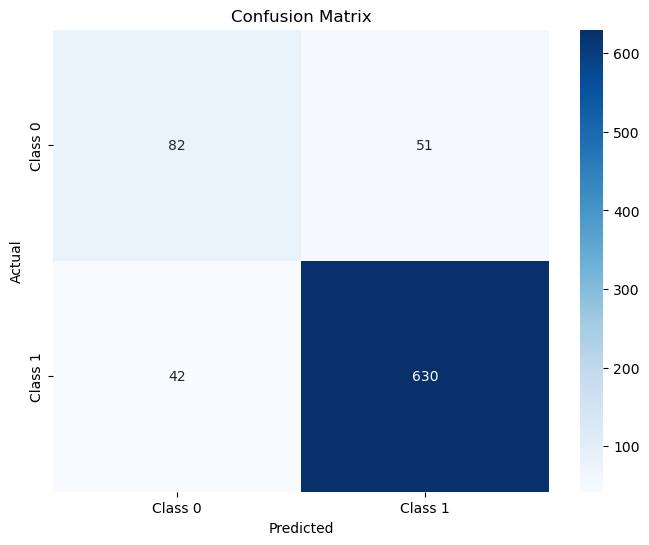

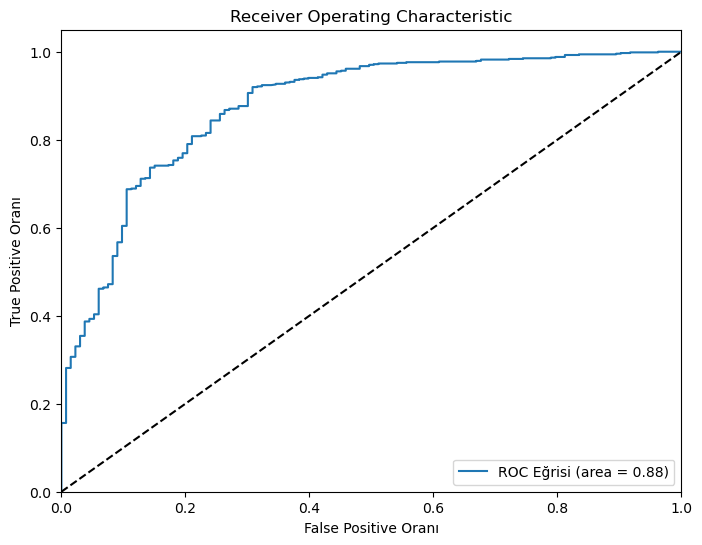

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# AdaBoost modeli (optimize edilmiş hiperparametreler ile)
adaboost = AdaBoostClassifier(random_state=42, n_estimators=200, learning_rate=1.0)
adaboost.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(adaboost, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("AdaBoost CV ROC-AUC Scores:", cv_scores)
print("AdaBoost Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = adaboost.predict(X_test_scaled)
y_proba = adaboost.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_ada = accuracy_score(y_test, y_pred)
f1_score_ada = f1_score(y_test, y_pred)
classification_rep_ada = classification_report(y_test, y_pred)
conf_matrix_ada = confusion_matrix(y_test, y_pred)
roc_auc_ada = roc_auc_score(y_test, y_proba)
kappa_ada = cohen_kappa_score(y_test, y_pred)

# Sensitivity ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_ada.ravel()
sensitivity_ada = tp / (tp + fn)
specificity_ada = tn / (tn + fp)

# Sonuçları yazdırma
print("Accuracy:", accuracy_ada)
print("F1-Score:", f1_score_ada)
print("Classification Report:\n", classification_rep_ada)
print("Sensitivity (Recall):", sensitivity_ada)
print("Specificity:", specificity_ada)
print("Cohen's Kappa:", kappa_ada)
print("ROC-AUC Score:", roc_auc_ada)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


XGBoost CV ROC-AUC Scores: [0.88480131 0.99598006 0.99494668 0.995321   0.99579892]
XGBoost Mean CV ROC-AUC: 0.973369592887407
Accuracy: 0.8881987577639752
F1-Score: 0.9337260677466863
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       133
           1       0.92      0.94      0.93       672

    accuracy                           0.89       805
   macro avg       0.80      0.78      0.79       805
weighted avg       0.88      0.89      0.89       805

Sensitivity (Recall): 0.9434523809523809
Specificity: 0.6090225563909775
Cohen's Kappa: 0.576825578542808
ROC-AUC Score: 0.8578253669889009


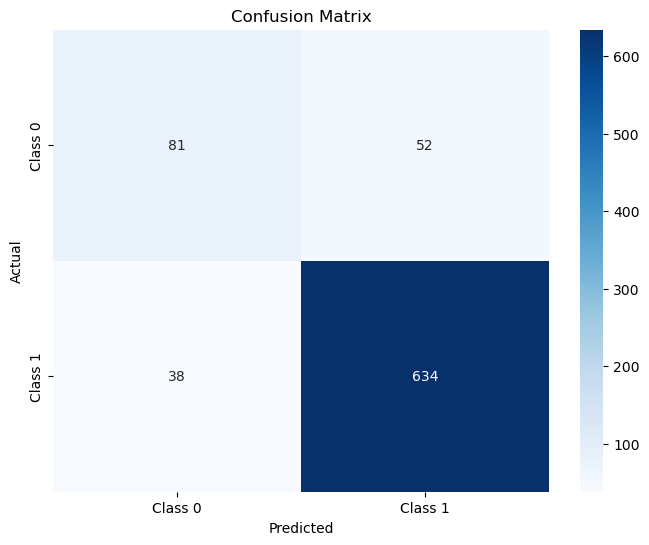

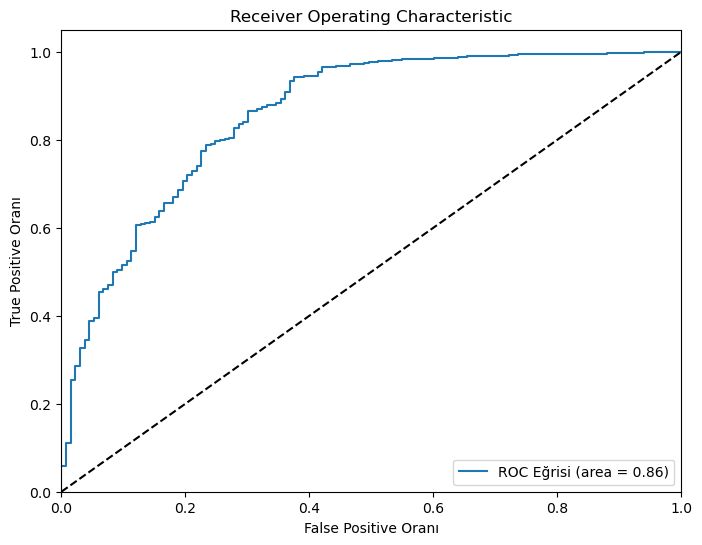

In [77]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

# XGBoost modeli (optimize edilmiş hiperparametreler ile)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', n_estimators=200, learning_rate=0.1, max_depth=10)
xgb_model.fit(X_resampled_scaled, y_resampled)

# Çapraz Doğrulama
cv_scores = cross_val_score(xgb_model, X_resampled_scaled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)
print("XGBoost CV ROC-AUC Scores:", cv_scores)
print("XGBoost Mean CV ROC-AUC:", cv_scores.mean())

# Tahminler
y_pred = xgb_model.predict(X_test_scaled)
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrikler
accuracy_xgb = accuracy_score(y_test, y_pred)
f1_score_xgb = f1_score(y_test, y_pred)
classification_rep_xgb = classification_report(y_test, y_pred)
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_proba)
kappa_xgb = cohen_kappa_score(y_test, y_pred)

# Sensitivity ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_xgb.ravel()
sensitivity_xgb = tp / (tp + fn)
specificity_xgb = tn / (tn + fp)

# Sonuçları yazdırma
print("Accuracy:", accuracy_xgb)
print("F1-Score:", f1_score_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Sensitivity (Recall):", sensitivity_xgb)
print("Specificity:", specificity_xgb)
print("Cohen's Kappa:", kappa_xgb)
print("ROC-AUC Score:", roc_auc_xgb)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Eğrisi Görselleştirme
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Derin Öğrenme Modellerini Eğitme ve Değerlendirme

## Yapay Sinir Ağı (Artificial Neural Network - ANN)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6853 - loss: 0.6201 - val_accuracy: 0.8540 - val_loss: 0.4832
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8815 - loss: 0.3296 - val_accuracy: 0.8696 - val_loss: 0.3799
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.3104 - val_accuracy: 0.8696 - val_loss: 0.3549
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.3122 - val_accuracy: 0.8680 - val_loss: 0.3548
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8902 - loss: 0.3159 - val_accuracy: 0.8711 - val_loss: 0.3496
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8892 - loss: 0.2977 - val_accuracy: 0.8789 - val_loss: 0.3319
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.2847 - val_accuracy: 0.8820 - val_loss: 0.3230
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8990 - loss: 0.2907 - val_accuracy: 0.8804 - val_loss:

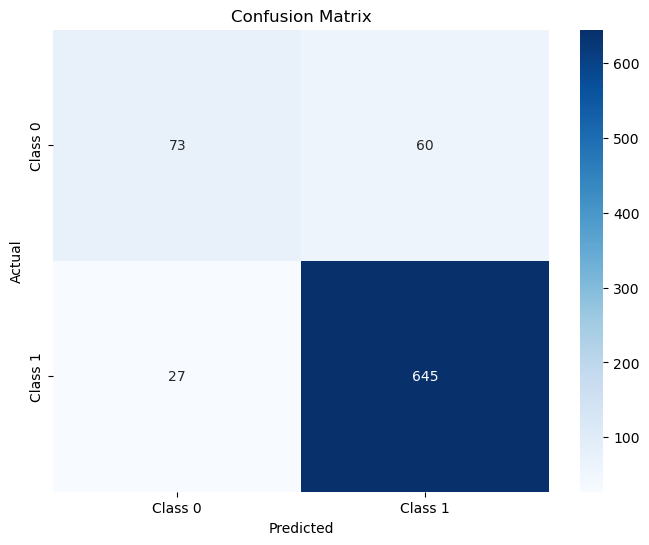

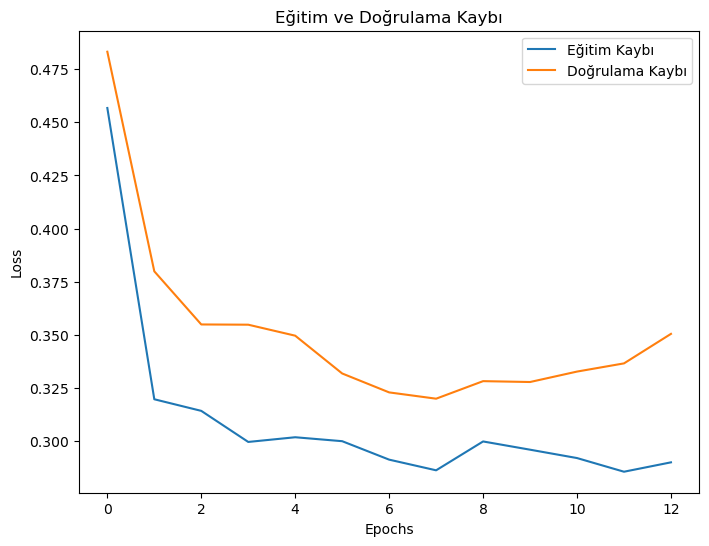

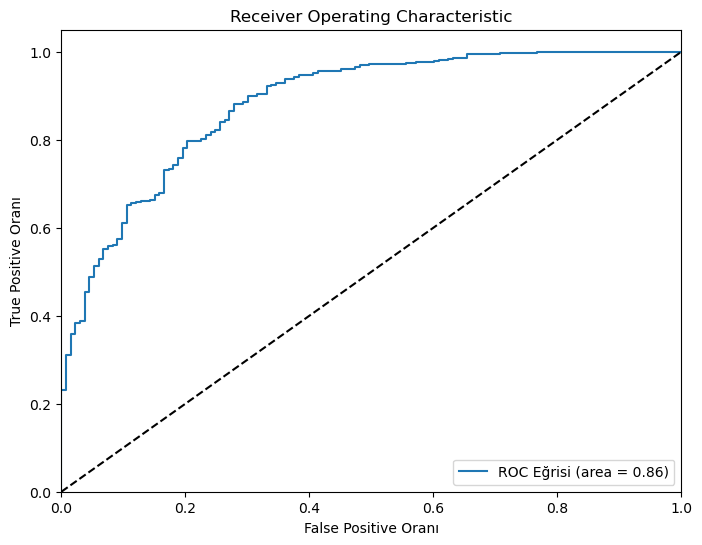

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Model Tanımlama
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification için
])

# 2. Model Derleme
ann_model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 3. Early Stopping ile Eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = ann_model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# 4. Tahmin ve Değerlendirme
y_pred_proba = ann_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Metrikler
accuracy_ann = accuracy_score(y_test, y_pred)
f1_score_ann = f1_score(y_test, y_pred)
classification_rep_ann = classification_report(y_test, y_pred)
conf_matrix_ann = confusion_matrix(y_test, y_pred)
roc_auc_ann = roc_auc_score(y_test, y_proba)
kappa_ann = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_ann.ravel()
sensitivity_ann = tp / (tp + fn)  # Recall
specificity_ann = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_ann)
print("F1-Score:", f1_score_ann)
print("Classification Report:\n", classification_rep_ann)
print("Sensitivity (Recall):", sensitivity_ann)
print("Specificity:", specificity_ann)
print("Cohen's Kappa:", kappa_ann)
print("ROC-AUC Score:", roc_auc_ann)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Eğitim/Doğrulama Kaybı Grafiği
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ROC Eğrisi Görselleştirme
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Convolutional Neural Network (CNN) 

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6226 - loss: 0.7337 - val_accuracy: 0.8463 - val_loss: 0.3816
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.4288 - val_accuracy: 0.8711 - val_loss: 0.3421
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3687 - val_accuracy: 0.8773 - val_loss: 0.3886
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.3818 - val_accuracy: 0.8773 - val_loss: 0.3404
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3325 - val_accuracy: 0.8711 - val_loss: 0.3422
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3383 - val_accuracy: 0.8773 - val_loss: 0.3442
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3365 - val_accuracy: 0.8416 - val_loss: 0.4446
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3228 - val_accuracy: 0.8758 - val_loss:

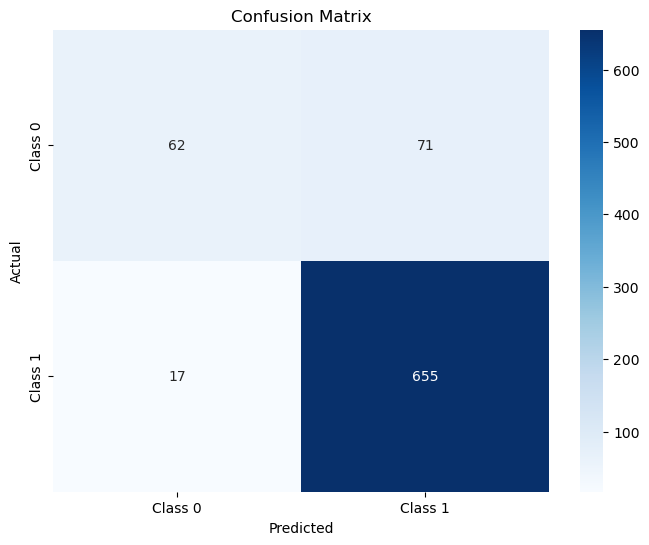

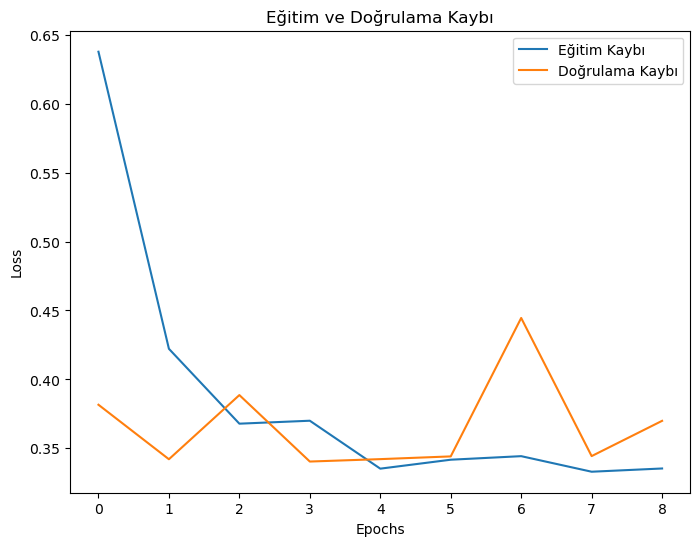

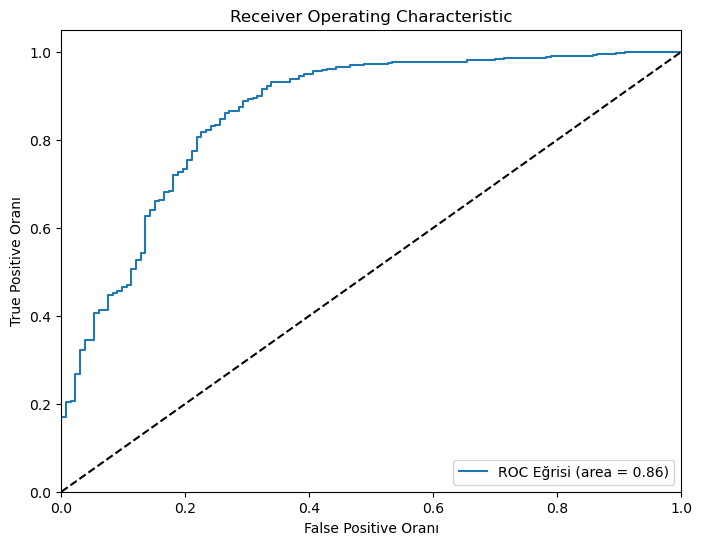

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Verinin CNN için uygun hale getirilmesi
# X_train ve X_test'e 3. bir boyut ekliyoruz (kanal boyutu)
X_train_cnn = X_train.to_numpy()[..., None]
X_test_cnn = X_test.to_numpy()[..., None]

# 1. CNN Modeli Tanımlama
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification için
])

# 2. Model Derleme
cnn_model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 3. Early Stopping ile Eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = cnn_model.fit(X_train_cnn, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# 4. Tahmin ve Değerlendirme
y_pred_proba = cnn_model.predict(X_test_cnn)
y_pred = (y_pred_proba > 0.5).astype(int)

# Metrikler
accuracy_cnn = accuracy_score(y_test, y_pred)
f1_score_cnn = f1_score(y_test, y_pred)
classification_rep_cnn = classification_report(y_test, y_pred)
conf_matrix_cnn = confusion_matrix(y_test, y_pred)
roc_auc_cnn = roc_auc_score(y_test, y_proba)
kappa_cnn = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_cnn.ravel()
sensitivity_cnn = tp / (tp + fn)  # Recall
specificity_cnn = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_cnn)
print("F1-Score:", f1_score_cnn)
print("Classification Report:\n", classification_rep_cnn)
print("Sensitivity (Recall):", sensitivity_cnn)
print("Specificity:", specificity_cnn)
print("Cohen's Kappa:", kappa_cnn)
print("ROC-AUC Score:", roc_auc_cnn)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Eğitim/Doğrulama Kaybı Grafiği
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ROC Eğrisi Görselleştirme
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Transfer Öğrenme

**Transfer öğrenme kısmında kullandığımız modelin adı doğrudan bir pre-trained model değil, tamamen Dense katmanları ile oluşturulmuş bir temel modeldir. Görsel veri olmadığı için transfer öğrenme kavramını, mevcut tabular verilerle anlamlandırmak için aşağıdaki gibi bir yaklaşım kullandık:**

### Dense Katmanları:
* İlk katman: 128 nöron ile genel özellikleri öğrenmek için.
* Orta katman: 64 nöron ile özellikleri derinlemesine öğrenmek için.
* Son Katmanlar: 32 nöron ve sigmoid aktivasyonlu çıkış katmanı (ikili sınıflandırma için).
**Bu modeli, basitleştirilmiş bir Dense tabanlı transfer öğrenme modeli olarak adlandırabiliriz.**

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7020 - loss: 0.5816 - val_accuracy: 0.8634 - val_loss: 0.4882
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.3276 - val_accuracy: 0.8758 - val_loss: 0.3517
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.3219 - val_accuracy: 0.8727 - val_loss: 0.3409
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.3090 - val_accuracy: 0.8727 - val_loss: 0.3274
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.3040 - val_accuracy: 0.8835 - val_loss: 0.3370
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2979 - val_accuracy: 0.8711 - val_loss: 0.3386
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8817 - loss: 0.3144 - val_accuracy: 0.8789 - val_loss: 0.3293
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8949 - loss: 0.2918 - val_accuracy: 0.8851 - val_loss:

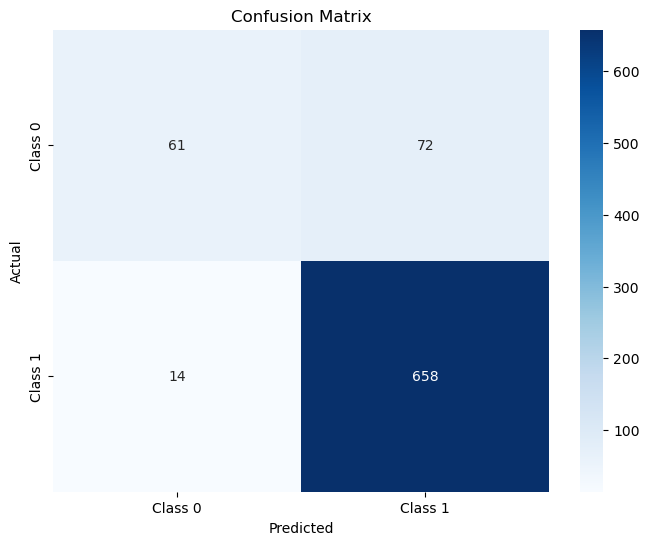

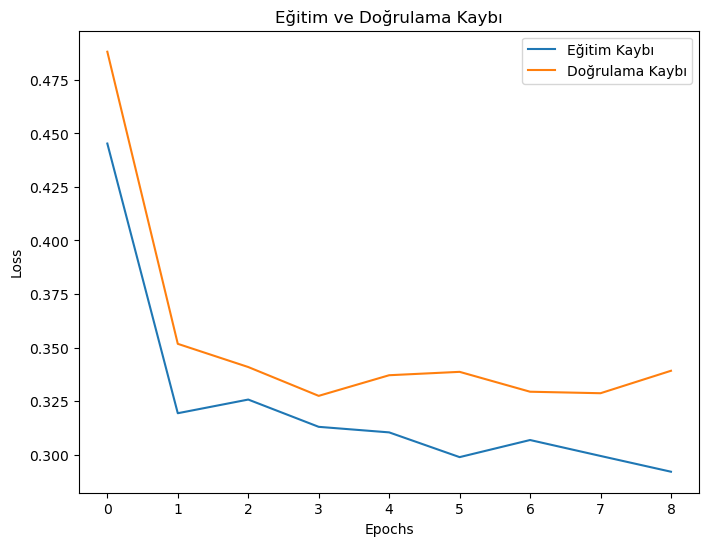

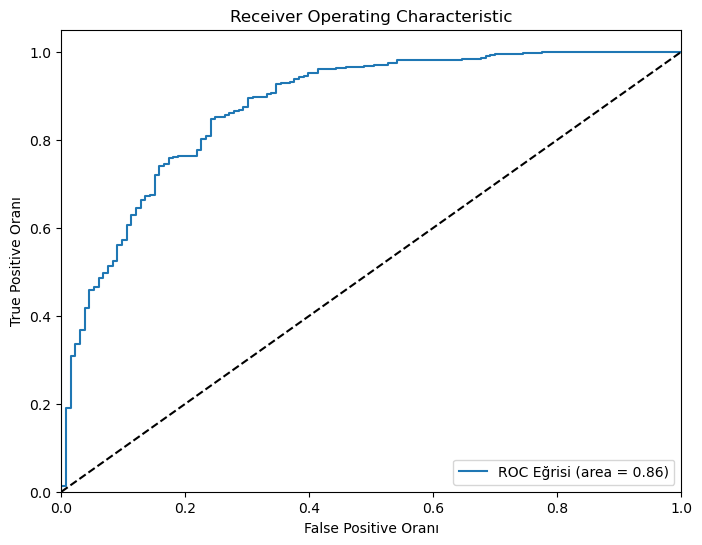

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Transfer Learning için uygun bir pre-trained taban modeli seçimi
# Görsel veri olmadığı için taban model olarak genel özellik öğrenimi yapan bir model kullandık.

def create_transfer_learning_model(input_shape):
    # Basit bir Dense tabanlı yapı oluşturuyoruz
    # İlk katman: 128 nöronlu Dense katmanı, genel özellikleri öğrenmek ve daha yüksek boyutlu veriyi anlamlandırmak için seçildi.
    # BatchNormalization: Eğitim sırasında modelin kararlılığını artırır.
    # Dropout: Aşırı öğrenmeyi (overfitting) önlemek için 0.3 oranında uygulanıyor.
    base_model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),  # Özellikleri genelleştirmek için kullanılır.
        BatchNormalization(),  # Modelin her epoch'ta daha dengeli bir şekilde öğrenmesini sağlar.
        Dropout(0.3),  # Aşırı öğrenmeyi önlemek için.
        Dense(64, activation='relu'),  # Orta seviyeli özellikleri öğrenmek için kullanılır.
        BatchNormalization(),
        Dropout(0.3)
    ])

    # Yeni katmanları ekliyoruz
    # 32 nöronlu katman: Daha düşük boyutlu bir özellik kümesi oluşturur ve sınıflandırmayı iyileştirir.
    # Son katman: Sigmoid aktivasyonuyla ikili sınıflandırma sağlar.
    base_model.add(Dense(32, activation='relu'))
    base_model.add(Dense(1, activation='sigmoid'))  # Binary classification için

    # Modeli derleme
    base_model.compile(optimizer=Adam(learning_rate=0.001), 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

    return base_model

# Modeli oluşturma
input_shape = X_train.shape[1]  # Özellik sayısını alıyoruz
transfer_learning_model = create_transfer_learning_model(input_shape)

# Early Stopping ile Eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = transfer_learning_model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping], 
                    verbose=1)

# Tahmin ve Değerlendirme
y_pred_proba = transfer_learning_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Metrikler
accuracy_transfer = accuracy_score(y_test, y_pred)
f1_score_transfer = f1_score(y_test, y_pred)
classification_rep_transfer = classification_report(y_test, y_pred)
conf_matrix_transfer = confusion_matrix(y_test, y_pred)
roc_auc_transfer = roc_auc_score(y_test, y_proba)
kappa_transfer = cohen_kappa_score(y_test, y_pred)

# Sensitivity (Recall) ve Specificity Hesaplama
tn, fp, fn, tp = conf_matrix_transfer.ravel()
sensitivity_transfer = tp / (tp + fn)  # Recall
specificity_transfer = tn / (tn + fp)

# Sonuçları yazdırma (Confusion Matrix sayısal çıktısı hariç)
print("Accuracy:", accuracy_transfer)
print("F1-Score:", f1_score_transfer)
print("Classification Report:\n", classification_rep_transfer)
print("Sensitivity (Recall):", sensitivity_transfer)
print("Specificity:", specificity_transfer)
print("Cohen's Kappa:", kappa_transfer)
print("ROC-AUC Score:", roc_auc_transfer)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_transfer, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Eğitim/Doğrulama Kaybı Grafiği
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ROC Eğrisi Görselleştirme
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Eğrisi (area = %0.2f)' % roc_auc_transfer)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Karşılaştırma

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Farklı modellerin performans metriklerini otomatik olarak toplama fonksiyonu
def collect_model_metrics(models_metrics):
    # models_metrics, her bir modelin performansını içeren bir dictionary listesi olmalıdır bu yüzden aşağıda oluşturuyoruz.
    comparison_df = pd.DataFrame(models_metrics)
    return comparison_df

# Model performans metrikleri
ann_metrics = {
    "Model": "ANN",
    "Accuracy": accuracy_ann,
    "F1-Score": f1_score_ann,
    "ROC-AUC": roc_auc_ann,
    "Kappa": kappa_ann,
    "Sensitivity": sensitivity_ann,
    "Specificity": specificity_ann
}

cnn_metrics = {
    "Model": "CNN",
    "Accuracy": accuracy_cnn,
    "F1-Score": f1_score_cnn,
    "ROC-AUC": roc_auc_cnn,
    "Kappa": kappa_cnn,
    "Sensitivity": sensitivity_cnn,
    "Specificity": specificity_cnn
}

transfer_learning_metrics = {
    "Model": "Transfer Learning",
    "Accuracy": accuracy_transfer,
    "F1-Score": f1_score_transfer,
    "ROC-AUC": roc_auc_transfer,
    "Kappa": kappa_transfer,
    "Sensitivity": sensitivity_transfer,
    "Specificity": specificity_transfer
}

logistic_regression_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_lr,
    "F1-Score": f1_score_lr,
    "ROC-AUC": roc_auc_lr,
    "Kappa": kappa_lr,
    "Sensitivity": sensitivity_lr,
    "Specificity": specificity_lr
}

random_forest_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_rf,
    "F1-Score": f1_score_rf,
    "ROC-AUC": roc_auc_rf,
    "Kappa": kappa_rf,
    "Sensitivity": sensitivity_rf,
    "Specificity": specificity_rf
}

svm_metrics = {
    "Model": "SVM",
    "Accuracy": accuracy_svm,
    "F1-Score": f1_score_svm,
    "ROC-AUC": roc_auc_svm,
    "Kappa": kappa_svm,
    "Sensitivity": sensitivity_svm,
    "Specificity": specificity_svm
}

decision_tree_metrics = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_dt,
    "F1-Score": f1_score_dt,
    "ROC-AUC": roc_auc_dt,
    "Kappa": kappa_dt,
    "Sensitivity": sensitivity_dt,
    "Specificity": specificity_dt
}

gb_metrics = {
    "Model": "Gradient Boosting",
    "Accuracy": accuracy_gb,
    "F1-Score": f1_score_gb,
    "ROC-AUC": roc_auc_gb,
    "Kappa": kappa_gb,
    "Sensitivity": sensitivity_gb,
    "Specificity": specificity_gb
}

adaboost_metrics = {
    "Model": "AdaBoost",
    "Accuracy": accuracy_ada,
    "F1-Score": f1_score_ada,
    "ROC-AUC": roc_auc_ada,
    "Kappa": kappa_ada,
    "Sensitivity": sensitivity_ada,
    "Specificity": specificity_ada
}

xgboost_metrics = {
    "Model": "XGBoost",
    "Accuracy": accuracy_xgb,
    "F1-Score": f1_score_xgb,
    "ROC-AUC": roc_auc_xgb,
    "Kappa": kappa_xgb,
    "Sensitivity": sensitivity_xgb,
    "Specificity": specificity_xgb
}

# Tüm metrikleri birleştirme
total_metrics = [
    ann_metrics, cnn_metrics, transfer_learning_metrics,
    logistic_regression_metrics, random_forest_metrics, svm_metrics,
    decision_tree_metrics, gb_metrics, adaboost_metrics, xgboost_metrics
]

# Model Karşılaştırma Tablosu
comparison_df = collect_model_metrics(total_metrics)
comparison_df

Model  Accuracy  F1-Score   ROC-AUC     Kappa  Sensitivity  \
0                  ANN  0.891925  0.936819  0.857825  0.564905     0.959821   
1                  CNN  0.890683  0.937053  0.857825  0.526616     0.974702   
2    Transfer Learning  0.893168  0.938659  0.857825  0.530612     0.979167   
3  Logistic Regression  0.886957  0.933528  0.865814  0.556774     0.950893   
4        Random Forest  0.890683  0.935007  0.855470  0.591375     0.941964   
5                  SVM  0.877019  0.929336  0.837451  0.461626     0.968750   
6        Decision Tree  0.828571  0.894495  0.787488  0.439381     0.870536   
7    Gradient Boosting  0.885714  0.932253  0.874608  0.567422     0.941964   
8             AdaBoost  0.884472  0.931264  0.876930  0.569496     0.937500   
9              XGBoost  0.888199  0.933726  0.857825  0.576826     0.943452   

   Specificity  
0     0.548872  
1     0.466165  
2     0.458647  
3     0.563910  
4     0.631579  
5     0.413534  
6     0.616541  
7     0.601504  
8     0.616541  
9     0.609023

In [82]:
def select_best_model(metrics_df, metrics=['Accuracy', 'F1-Score']):    
    # Seçilen metriklerin ortalamasını hesaplayarak bir skor oluşturma
    metrics_df['Combined_Score'] = metrics_df[metrics].mean(axis=1)
    
    # En yüksek Combined_Score değerine sahip modeli seçme
    best_model_row = metrics_df.loc[metrics_df['Combined_Score'].idxmax()]
    return best_model_row

# En iyi modeli seçiyoruz (Accuracy ve F1-Score birlikte)
best_model = select_best_model(comparison_df, metrics=['Accuracy', 'F1-Score'])
best_model


Model             Transfer Learning
Accuracy                   0.893168
F1-Score                   0.938659
ROC-AUC                    0.857825
Kappa                      0.530612
Sensitivity                0.979167
Specificity                0.458647
Combined_Score             0.915913
Name: 2, dtype: object

**Yukarıda yaptığımız yapay zeka modellerinin sonucuna göre en iyi modelimiz "Transfer Learning" çıkmıştır. En iyi modeli seçmek için kullandığımız metrikler "Doğruluk" ve "F1-Score"dur. VE Doğruluk Oranı %89 Bulunmuştur. Hibrit Modeller denenerek bu doğruluk oranı yükseltilebilir.**

# **DONE**